# Brazilian E-Commerce Analysis

This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.

**Context**

This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. See more on our website: www.olist.com

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

**Attention**

1. An order might have multiple items.
2. Each item might be fulfilled by a distinct seller.
3. All text identifying stores and partners where replaced by the names of Game of Thrones great houses.

**Example**

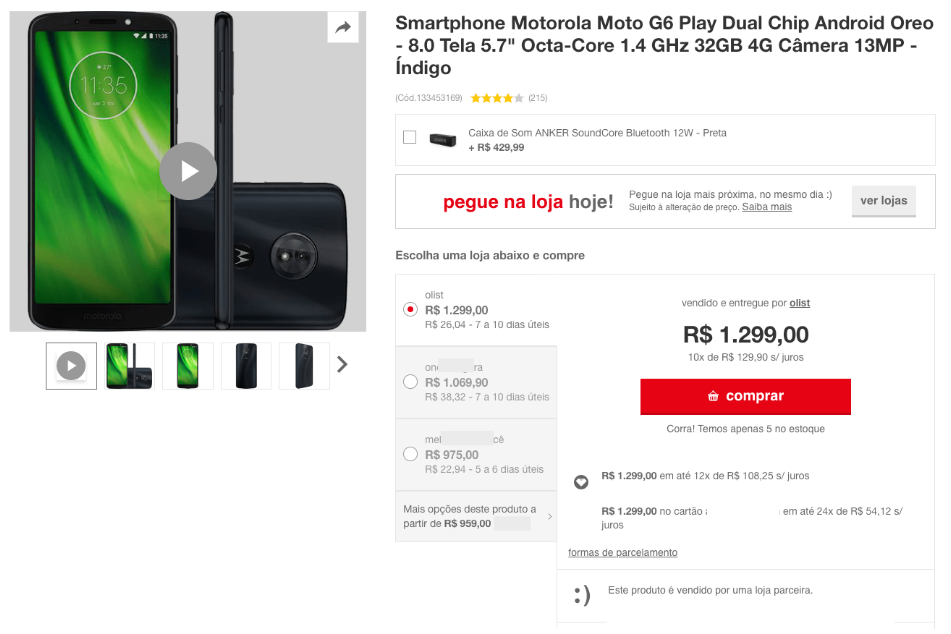

**Schema Dataset**

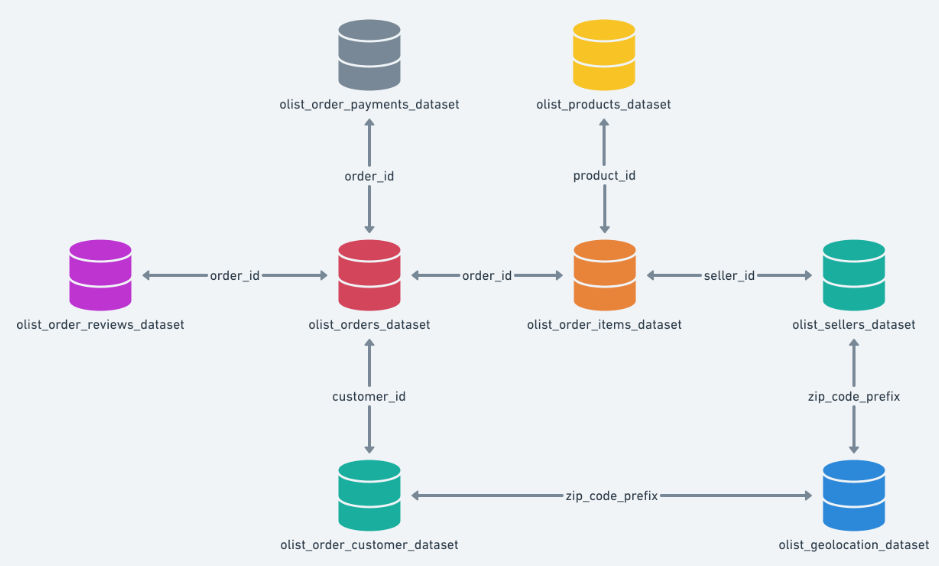

## 1. Data Understanding

At this stage, we aim to gain insights from the dataset through a comprehensive analysis.  
EDA is conducted using two main approaches:


**Import Library**

In [1]:
import pandas as pd

In [2]:
orders = pd.read_csv("data/olist_orders_dataset.csv")
order_items = pd.read_csv("data/olist_order_items_dataset.csv")
products = pd.read_csv("data/olist_products_dataset.csv")
sellers = pd.read_csv("data/olist_sellers_dataset.csv")
customers = pd.read_csv("data/olist_customers_dataset.csv")
payments = pd.read_csv("data/olist_order_payments_dataset.csv")
reviews = pd.read_csv("data/olist_order_reviews_dataset.csv")
geolocation = pd.read_csv("data/olist_geolocation_dataset.csv")

### **1.1 Olist Orders Dataset**

This table contains **high-level information about customer orders**.  
Each row represents a single order, including its status, timestamps (purchase, approval, delivery), and estimated delivery date.

| Column | Description |
|--------|-------------|
| `order_id` | Unique ID for each order. |
| `customer_id` | ID of the customer who placed the order. |
| `order_status` | Status of the order (delivered, shipped, canceled, etc.). |
| `order_purchase_timestamp` | Timestamp when the order was placed. |
| `order_approved_at` | Timestamp when the order was approved. |
| `order_delivered_carrier_date` | Date when the order was handed over to the carrier. |
| `order_delivered_customer_date` | Date when the order was delivered to the customer. |
| `order_estimated_delivery_date` | Estimated delivery date for the order. |



In [3]:
orders.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [4]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


**Missing Values:**  
This table has missing values in `order_approved_at` (160), `order_delivered_carrier_date` (1,783), and `order_delivered_customer_date` (2,965).

### **1.2 Order Item**

This table contains **detailed product-level information for each order**.  
Each row corresponds to one product purchased in an order, including product ID, seller ID, price, and freight value.

| Column | Description |
|--------|-------------|
| `order_id` | Order ID associated with the item. |
| `order_item_id` | Sequential number of the item in the order. |
| `product_id` | Unique product ID. |
| `seller_id` | Unique seller ID. |
| `shipping_limit_date` | Deadline for the seller to ship the item. |
| `price` | Price of the product. |
| `freight_value` | Freight cost for the product. |

In [5]:
order_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [6]:

order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [7]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


**Missing Values:**  
No missing values in this table.

### **1.3 Product**

This table contains **information and specifications of each product** sold on the platform, such as weight, dimensions, and category.

| Column | Description |
|--------|-------------|
| `product_id` | Unique product ID. |
| `product_category_name` | Category name of the product. |
| `product_name_lenght` | Number of characters in the product name. |
| `product_description_lenght` | Number of characters in the product description. |
| `product_photos_qty` | Number of photos of the product. |
| `product_weight_g` | Product weight (grams). |
| `product_length_cm` | Product length (cm). |
| `product_height_cm` | Product height (cm). |
| `product_width_cm` | Product width (cm). |

In [8]:
products.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [9]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [10]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

**Missing Values:**  
`product_category_name`, `product_name_lenght`, `product_description_lenght`, and `product_photos_qty` each have 610 missing values.  
`product_weight_g`, `product_length_cm`, `product_height_cm`, and `product_width_cm` each have 2 missing values.


### **1.4 Sellers**


This table contains **information about sellers** on the platform, including their location details.

| Column | Description |
|--------|-------------|
| `seller_id` | Unique seller ID. |
| `seller_zip_code_prefix` | ZIP code prefix of the seller. |
| `seller_city` | City of the seller. |
| `seller_state` | State of the seller. |

In [11]:
sellers.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [12]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [13]:
sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

**Missing Values:**  
No missing values in this table.

### **1.5 Customers**

This table contains **customer demographic and location information**.  
Each customer may appear multiple times if they placed multiple orders.

| Column | Description |
|--------|-------------|
| `customer_id` | Unique customer ID (per transaction). |
| `customer_unique_id` | Unique customer ID (per individual). |
| `customer_zip_code_prefix` | ZIP code prefix of the customer. |
| `customer_city` | City of the customer. |
| `customer_state` | State of the customer. |

In [14]:
customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [15]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


**Missing Values:**  
No missing values in this table.

### **1.6 Payments**

This table contains **payment transaction details** for each order.

| Column | Description |
|--------|-------------|
| `order_id` | Order ID associated with the payment. |
| `payment_sequential` | Payment sequence number for the order. |
| `payment_type` | Payment method (credit card, boleto, etc.). |
| `payment_installments` | Number of payment installments. |
| `payment_value` | Total payment amount. |

In [16]:
payments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [17]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


**Missing Values:**  
No missing values in this table.

### **1.7 Reviews**

This table contains **customer feedback and reviews** for orders.  
It includes review scores, messages, and timestamps.

| Column | Description |
|--------|-------------|
| `review_id` | Unique review ID. |
| `order_id` | Order ID associated with the review. |
| `review_score` | Score of the review (1–5). |
| `review_comment_title` | Title of the review comment. |
| `review_comment_message` | Content of the review comment. |
| `review_creation_date` | Date the review was created. |
| `review_answer_timestamp` | Date the review was answered. |

In [18]:
reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN           2018-01-18   
1                                                NaN           2018-03-10   
2                                                NaN           2018-02-17   
3     I received it well before the stipulated time.           2017-04-21   
4  Congratulations Lannister stores I loved shopp...           2018-03-01   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [19]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11711 non-null   object
 4   review_comment_message   41725 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [20]:
reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88289
review_comment_message     58275
review_creation_date           0
review_answer_timestamp        0
dtype: int64

**Missing Values:**  
`review_comment_title` has 87,656 missing values and `review_comment_message` has 58,247 missing values.


### **1.8 Geolocation**

This table contains **geographical data for each ZIP code prefix**, including latitude and longitude.

| Column | Description |
|--------|-------------|
| `geolocation_zip_code_prefix` | ZIP code prefix of the location. |
| `geolocation_lat` | Latitude coordinate. |
| `geolocation_lng` | Longitude coordinate. |
| `geolocation_city` | City name. |
| `geolocation_state` | State name. |

In [21]:
geolocation.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [22]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


**Missing Values:**  
No missing values in this table.

## **2. Exploratory Data Analysis**

At this stage, we aim to gain insights from the dataset through a comprehensive analysis.  
EDA is conducted using two main approaches:

### **2.1 EDA per Table (Dataset-Level EDA)**
- Analyze each table individually to understand the structure, data types, value distribution, and relationships between columns.  
- Perform checks for **missing values**, **duplicate records**, **outliers**, and overall data consistency for each table:  
  - Orders  
  - Customers  
  - Sellers  
  - Products  
  - Payments  
  - Reviews  
  - Geolocation  
- Provide an overview of the dataset’s quality and completeness before deeper analysis.

#### 2.1.1 Orders Table

**Conclusion** : 
- No duplicate values were found in the dataset.  
- The majority of orders (around **90%**) have a status of **Delivered**.  

In [23]:
orders.duplicated(subset='order_id').sum()

0

In [24]:
order_count = orders['order_status'].value_counts()
order_count

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

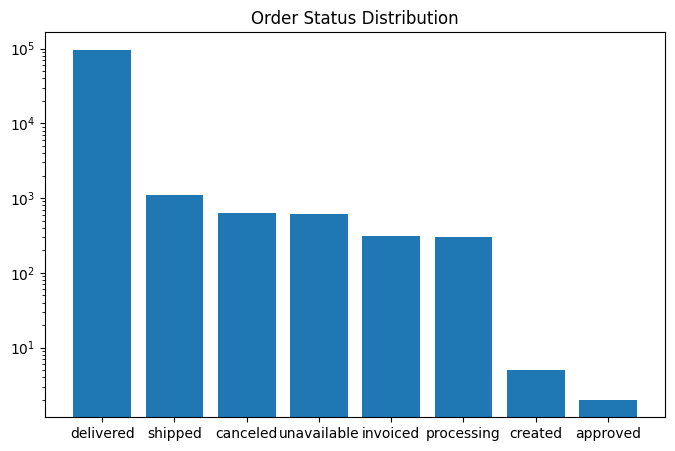

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(order_count.index, order_count.values)
plt.title("Order Status Distribution")
plt.yscale('log')
plt.show()

*Insight :*
- Insight: The majority of `order status` are in **Delivered** status, accounting for over 90% of all orders.

#### 2.1.2 Orders Item Table

**Conclusion** : 
- No duplicate values or significant anomalies were found in the dataset.  
- Most numerical columns contain outliers exceeding the upper bound or third quartile (Q3).  

In [26]:
order_items.describe()

order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134.900000      21.150000
max        21.000000    6735.000000     409.680000

In [27]:
order_items['order_item_id'].value_counts()

order_item_id
1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: count, dtype: int64

**Outlier at Numeric Column**

In [28]:
import seaborn as sns

def plot_outliers(data, column):

    col_data = data[column].dropna()

    plt.figure(figsize=(8, 5))
    sns.boxplot(x=col_data, color="skyblue")

    plt.title(f"Outlier Detection for '{column}'", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

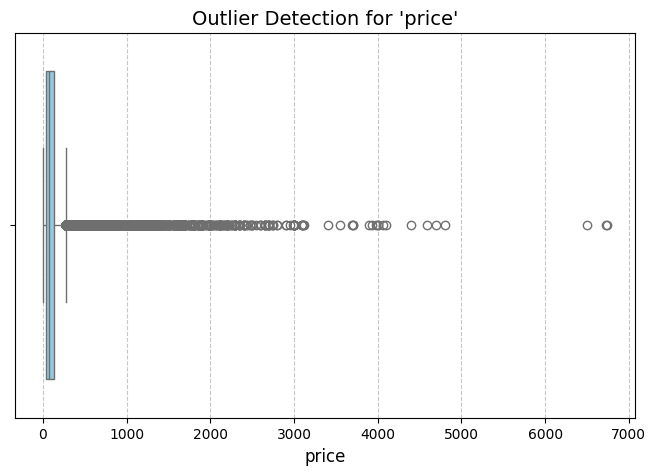

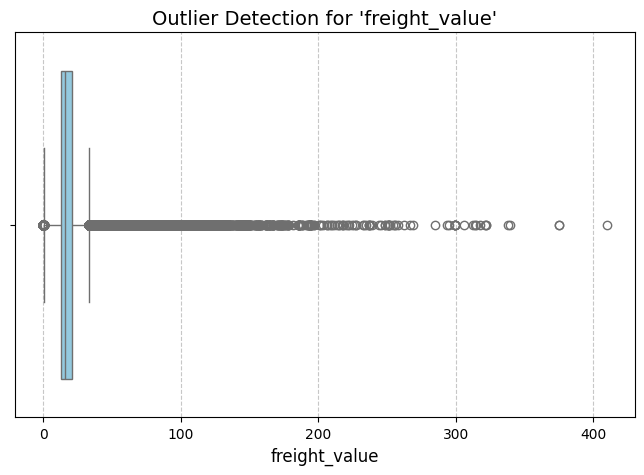

In [29]:
for col in ['price', 'freight_value']:
    plot_outliers(order_items, col)

#### 2.1.3 Product Table

**Conclusion** :
- No duplicate values or irrelevant/anomalous data were found in the dataset.  
- The majority of products sold belong to the **"cama_mesa_banho"** category, accounting for **14.6%** of total products sold.  
- Most product listings include **only one product image**.  
- The distribution of product dimensions (weight, length, width, and height) is **right-skewed**, indicating that most items are relatively small/light, with a few significantly larger ones.  
- The distribution of product name lengths is **left-skewed**, with most product names ranging between **40–60 characters**.  
- The distribution of product descriptions is **right-skewed**, with most products having **short descriptions (0–1000 characters)**, and a few containing very long descriptions.  
- Outliers exceeding the **upper bound (Q3)** were identified in most numerical columns. However, for **product_name_length**, outliers appear **below the lower bound (Q1)** instead.

In [30]:
products.duplicated(subset='product_id').sum()

0

In [31]:
products.describe()

product_name_lenght  product_description_lenght  product_photos_qty  \
count         32341.000000                32341.000000        32341.000000   
mean             48.476949                  771.495285            2.188986   
std              10.245741                  635.115225            1.736766   
min               5.000000                    4.000000            1.000000   
25%              42.000000                  339.000000            1.000000   
50%              51.000000                  595.000000            1.000000   
75%              57.000000                  972.000000            3.000000   
max              76.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      32949.000000       32949.000000       32949.000000   
mean        2276.472488          30.815078          16.937661   
std         4282.038731          16.914458          13.637554   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1900.000000          38.000000          21.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  
count      32949.000000  
mean          23.196728  
std           12.079047  
min            6.000000  
25%           15.000000  
50%           20.000000  
75%           30.000000  
max          118.000000

**Product Category Name**

In [32]:
product_category = products.product_category_name.value_counts().head(10)
product_category

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: count, dtype: int64

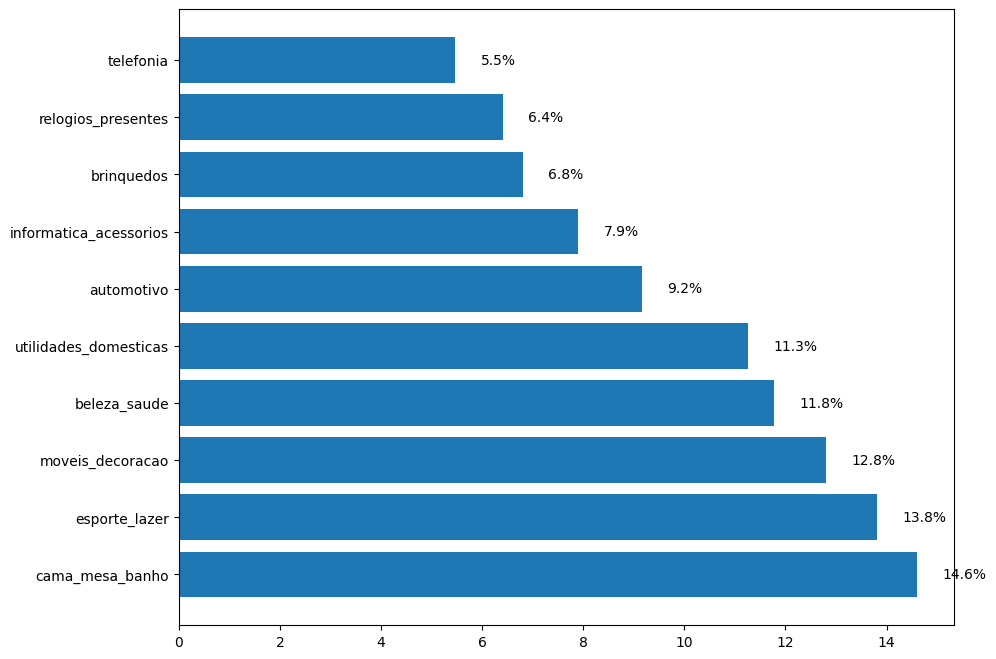

In [33]:
total = product_category.sum()
product_category_pct = (product_category / total) * 100

plt.figure(figsize=(10, 8))
plt.barh(product_category_pct.index, product_category_pct.values)
for index, value in enumerate(product_category_pct.values):
    plt.text(value + 0.5, index, f"{value:.1f}%", va='center')

plt.show()

**Product Photo Qty**

In [34]:
products_photo = products.product_photos_qty.value_counts().head(10)
products_photo

product_photos_qty
1.0     16489
2.0      6263
3.0      3860
4.0      2428
5.0      1484
6.0       968
7.0       343
8.0       192
9.0       105
10.0       95
Name: count, dtype: int64

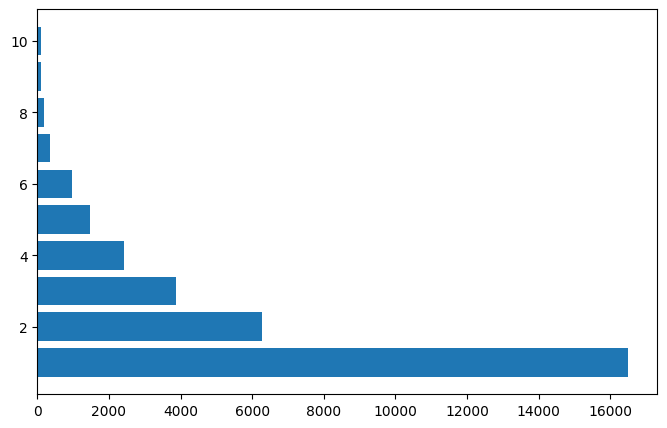

In [35]:
plt.figure(figsize=(8,5))
plt.barh(products_photo.index, products_photo.values)
plt.show()

**Distribution of Product Dimensions and Weight**

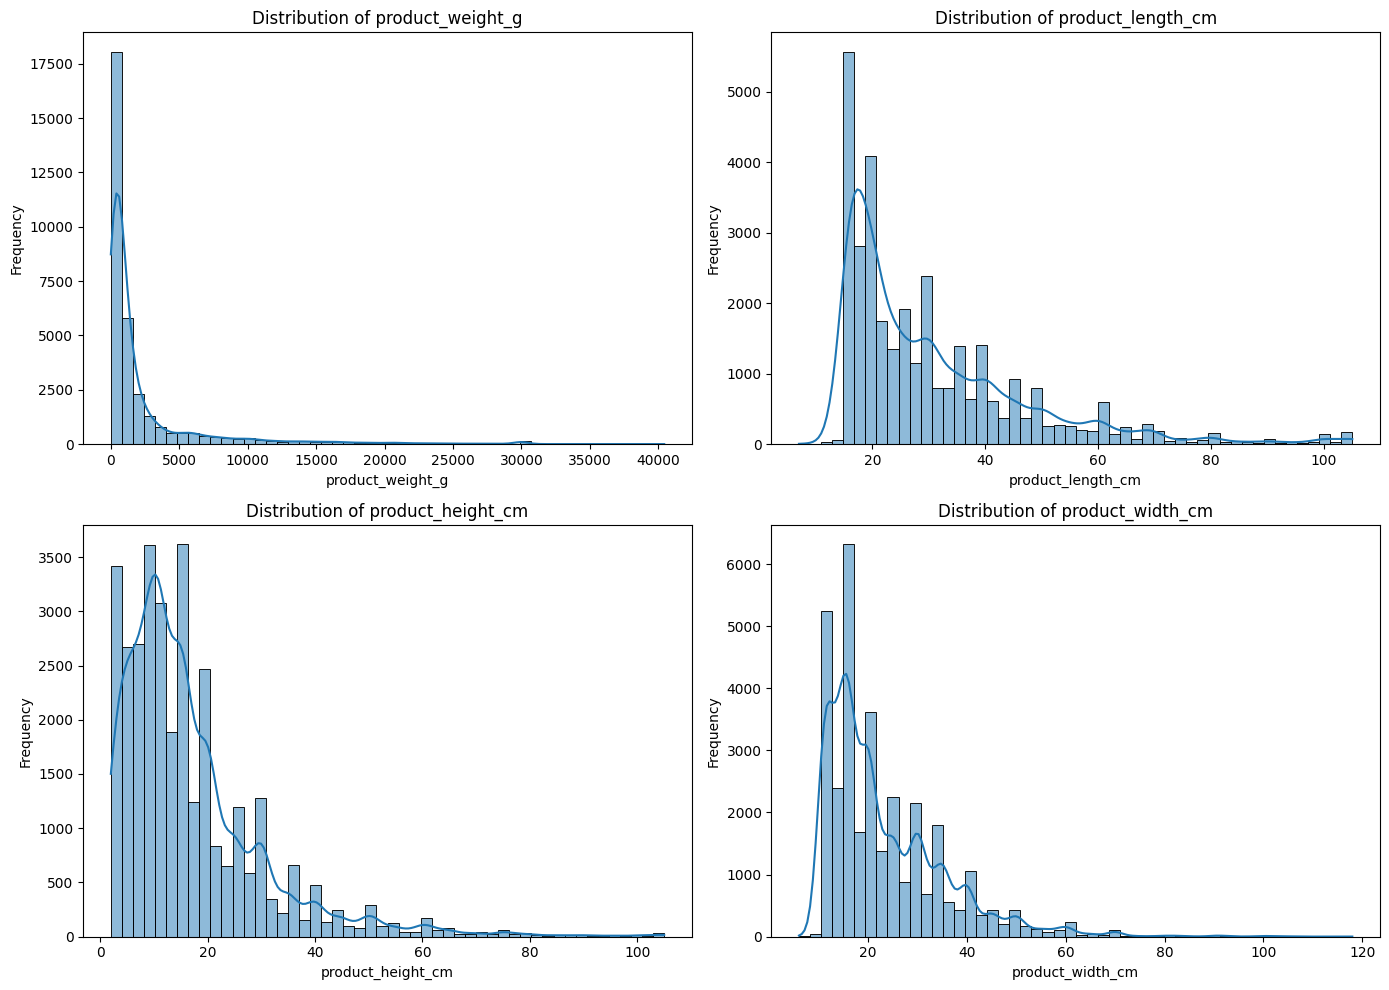

In [36]:
numeric_cols = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

plt.figure(figsize=(14, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(products[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Product Post**

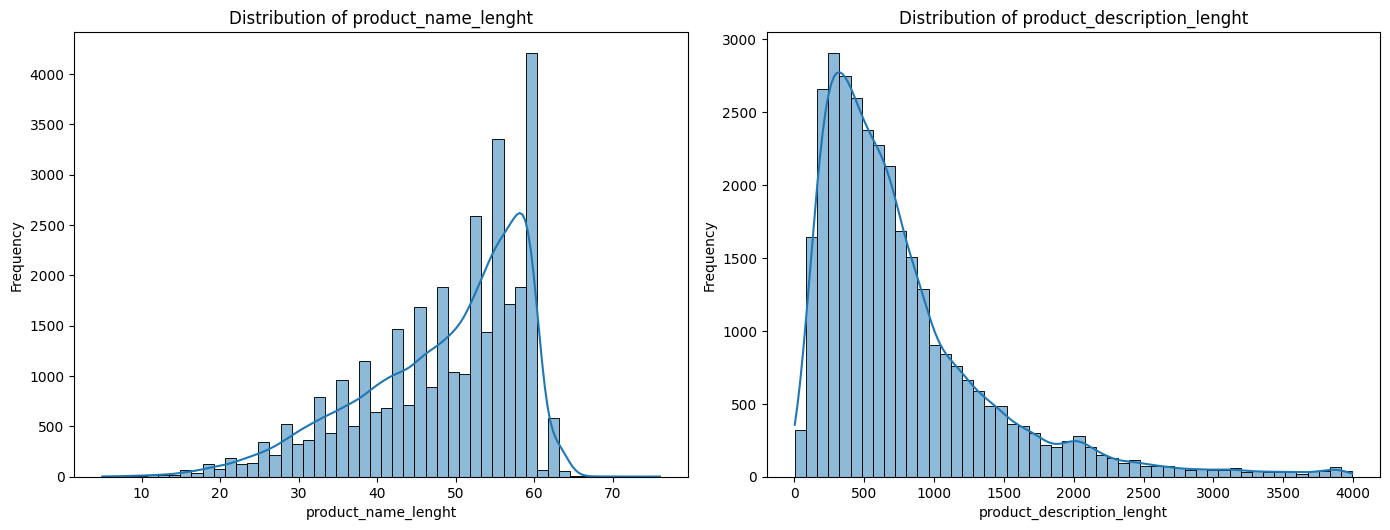

In [37]:
col_bio = ['product_name_lenght', 'product_description_lenght']

plt.figure(figsize=(14, 10))

for i, col in enumerate(col_bio, 1):
    plt.subplot(2, 2, i)
    sns.histplot(products[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Outlier numeric column in Product Table**

In [38]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


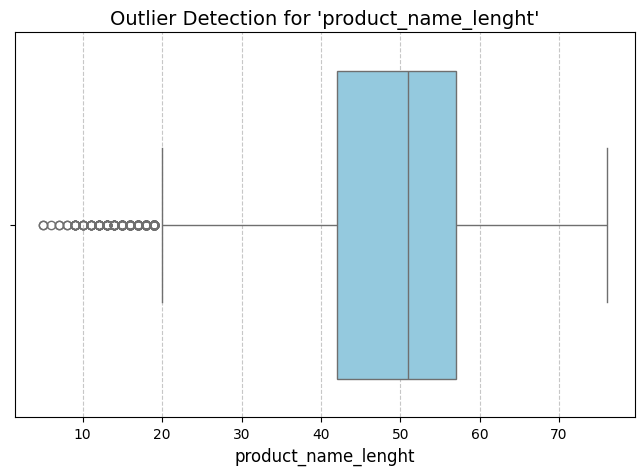

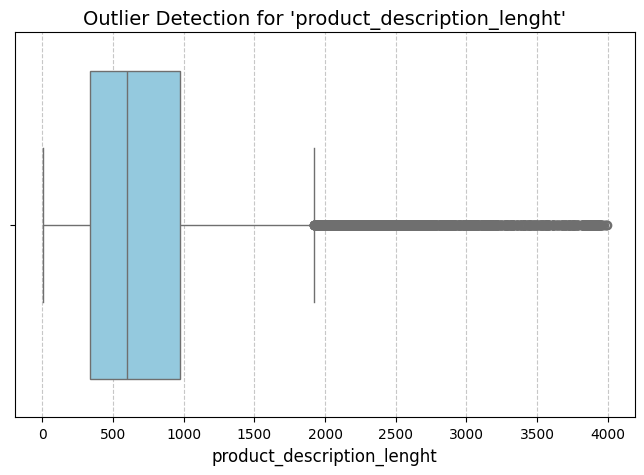

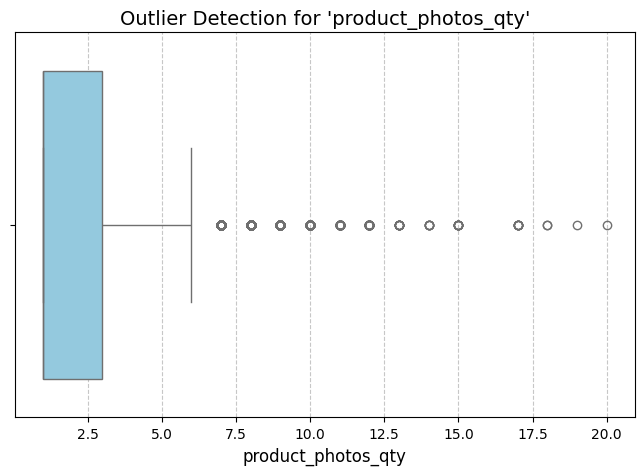

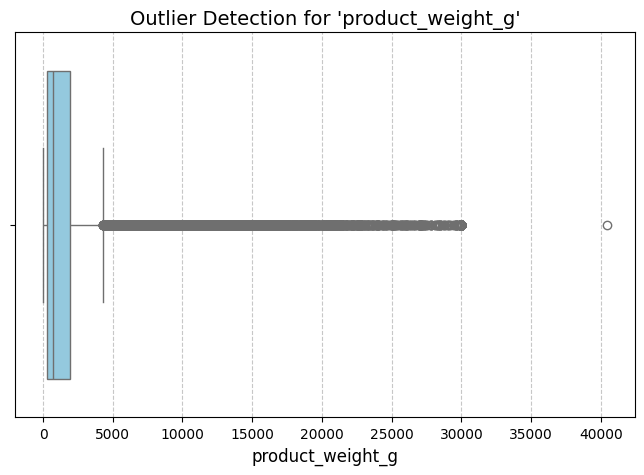

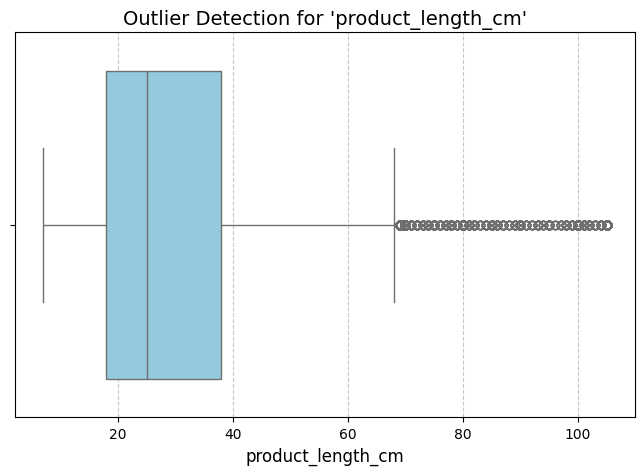

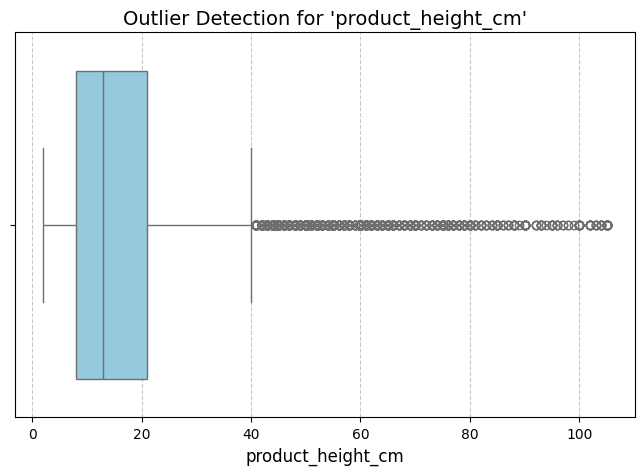

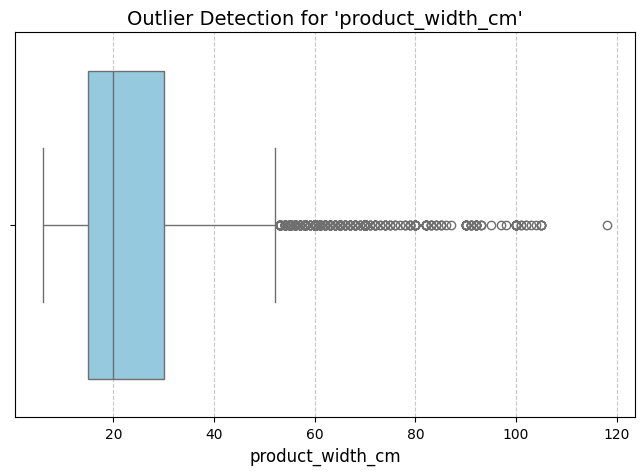

In [39]:
numeric_cols = products.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plot_outliers(products, col)

#### **2.1.4 sellers** 

**Conclusion** :
- No irrelevant or duplicate data was found in the **sellers** table.  
- No duplicate values were found in the **seller_id** column, indicating that each seller has a **unique identifier** in the dataset.  
- The city with the highest number of sellers is **São Paulo**, followed by **Curitiba**.

In [40]:
sellers.duplicated(subset='seller_id').sum()

0

In [41]:
seller_count = sellers['seller_id'].nunique()
print(seller_count)

3095


In [42]:
seller_city = sellers.seller_city.value_counts().head(10)
seller_city

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: count, dtype: int64

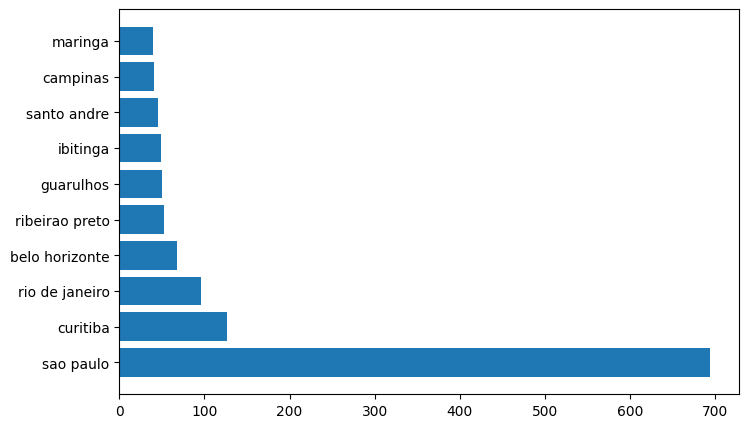

In [43]:
plt.figure(figsize=(8,5))
plt.barh(seller_city.index, seller_city.values)
plt.show()

#### 2.1.5 Customers Table

**Conclusion** :
- There are no duplicate entries in the `customer_id` column, indicating that each customer ID is unique.  
- A total of **96,096 customers** were recorded over the span of two years.  
- **São Paulo** has the highest number of customers compared to other cities.  

In [44]:
customers['customer_id'].nunique()

99441

In [45]:
dup_customers = customers.duplicated(subset='customer_id').sum()
dup_customers

0

In [46]:
customers['customer_unique_id'].nunique()

96096

In [47]:
customer_city = customers.customer_city.value_counts().head(10)
customer_city

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: count, dtype: int64

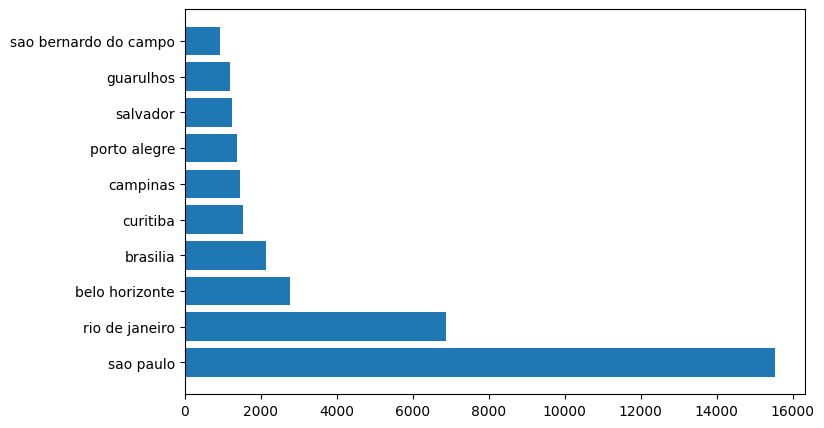

In [48]:
plt.figure(figsize=(8,5))
plt.barh(customer_city.index, customer_city.values)
plt.show()

#### **2.1.6 Payments Table**

**Conclusion** :
- No irrelevant data was found in the analyzed columns.  
- Most customer payments fall within the **0–100** range.  
- The most common payment installment option is a **single payment (1 installment)**.  
- **Credit card** is the most frequently used payment method.  
- While the majority of customers do not use installments, there are still many who choose installment plans, ranging from **2 installments** up to **24 installments**.  

In [49]:
payments.describe()

payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000

In [50]:
payments[payments['payment_sequential']== 29] 

order_id  payment_sequential payment_type  \
39108  fa65dad1b0e818e3ccc5cb0e39231352                  29      voucher   

       payment_installments  payment_value  
39108                     1          19.26

In [51]:
payment_seq = payments.payment_sequential.value_counts().head(5)
payment_seq

payment_sequential
1    99360
2     3039
3      581
4      278
5      170
Name: count, dtype: int64

**Payment Sequential**

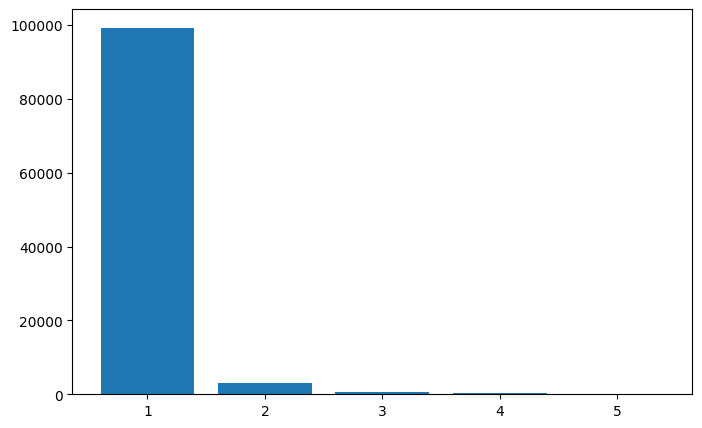

In [52]:
plt.figure(figsize=(8,5))
plt.bar(payment_seq.index, payment_seq.values)
plt.show()

**Payment Type**

In [53]:
payment_type = payments.payment_type.value_counts()
payment_type

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

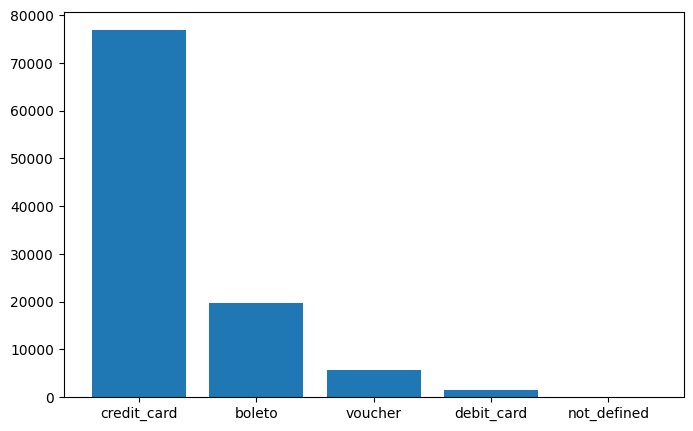

In [54]:
plt.figure(figsize=(8,5))
plt.bar(payment_type.index, payment_type.values)
plt.show()

**Payment Installement**

In [55]:
payment_install = payments['payment_installments'].value_counts().sort_index(ascending=True).head(5)
payment_install

payment_installments
0        2
1    52546
2    12413
3    10461
4     7098
Name: count, dtype: int64

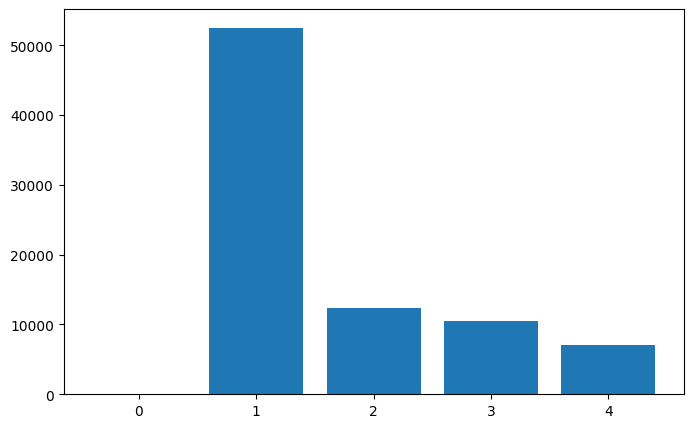

In [56]:
plt.figure(figsize=(8,5))
plt.bar(payment_install.index, payment_install.values)
plt.show()

**Outlier**|

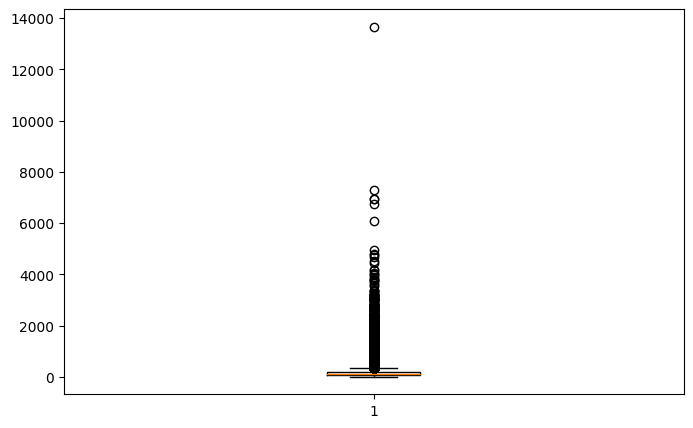

In [57]:
plt.figure(figsize=(8,5))
plt.boxplot(payments['payment_value'])
plt.show()

**Distribution of Payment Value**

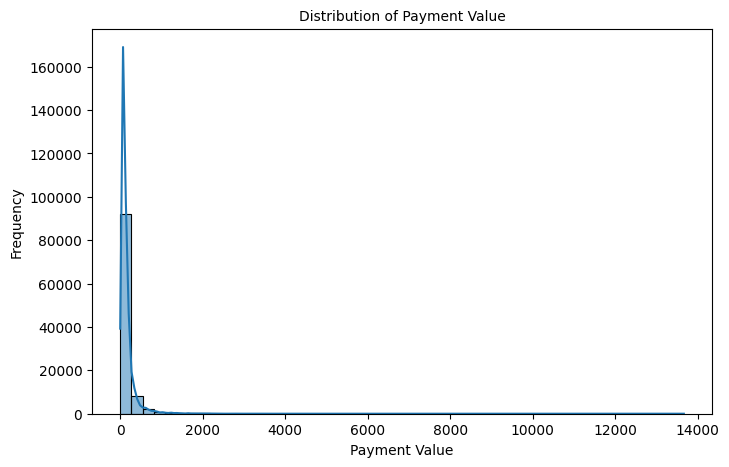

In [58]:
plt.figure(figsize=(8, 5))
sns.histplot(payments['payment_value'], kde=True, bins=50)
plt.title('Distribution of Payment Value', fontsize=10)
plt.xlabel('Payment Value')
plt.ylabel('Frequency')
plt.show()

#### **2.1.7 Reviews Table**

**Conclusion**:
- The average product rating is **5.0**.  
- Out of a total of **99,441 orders**, only **98,673 orders** have been reviewed.  
- **Rating 5.0** is the most frequently given rating, while **rating 1** occurs more often than ratings 2 and 3, and is almost equal to rating 4.  

In [59]:
reviews.describe()

review_score
count  100000.000000
mean        4.070890
std         1.359663
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000

In [60]:
reviews_count = reviews['review_score'].value_counts().sort_index()
reviews_count

review_score
1    11858
2     3235
3     8287
4    19200
5    57420
Name: count, dtype: int64

**Rating**

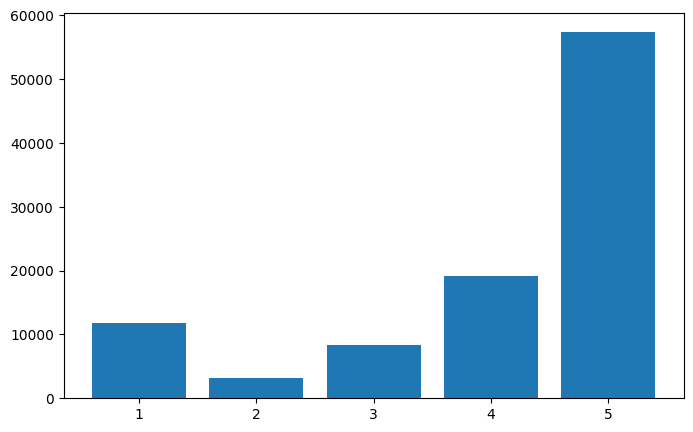

In [61]:
plt.figure(figsize=(8,5))
plt.bar(reviews_count.index, reviews_count.values)
plt.show()

**Reviews Score**

In [62]:
orders[orders['order_status']=='delivered'].shape

(96478, 8)

In [63]:
order_sum = orders['order_id'].nunique()
review_sum = reviews['order_id'].nunique()
print(f"Total Orders: {order_sum}, Total Reviews: {review_sum}")
print(f"Didnt review: {order_sum - review_sum}")

Total Orders: 99441, Total Reviews: 99441
Didnt review: 0


**Comment Review**

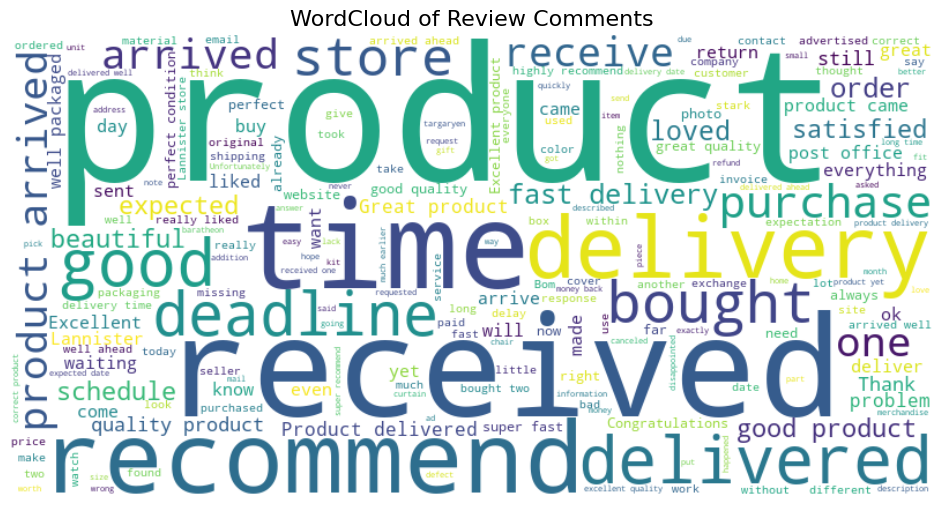

In [64]:
from wordcloud import WordCloud

text = " ".join(str(review) for review in reviews['review_comment_message'].dropna())

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Review Comments", fontsize=16)
plt.show()

#### **2.1.8 Geolocation Table**

In [65]:
geolocation.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [66]:
geolocation['geolocation_city'].nunique()

8011

**Geolocation**

In [67]:
geo_count = geolocation['geolocation_city'].value_counts().sort_values(ascending=False).head(10)
geo_count

geolocation_city
sao paulo                135800
rio de janeiro            62151
belo horizonte            27805
são paulo                 24918
curitiba                  16593
porto alegre              13521
salvador                  11865
guarulhos                 11340
brasilia                  10470
sao bernardo do campo      8112
Name: count, dtype: int64

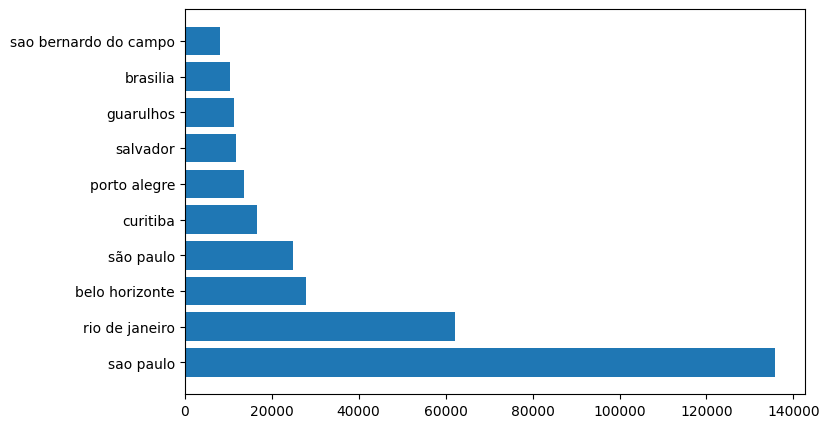

In [68]:
plt.figure(figsize=(8,5))
plt.barh(geo_count.index, geo_count.values)
plt.show()

### **2.2 Thematic EDA Based on Business Aspects**
Perform a deeper analysis based on **three core business aspects**:

- **Customer Analysis:**  
  Explore customer behavior, location distribution, purchasing patterns, and customer reviews.  

- **Seller Analysis:**  
  Examine seller performance, location distribution, shipping efficiency, and contribution to overall sales.  

- **Product Sales Analysis:**  
  Analyze product categories, pricing and shipping cost distribution, and sales trends over time.

#### **2.2.1 Product Sales Analysis**

In [69]:
product_sales = pd.merge(orders, order_items, on='order_id', how='inner')
product_sales

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3       949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4       ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                  ...                               ...   
112645  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
112646  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
112647  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
112648  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
112649  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1         delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2         delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3         delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4         delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
...             ...                      ...                  ...   
112645    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
112646    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
112647    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
112648    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
112649    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2018-07-26 14:31:00           2018-08-07 15:27:45   
2               2018-08-08 13:50:00           2018-08-17 18:06:29   
3               2017-11-22 13:39:59           2017-12-02 00:28:42   
4               2018-02-14 19:46:34           2018-02-16 18:17:02   
...                             ...                           ...   
112645          2018-02-07 23:22:42           2018-02-28 17:37:56   
112646          2017-08-28 20:52:26           2017-09-21 11:24:17   
112647          2018-01-12 15:35:03           2018-01-25 23:32:54   
112648          2018-01-12 15:35:03           2018-01-25 23:32:54   
112649          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date  order_item_id  \
0                2017-10-18 00:00:00              1   
1                2018-08-13 00:00:00              1   
2                2018-09-04 00:00:00              1   
3                2017-12-15 00:00:00              1   
4                2018-02-26 00:00:00              1   
...                              ...            ...   
112645           2018-03-02 00:00:00              1   
112646           2017-09-27 00:00:00              1   
112647           2018-02-15 00:00:00              1   
112648           2018-02-15 00:00:00              2   
112649           2018-04-03 00:00:00              1   

                              product_id                         seller_id  \
0       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1       595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
2       aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   
3       d0b61bfb1de832b15ba9d266ca96e5b0  66922902710d126a0e7d26b0e3805106   
4       65266b2da20d04dbe00c5c2d3bb7859e  2c9e548be18521d1c43cde1c582c6de8   
...                                  ...                               ...   
112645  f1d4ce8c6dd66c47bbaa8c6781c2a923  1f9ab4708f3056ede07124aad39a2554   
112646  b80910977a37536adeddd63663f916ad  d50d79cb34e38265a8649c383dcffd48   
112647  d1c427060a0f73f6b889a5c7c61f2ac4  a1043bafd471dff536d0c462352beb48

In [70]:
product_sales = pd.merge(product_sales, products, on='product_id', how='inner')
product_sales

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
2       0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
3       bfc39df4f36c3693ff3b63fcbea9e90a  53904ddbea91e1e92b2b3f1d09a7af86   
4       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
...                                  ...                               ...   
112645  e8fd20068b9f7e6ec07068bb7537f781  609b9fb8cad4fe0c7b376f77c8ab76ad   
112646  e8fd20068b9f7e6ec07068bb7537f781  609b9fb8cad4fe0c7b376f77c8ab76ad   
112647  cfa78b997e329a5295b4ee6972c02979  a2f7428f0cafbc8e59f20e1444b67315   
112648  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
112649  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1         delivered      2017-08-15 18:29:31  2017-08-15 20:05:16   
2         delivered      2017-08-02 18:24:47  2017-08-02 18:43:15   
3         delivered      2017-10-23 23:26:46  2017-10-25 02:14:11   
4         delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
...             ...                      ...                  ...   
112645    delivered      2017-08-10 21:21:07  2017-08-10 21:35:26   
112646    delivered      2017-08-10 21:21:07  2017-08-10 21:35:26   
112647    delivered      2017-12-20 09:52:41  2017-12-20 10:09:52   
112648    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
112649    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2017-08-17 15:28:33           2017-08-18 14:44:43   
2               2017-08-04 17:35:43           2017-08-07 18:30:01   
3               2017-10-27 16:48:46           2017-11-07 18:04:59   
4               2018-07-26 14:31:00           2018-08-07 15:27:45   
...                             ...                           ...   
112645          2017-08-18 16:42:51           2017-08-23 15:36:29   
112646          2017-08-18 16:42:51           2017-08-23 15:36:29   
112647          2017-12-20 20:25:25           2018-01-26 15:45:14   
112648          2017-03-10 11:18:03           2017-03-17 15:08:01   
112649          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date  order_item_id  \
0                2017-10-18 00:00:00              1   
1                2017-08-28 00:00:00              1   
2                2017-08-15 00:00:00              1   
3                2017-11-13 00:00:00              1   
4                2018-08-13 00:00:00              1   
...                              ...            ...   
112645           2017-08-31 00:00:00              1   
112646           2017-08-31 00:00:00              2   
112647           2018-01-18 00:00:00              1   
112648           2017-03-28 00:00:00              1   
112649           2018-04-03 00:00:00              1   

                              product_id  ...   price freight_value  \
0       87285b34884572647811a353c7ac498a  ...   29.99          8.72   
1       87285b34884572647811a353c7ac498a  ...   29.99          7.78   
2       87285b34884572647811a353c7ac498a  ...   29.99          7.78   
3       87285b34884572647811a353c7ac498a  ...   29.99         14.10   
4       595fac2a385ac33a80bd5114aec74eb8  ...  118.70         22.76   
...                                  ...  ...     ...           ...   
112645  0df37da38a30a713453b03053d60d3f7  ...  356.00         18.12   
112646  0df37da38a30a713453b03053d60d3f7  ...  356.00         18.12   
112647  3d2c44374ee42b3003a470f3e937a2ea  ...   55.90         15.14   
112648  ac35486adb7b02598c182c2ff2e05254  ...   72.00         13.0

In [71]:
product_sales = pd.merge(product_sales, customers, on='customer_id', how='inner')
product_sales = pd.merge(product_sales, payments, on='order_id', how='inner')
product_sales = pd.merge(product_sales, reviews, on='order_id', how='inner')
product_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118315 entries, 0 to 118314
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118315 non-null  object 
 1   customer_id                    118315 non-null  object 
 2   order_status                   118315 non-null  object 
 3   order_purchase_timestamp       118315 non-null  object 
 4   order_approved_at              118300 non-null  object 
 5   order_delivered_carrier_date   117061 non-null  object 
 6   order_delivered_customer_date  115727 non-null  object 
 7   order_estimated_delivery_date  118315 non-null  object 
 8   order_item_id                  118315 non-null  int64  
 9   product_id                     118315 non-null  object 
 10  seller_id                      118315 non-null  object 
 11  shipping_limit_date            118315 non-null  object 
 12  price                         

In [72]:
pd.options.display.max_columns = None

In [73]:
product_sales.isnull().sum().sort_values(ascending=False)

review_comment_title             104230
review_comment_message            67682
order_delivered_customer_date      2588
product_category_name              1709
product_photos_qty                 1709
product_description_lenght         1709
product_name_lenght                1709
order_delivered_carrier_date       1254
product_weight_g                     20
product_width_cm                     20
product_height_cm                    20
product_length_cm                    20
order_approved_at                    15
customer_state                        0
payment_installments                  0
payment_sequential                    0
payment_type                          0
customer_zip_code_prefix              0
payment_value                         0
review_id                             0
review_score                          0
review_creation_date                  0
customer_city                         0
order_id                              0
customer_unique_id                    0


In [74]:
category_col = product_sales.select_dtypes(include=['object']).columns

##### **Monthly Sales**

**Conclusion :**
- **Sales increased** month by month compared to the **previous year**.  
- **Sales dropped** at the **end of 2017**.  
- Even though **sales were not always stable**, they kept **growing again in the following months**.  

In [75]:
product_sales['order_purchase_timestamp'] = pd.to_datetime(product_sales['order_purchase_timestamp'])

product_sales['order_purchase_year'] = product_sales['order_purchase_timestamp'].dt.year
product_sales['order_purchase_month'] = product_sales['order_purchase_timestamp'].dt.month
product_sales['order_purchase_day'] = product_sales['order_purchase_timestamp'].dt.day

product_delivered = product_sales[product_sales['order_status'] == 'delivered']

order_per_years = (
    product_delivered
    .groupby([pd.Grouper(key='order_purchase_timestamp', freq='M')])['order_id']
    .count()
    .reset_index()
)

order_per_years

order_purchase_timestamp  order_id
0                2016-10-31       335
1                2016-11-30         0
2                2016-12-31         1
3                2017-01-31       981
4                2017-02-28      1973
5                2017-03-31      3098
6                2017-04-30      2715
7                2017-05-31      4308
8                2017-06-30      3727
9                2017-07-31      4771
10               2017-08-31      5107
11               2017-09-30      5041
12               2017-10-31      5497
13               2017-11-30      8891
14               2017-12-31      6471
15               2018-01-31      8418
16               2018-02-28      7867
17               2018-03-31      8384
18               2018-04-30      8124
19               2018-05-31      8113
20               2018-06-30      7327
21               2018-07-31      7223
22               2018-08-31      7356

In [76]:
product_sales

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
4       0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
...                                  ...                               ...   
118310  e8fd20068b9f7e6ec07068bb7537f781  609b9fb8cad4fe0c7b376f77c8ab76ad   
118311  e8fd20068b9f7e6ec07068bb7537f781  609b9fb8cad4fe0c7b376f77c8ab76ad   
118312  cfa78b997e329a5295b4ee6972c02979  a2f7428f0cafbc8e59f20e1444b67315   
118313  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
118314  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3         delivered      2017-08-15 18:29:31  2017-08-15 20:05:16   
4         delivered      2017-08-02 18:24:47  2017-08-02 18:43:15   
...             ...                      ...                  ...   
118310    delivered      2017-08-10 21:21:07  2017-08-10 21:35:26   
118311    delivered      2017-08-10 21:21:07  2017-08-10 21:35:26   
118312    delivered      2017-12-20 09:52:41  2017-12-20 10:09:52   
118313    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
118314    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2017-10-04 19:55:00           2017-10-10 21:25:13   
2               2017-10-04 19:55:00           2017-10-10 21:25:13   
3               2017-08-17 15:28:33           2017-08-18 14:44:43   
4               2017-08-04 17:35:43           2017-08-07 18:30:01   
...                             ...                           ...   
118310          2017-08-18 16:42:51           2017-08-23 15:36:29   
118311          2017-08-18 16:42:51           2017-08-23 15:36:29   
118312          2017-12-20 20:25:25           2018-01-26 15:45:14   
118313          2017-03-10 11:18:03           2017-03-17 15:08:01   
118314          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date  order_item_id  \
0                2017-10-18 00:00:00              1   
1                2017-10-18 00:00:00              1   
2                2017-10-18 00:00:00              1   
3                2017-08-28 00:00:00              1   
4                2017-08-15 00:00:00              1   
...                              ...            ...   
118310           2017-08-31 00:00:00              1   
118311           2017-08-31 00:00:00              2   
118312           2018-01-18 00:00:00              1   
118313           2017-03-28 00:00:00              1   
118314           2018-04-03 00:00:00              1   

                              product_id                         seller_id  \
0       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
4       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
...                                  ...                               ...   
118310  0df37da38a30a713453b03053d60d3f7  218d46b86c1881d022bce9c68a7d4b15   
118311  0df37da38a30a713453b03053d60d3f7  218d46b86c1881d022bce9c68a7d4b15   
118312  3d2c44374ee42b3003a470f3e937a2ea  ce248b21cb2adc36282ede306b7660e5

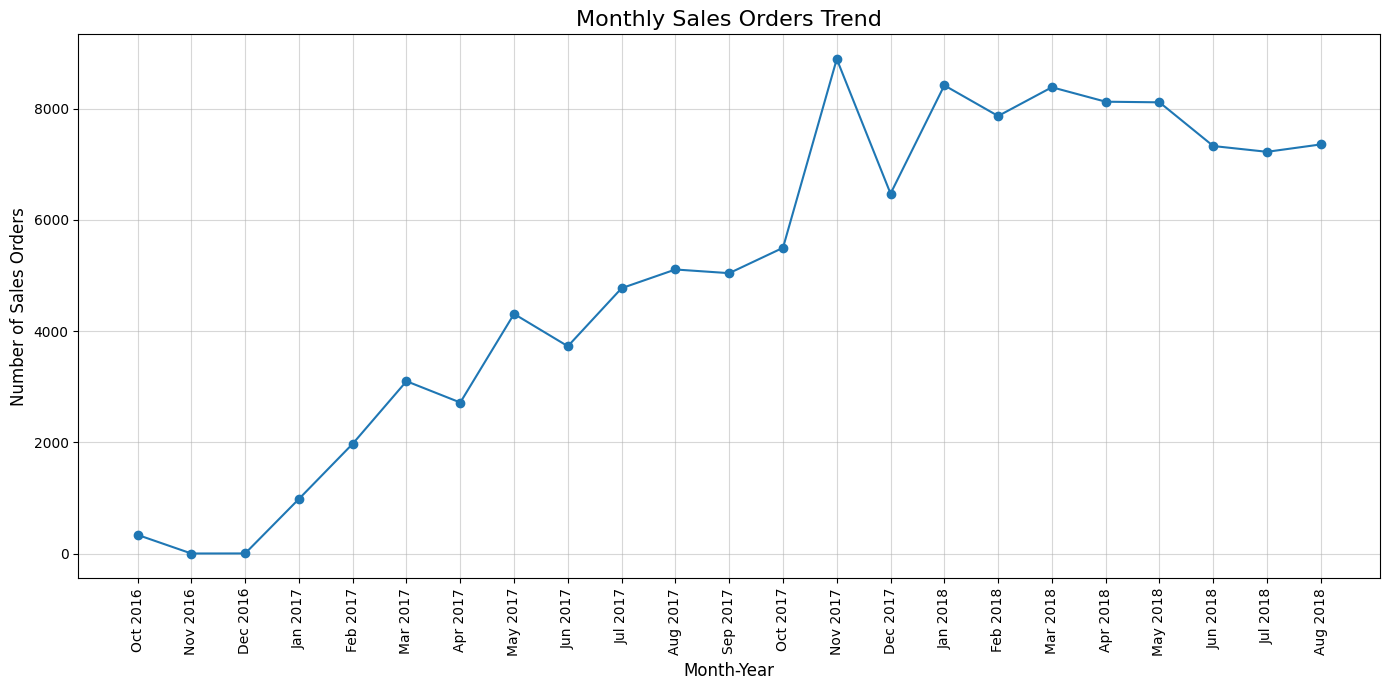

In [77]:
order_per_years['month_year'] = order_per_years['order_purchase_timestamp'].dt.strftime('%b %Y')

plt.figure(figsize=(14, 7))
plt.plot(order_per_years['month_year'], order_per_years['order_id'], marker='o')
plt.title("Monthly Sales Orders Trend", fontsize=16)
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Number of Sales Orders", fontsize=12)
plt.xticks(rotation=90)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

##### **Comparison Delivery Status**


**Conclusion :**  
- **90%** of delivery statuses were **On-Time**.  
- The **highest delay cases** occurred in **April 2017**.  
- Delays **decreased over time**, showing an **improving trend**.  
- There is a **relationship between demand volume and delays** — as total orders increased, the **delay rate also tended to rise**.  

In [78]:
product_sales['order_delivered_customer_date'] = pd.to_datetime(product_sales['order_delivered_customer_date'])
product_sales['order_estimated_delivery_date'] = pd.to_datetime(product_sales['order_estimated_delivery_date'])

def check_delay(row):
    if pd.isnull(row['order_delivered_customer_date']) or pd.isnull(row['order_estimated_delivery_date']):
        return 'Missing Data'
    elif row['order_delivered_customer_date'] > row['order_estimated_delivery_date']:
        return 'Late'
    else:
        return 'On Time'
    
product_sales['delivery_status'] = product_sales.apply(check_delay, axis=1)

delay_count = product_sales['delivery_status'].value_counts()
delay_count

delivery_status
On Time         106662
Late              9065
Missing Data      2588
Name: count, dtype: int64

In [79]:
delay_count.drop('Missing Data', inplace=True)
delay_count

delivery_status
On Time    106662
Late         9065
Name: count, dtype: int64

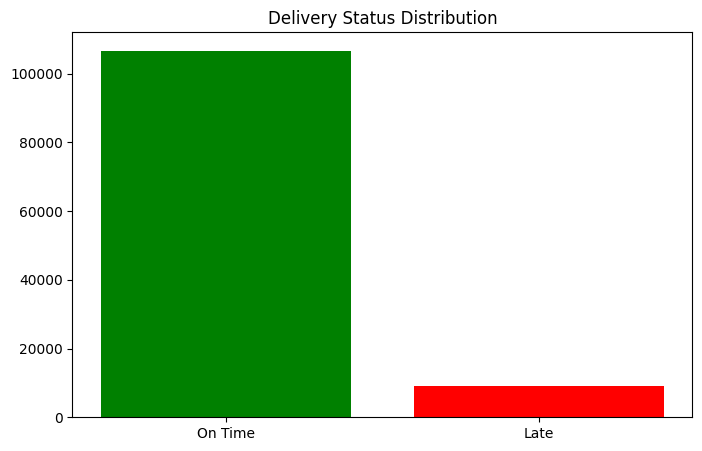

In [80]:
plt.figure(figsize=(8,5))
plt.bar(delay_count.index, delay_count.values, color=['green', 'red'])
plt.title("Delivery Status Distribution")
plt.show()

**Delivery Status by Month**

In [81]:
product_sales['month'] = product_sales['order_estimated_delivery_date'].dt.to_period('M')

monthly_status = product_sales.groupby(['month', 'delivery_status'])['order_id'].count().unstack().fillna(0)

monthly_status.index = monthly_status.index.to_timestamp()
monthly_status.index = monthly_status.index.strftime('%b %Y')

In [82]:
monthly_status

delivery_status    Late  Missing Data  On Time
month                                         
Oct 2016            0.0           4.0      1.0
Nov 2016            2.0          18.0    184.0
Dec 2016            1.0          26.0    151.0
Jan 2017            0.0           0.0      3.0
Feb 2017           13.0           9.0    347.0
Mar 2017          108.0         149.0   3116.0
Apr 2017          136.0          90.0   2441.0
May 2017          264.0         162.0   3210.0
Jun 2017          135.0         132.0   4092.0
Jul 2017          155.0         102.0   3671.0
Aug 2017          160.0         119.0   5032.0
Sep 2017          191.0         121.0   5004.0
Oct 2017          258.0         100.0   4583.0
Nov 2017          295.0         127.0   5295.0
Dec 2017         1209.0         195.0   7387.0
Jan 2018          483.0         110.0   5944.0
Feb 2018          489.0         163.0   6772.0
Mar 2018         1875.0         207.0   8361.0
Apr 2018         1201.0         198.0   6641.0
May 2018          449.0         168.0   8988.0
Jun 2018          493.0          79.0   5066.0
Jul 2018          149.0          98.0   8324.0
Aug 2018          999.0         207.0   9699.0
Sep 2018            0.0           4.0   2278.0
Oct 2018            0.0           0.0     72.0

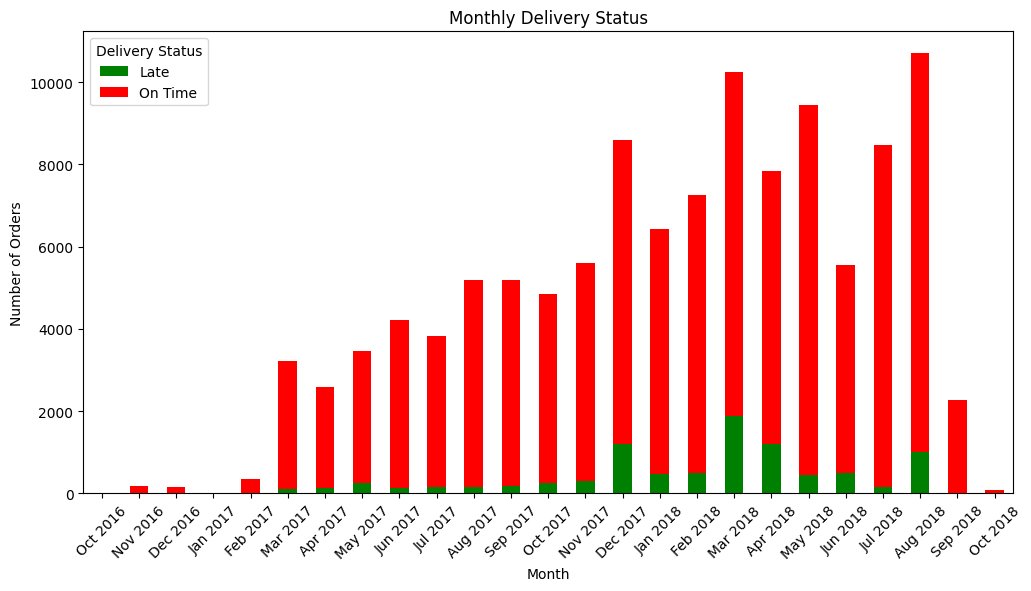

In [83]:
if 'Missing Data' in monthly_status.columns:
    monthly_status.drop(columns='Missing Data', inplace=True)

plt.figure(figsize=(12, 6))
monthly_status.plot(kind='bar', stacked=True, color=['green', 'red'], ax=plt.gca())
plt.title("Monthly Delivery Status")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.legend(title="Delivery Status")
plt.show()

In [84]:
product_sales['delay_days'] = (
    product_sales['order_delivered_customer_date'] - product_sales['order_estimated_delivery_date']\
).dt.days


product_sales

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
4       0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
...                                  ...                               ...   
118310  e8fd20068b9f7e6ec07068bb7537f781  609b9fb8cad4fe0c7b376f77c8ab76ad   
118311  e8fd20068b9f7e6ec07068bb7537f781  609b9fb8cad4fe0c7b376f77c8ab76ad   
118312  cfa78b997e329a5295b4ee6972c02979  a2f7428f0cafbc8e59f20e1444b67315   
118313  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
118314  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3         delivered      2017-08-15 18:29:31  2017-08-15 20:05:16   
4         delivered      2017-08-02 18:24:47  2017-08-02 18:43:15   
...             ...                      ...                  ...   
118310    delivered      2017-08-10 21:21:07  2017-08-10 21:35:26   
118311    delivered      2017-08-10 21:21:07  2017-08-10 21:35:26   
118312    delivered      2017-12-20 09:52:41  2017-12-20 10:09:52   
118313    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
118314    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2017-10-04 19:55:00           2017-10-10 21:25:13   
2               2017-10-04 19:55:00           2017-10-10 21:25:13   
3               2017-08-17 15:28:33           2017-08-18 14:44:43   
4               2017-08-04 17:35:43           2017-08-07 18:30:01   
...                             ...                           ...   
118310          2017-08-18 16:42:51           2017-08-23 15:36:29   
118311          2017-08-18 16:42:51           2017-08-23 15:36:29   
118312          2017-12-20 20:25:25           2018-01-26 15:45:14   
118313          2017-03-10 11:18:03           2017-03-17 15:08:01   
118314          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date  order_item_id  \
0                         2017-10-18              1   
1                         2017-10-18              1   
2                         2017-10-18              1   
3                         2017-08-28              1   
4                         2017-08-15              1   
...                              ...            ...   
118310                    2017-08-31              1   
118311                    2017-08-31              2   
118312                    2018-01-18              1   
118313                    2017-03-28              1   
118314                    2018-04-03              1   

                              product_id                         seller_id  \
0       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
4       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
...                                  ...                               ...   
118310  0df37da38a30a713453b03053d60d3f7  218d46b86c1881d022bce9c68a7d4b15   
118311  0df37da38a30a713453b03053d60d3f7  218d46b86c1881d022bce9c68a7d4b15   
118312  3d2c44374ee42b3003a470f3e937a2ea  ce248b21cb2adc36282ede306b7660e5

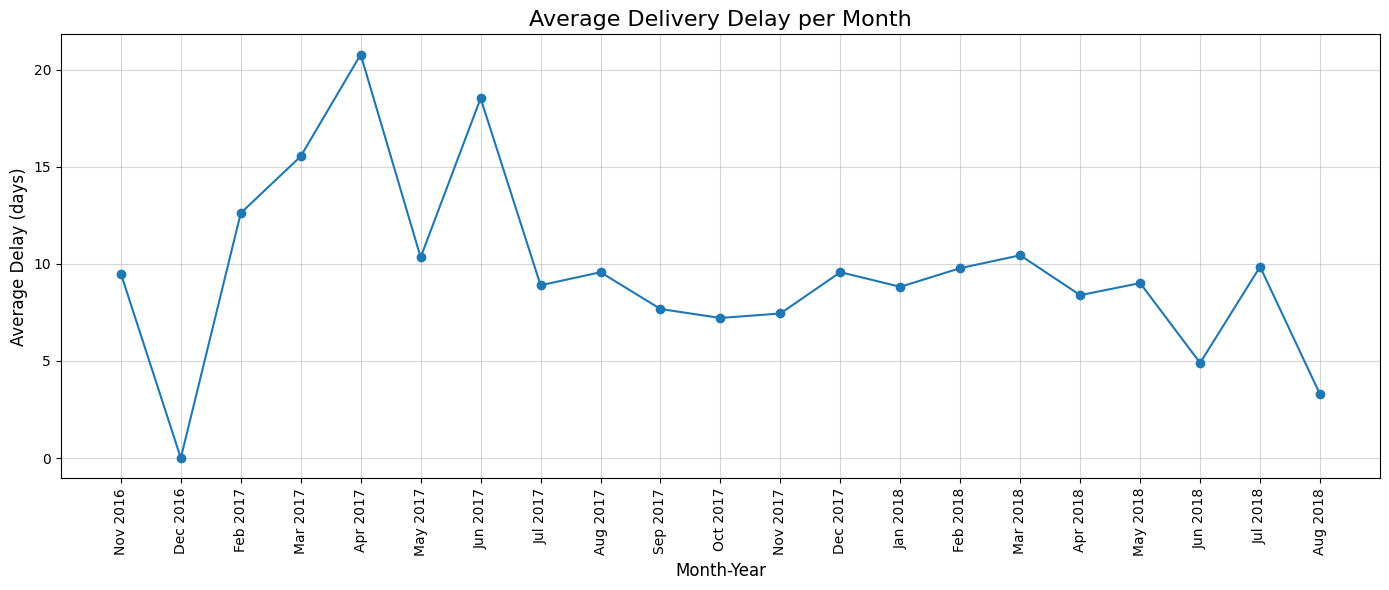

In [85]:
product_sales['month_year'] = product_sales['order_estimated_delivery_date'].dt.to_period('M')

delay_filltered = product_sales[product_sales['delay_days'] >= 0]

monthly_delay = (
    delay_filltered.groupby('month_year')['delay_days']
    .mean()
    .reset_index()
)

monthly_delay['month_year'] = monthly_delay['month_year'].dt.to_timestamp()
monthly_delay['month_year_str'] = monthly_delay['month_year'].dt.strftime('%b %Y')

plt.figure(figsize=(14,6))
plt.plot(monthly_delay['month_year_str'], monthly_delay['delay_days'], marker='o', linestyle='-')
plt.title("Average Delivery Delay per Month", fontsize=16)
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Average Delay (days)", fontsize=12)
plt.xticks(rotation=90)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

**Why Delayed??**

In [86]:
delay_filltered.head().sort_values(by='delay_days', ascending=False)

order_id                       customer_id  \
34  fc74153e0ac39bb68c8f8f9e4758f001  787c8dad81798b72c5ae7d0ed526192e   
35  bb535f122a301b2b48f02befcedfcad5  5fa3e7405bd851a51f1e1aa56fc145a0   
15  6552ae78f1de31bcde1fc2cfcab0d25d  ccb212cf6faf1356d9b5509259de0940   
44  f7f0b79050e7ef0b1cf7ffceb0aa114a  46fb8cff647939aaf32c4ab5be554501   
49  591d010258be8e3bc48d82503022a507  c46809cdeaa8e5698a9169c27de52b7b   

   order_status order_purchase_timestamp    order_approved_at  \
34    delivered      2018-04-12 12:40:46  2018-04-13 12:50:48   
35    delivered      2017-08-03 11:36:18  2017-08-04 09:35:18   
15    delivered      2018-05-17 14:05:28  2018-05-18 02:14:44   
44    delivered      2018-08-04 14:40:31  2018-08-07 04:44:36   
49    delivered      2018-05-22 13:04:15  2018-05-22 13:15:18   

   order_delivered_carrier_date order_delivered_customer_date  \
34          2018-04-18 20:51:19           2018-06-29 17:03:25   
35          2017-08-07 14:40:04           2017-09-18 18:24:48   
15          2018-05-23 12:44:00           2018-06-18 20:34:58   
44          2018-08-13 15:19:00           2018-08-14 15:08:57   
49          2018-05-25 12:41:00           2018-06-07 19:52:40   

   order_estimated_delivery_date  order_item_id  \
34                    2018-05-11              1   
35                    2017-08-25              1   
15                    2018-06-07              1   
44                    2018-08-10              1   
49                    2018-06-04              1   

                          product_id                         seller_id  \
34  595fac2a385ac33a80bd5114aec74eb8  ef0ace09169ac090589d85746e3e036f   
35  595fac2a385ac33a80bd5114aec74eb8  058fd0aa2bfdb2274e05e1ae971dabb6   
15  595fac2a385ac33a80bd5114aec74eb8  ef0ace09169ac090589d85746e3e036f   
44  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
49  595fac2a385ac33a80bd5114aec74eb8  ef0ace09169ac090589d85746e3e036f   

    shipping_limit_date  price  freight_value product_category_name  \
34  2018-04-19 12:50:48  117.7          51.32            perfumaria   
35  2017-08-10 09:31:33  142.5          15.75            perfumaria   
15  2018-05-23 02:14:44  119.9          18.72            perfumaria   
44  2018-08-09 04:44:36  116.9           9.33            perfumaria   
49  2018-05-25 13:15:18  119.9           8.78            perfumaria   

    product_name_lenght  product_description_lenght  product_photos_qty  \
34                 29.0                       178.0                 1.0   
35                 29.0                       178.0                 1.0   
15                 29.0                       178.0                 1.0   
44                 29.0                       178.0                 1.0   
49                 29.0                       178.0                 1.0   

    product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
34             400.0               19.0               13.0              19.0   
35             400.0               19.0               13.0              19.0   
15             400.0               19.0               13.0              19.0   
44             400.0               19.0               13.0              19.0   
49             400.0               19.0               13.0              19.0   

                  customer_unique_id  customer_zip_code_prefix  \
34  40dcf0ca504c92ee3e0e59ee94fb9423                     59970   
35  73fd25c9fc5706f6db9eaecbf248241e                     23811   
15  6a34ee4ea650624a9754fbdc99fdd356                     19026   
44  3edcab192482e9871c17b34cf98c3996                     33821   
49  56130a3a977039ba949d71f501d4669f                     25250   

          customer_city customer_state  payment_sequential payment_type  \
34     marcelino vieira             RN                   1  credit_card   
35              itaguai             RJ                   1  credit_card   
15  presidente prudente             SP                   1  credit_c

In [87]:
df_corr = product_sales[['product_weight_g','freight_value','product_length_cm','product_height_cm','product_width_cm', 'delivery_status']].dropna()
df_corr = df_corr[df_corr['delivery_status'] != 'Missing Data']
df_corr

product_weight_g  freight_value  product_length_cm  product_height_cm  \
0                  500.0           8.72               19.0                8.0   
1                  500.0           8.72               19.0                8.0   
2                  500.0           8.72               19.0                8.0   
3                  500.0           7.78               19.0                8.0   
4                  500.0           7.78               19.0                8.0   
...                  ...            ...                ...                ...   
118310            2800.0          18.12               28.0               23.0   
118311            2800.0          18.12               28.0               23.0   
118312             300.0          15.14               16.0                6.0   
118313            1175.0          13.08               22.0               13.0   
118314             150.0          18.36               16.0                7.0   

        product_width_cm delivery_status  
0                   13.0         On Time  
1                   13.0         On Time  
2                   13.0         On Time  
3                   13.0         On Time  
4                   13.0         On Time  
...                  ...             ...  
118310              23.0         On Time  
118311              23.0         On Time  
118312              12.0            Late  
118313              18.0         On Time  
118314              15.0         On Time  

[115707 rows x 6 columns]

In [88]:
status_map = {'On Time': 0, 'Late': 1}
df_corr['delivery_status_num'] = df_corr['delivery_status'].map(status_map)
df_corr.drop(columns='delivery_status', inplace=True)
df_corr

product_weight_g  freight_value  product_length_cm  product_height_cm  \
0                  500.0           8.72               19.0                8.0   
1                  500.0           8.72               19.0                8.0   
2                  500.0           8.72               19.0                8.0   
3                  500.0           7.78               19.0                8.0   
4                  500.0           7.78               19.0                8.0   
...                  ...            ...                ...                ...   
118310            2800.0          18.12               28.0               23.0   
118311            2800.0          18.12               28.0               23.0   
118312             300.0          15.14               16.0                6.0   
118313            1175.0          13.08               22.0               13.0   
118314             150.0          18.36               16.0                7.0   

        product_width_cm  delivery_status_num  
0                   13.0                    0  
1                   13.0                    0  
2                   13.0                    0  
3                   13.0                    0  
4                   13.0                    0  
...                  ...                  ...  
118310              23.0                    0  
118311              23.0                    0  
118312              12.0                    1  
118313              18.0                    0  
118314              15.0                    0  

[115707 rows x 6 columns]

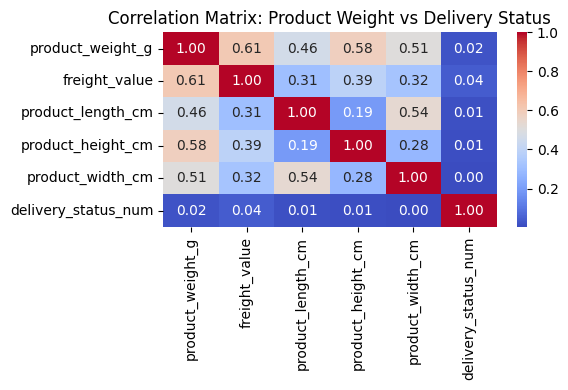

In [89]:
corr_matrix = df_corr.corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Product Weight vs Delivery Status")
plt.tight_layout()
plt.show()

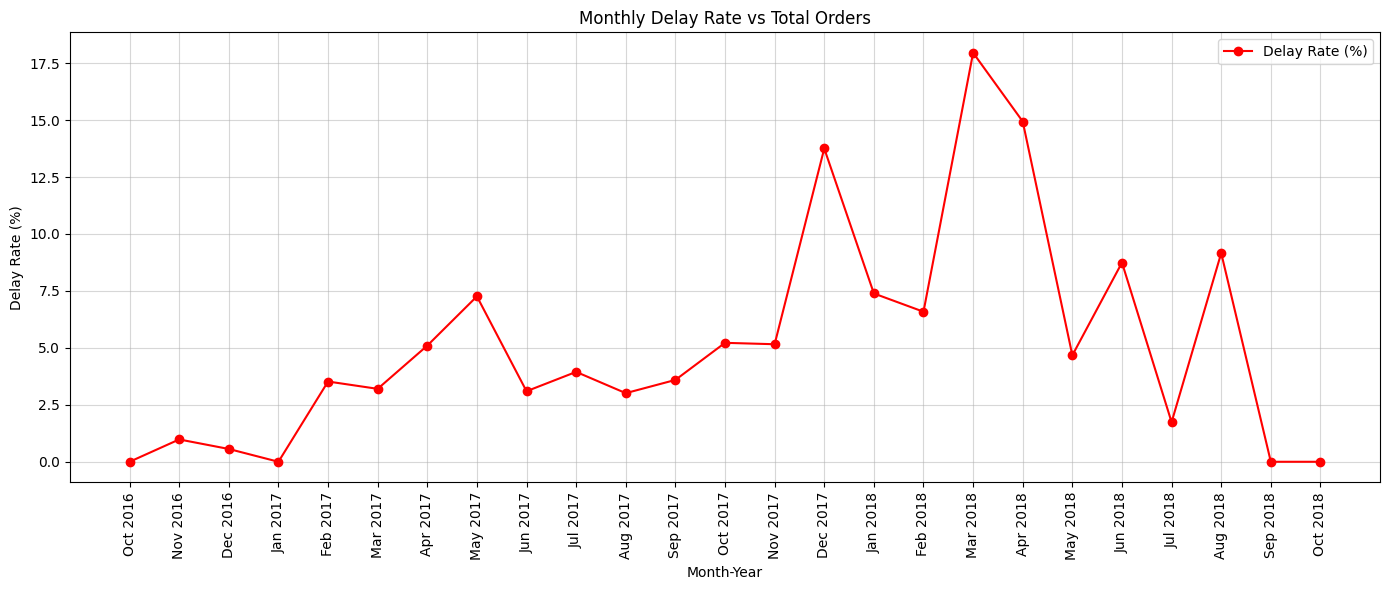

total_orders  delayed_orders  delay_rate_% month_year_str
month                                                                
2016-10-01             5             0.0      0.000000       Oct 2016
2016-11-01           204             2.0      0.980392       Nov 2016
2016-12-01           178             1.0      0.561798       Dec 2016
2017-01-01             3             0.0      0.000000       Jan 2017
2017-02-01           369            13.0      3.523035       Feb 2017

In [90]:
import matplotlib.pyplot as plt

# Buat kolom bulan
product_sales['month'] = product_sales['order_estimated_delivery_date'].dt.to_period('M')

# Hitung jumlah order per bulan
monthly_orders = product_sales.groupby('month')['order_id'].count()
monthly_delayed = product_sales[product_sales['delivery_status'] == 'Late'].groupby('month')['order_id'].count()

# Gabungkan ke satu dataframe
delay_trend = pd.DataFrame({
    'total_orders': monthly_orders,
    'delayed_orders': monthly_delayed
}).fillna(0)

# Hitung persentase
delay_trend['delay_rate_%'] = (delay_trend['delayed_orders'] / delay_trend['total_orders']) * 100

# Ubah index jadi timestamp & buat label string "Nov 2017"
delay_trend.index = delay_trend.index.to_timestamp()
delay_trend['month_year_str'] = delay_trend.index.strftime('%b %Y')

# Plot pakai label string
plt.figure(figsize=(14,6))
plt.plot(delay_trend['month_year_str'], delay_trend['delay_rate_%'], marker='o', color='red', label='Delay Rate (%)')
plt.title("Monthly Delay Rate vs Total Orders")
plt.ylabel("Delay Rate (%)")
plt.xlabel("Month-Year")
plt.xticks(rotation=90)
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

delay_trend.head()

##### **AOV**

**Conclusion :**
- The overall **Average Order Value (AOV)** is **206,094**.  
- **Average orders dropped** at the **end of the year**, then showed only a **stagnant rise afterward**.  
- A **small dip** also appeared in **June 2017 and 2018**, forming a possible **seasonal pattern**.

In [91]:
# pastikan ada kolom bulan-tahun
product_delivered['order_purchase_timestamp'] = pd.to_datetime(product_delivered['order_purchase_timestamp'])
product_delivered['month_year'] = product_delivered['order_purchase_timestamp'].dt.to_period('M')

# revenue per order
revenue_per_order = (
    product_delivered
    .groupby(['order_id','month_year'])['payment_value']
    .sum()
    .reset_index()
)
revenue_per_order

C:\Users\mythi\AppData\Local\Temp\ipykernel_23072\1287185471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_delivered['order_purchase_timestamp'] = pd.to_datetime(product_delivered['order_purchase_timestamp'])
C:\Users\mythi\AppData\Local\Temp\ipykernel_23072\1287185471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_delivered['month_year'] = product_delivered['order_purchase_timestamp'].dt.to_period('M')


order_id month_year  payment_value
0      00010242fe8c5a6d1ba2dd792cb16214    2017-09          72.19
1      00018f77f2f0320c557190d7a144bdd3    2017-04         259.83
2      000229ec398224ef6ca0657da4fc703e    2018-01         216.87
3      00024acbcdf0a6daa1e931b038114c75    2018-08          25.78
4      00042b26cf59d7ce69dfabb4e55b4fd9    2017-02         218.04
...                                 ...        ...            ...
96472  fffc94f6ce00a00581880bf54a75a037    2018-04         343.40
96473  fffcd46ef2263f404302a634eb57f7eb    2018-07         386.53
96474  fffce4705a9662cd70adb13d4a31832d    2017-10         116.85
96475  fffe18544ffabc95dfada21779c9644f    2017-08          64.71
96476  fffe41c64501cc87c801fd61db3f6244    2018-06          55.79

[96477 rows x 3 columns]

In [92]:
AOV = revenue_per_order['payment_value'].sum() / revenue_per_order['order_id'].nunique()
print("Average Order Value (AOV):", AOV)

Average Order Value (AOV): 206.09462027218922


**AOV per Month**

In [93]:
# AOV per bulan
aov_month_year = (
    revenue_per_order
    .groupby('month_year')['payment_value']
    .mean()
    .reset_index()
    .rename(columns={'payment_value':'AOV'})
)

aov_month_year

month_year         AOV
0     2016-10  236.248679
1     2016-12   19.620000
2     2017-01  237.709467
3     2017-02  198.384065
4     2017-03  199.830102
5     2017-04  198.458667
6     2017-05  199.391681
7     2017-06  188.269187
8     2017-07  186.065775
9     2017-08  202.864555
10    2017-09  241.877393
11    2017-10  226.087637
12    2017-11  213.985440
13    2017-12  185.677722
14    2018-01  195.765350
15    2018-02  197.718841
16    2018-03  205.907952
17    2018-04  216.119943
18    2018-05  219.518441
19    2018-06  211.005652
20    2018-07  212.689053
21    2018-08  190.732922

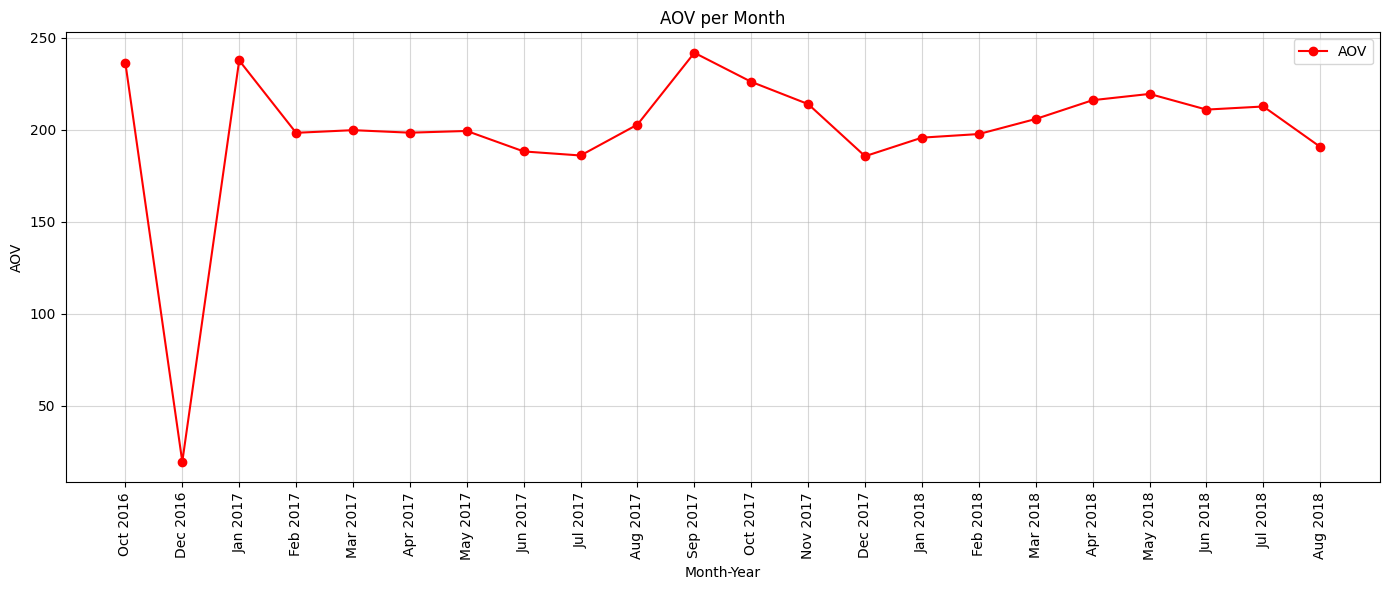

In [94]:
# Ubah index jadi timestamp & buat label string "Nov 2017"S
aov_month_year['month_year'] = pd.to_datetime(aov_month_year['month_year'].astype(str))

# Label string
aov_month_year['month_year_label'] = aov_month_year['month_year'].dt.strftime('%b %Y')
# Plot pakai label string
plt.figure(figsize=(14,6))
plt.plot(aov_month_year['month_year_label'], aov_month_year['AOV'], marker='o', color='red', label='AOV')
plt.title("AOV per Month")
plt.ylabel("AOV")
plt.xlabel("Month-Year")
plt.xticks(rotation=90)
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


##### **RFM**

In [95]:
# Tentukan tanggal analisis (Max Date)
analysis_date = product_sales['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

rfm = product_sales.groupby(by='customer_id').agg({
    'order_purchase_timestamp': lambda x: (analysis_date - x.max()).days,
    'order_id':'count',
    'price':'sum'
}).reset_index()
rfm

customer_id  order_purchase_timestamp  order_id  \
0      00012a2ce6f8dcda20d059ce98491703                       293         1   
1      000161a058600d5901f007fab4c27140                       414         1   
2      0001fd6190edaaf884bcaf3d49edf079                       552         1   
3      0002414f95344307404f0ace7a26f1d5                       383         1   
4      000379cdec625522490c315e70c7a9fb                       154         1   
...                                 ...                       ...       ...   
98660  fffcb937e9dd47a13f05ecb8290f4d3e                       171         1   
98661  fffecc9f79fd8c764f843e9951b11341                       158         3   
98662  fffeda5b6d849fbd39689bb92087f431                       104         1   
98663  ffff42319e9b2d713724ae527742af25                        82         1   
98664  ffffa3172527f765de70084a7e53aae8                       366         2   

        price  
0       89.80  
1       54.90  
2      179.99  
3      149.90  
4       93.00  
...       ...  
98660   78.00  
98661  164.70  
98662   47.90  
98663  199.90  
98664   21.80  

[98665 rows x 4 columns]

In [96]:
rfm.rename(columns={
    'order_purchase_timestamp': 'Recency',
    'order_id': 'Frequency',
    'price': 'Monetary'
}, inplace=True)
rfm

customer_id  Recency  Frequency  Monetary
0      00012a2ce6f8dcda20d059ce98491703      293          1     89.80
1      000161a058600d5901f007fab4c27140      414          1     54.90
2      0001fd6190edaaf884bcaf3d49edf079      552          1    179.99
3      0002414f95344307404f0ace7a26f1d5      383          1    149.90
4      000379cdec625522490c315e70c7a9fb      154          1     93.00
...                                 ...      ...        ...       ...
98660  fffcb937e9dd47a13f05ecb8290f4d3e      171          1     78.00
98661  fffecc9f79fd8c764f843e9951b11341      158          3    164.70
98662  fffeda5b6d849fbd39689bb92087f431      104          1     47.90
98663  ffff42319e9b2d713724ae527742af25       82          1    199.90
98664  ffffa3172527f765de70084a7e53aae8      366          2     21.80

[98665 rows x 4 columns]

In [97]:
rfm['Frequency'].nunique()

25

In [98]:
def rfm_score(df):
    df = df.copy()
    
    # Calculate the rank
    df['r_score'] = df['Recency'].rank(ascending=False)
    df['f_score'] = df['Frequency'].rank(ascending=True)
    df['m_score'] = df['Monetary'].rank(ascending=True)
    
    # normalizing the rank of the customers
    df['r_score_norm'] = (df['r_score']/df['r_score'].max())*100
    df['f_score_norm'] = (df['f_score']/df['f_score'].max())*100
    df['m_score_norm'] = (df['m_score']/df['m_score'].max())*100
    
    # Calculate the RFM score
    df['RFM_score'] = (0.2*df['r_score_norm'] + 0.3*df['f_score_norm'] + \
        0.5*df['m_score_norm']) * 0.05
    df = df.round(2)
    
    return df

In [99]:
rfm_df = rfm_score(rfm)
rfm_df.head()

customer_id  Recency  Frequency  Monetary  r_score  \
0  00012a2ce6f8dcda20d059ce98491703      293          1     89.80  33954.0   
1  000161a058600d5901f007fab4c27140      414          1     54.90  16649.0   
2  0001fd6190edaaf884bcaf3d49edf079      552          1    179.99   2811.5   
3  0002414f95344307404f0ace7a26f1d5      383          1    149.90  20926.0   
4  000379cdec625522490c315e70c7a9fb      154          1     93.00  66362.5   

   f_score  m_score  r_score_norm  f_score_norm  m_score_norm  RFM_score  
0  42870.0  49403.5         34.41         43.45         50.07       2.25  
1  42870.0  30476.5         16.87         43.45         30.89       1.59  
2  42870.0  79160.0          2.85         43.45         80.23       2.69  
3  42870.0  72561.0         21.21         43.45         73.54       2.70  
4  42870.0  51799.5         67.26         43.45         52.50       2.64

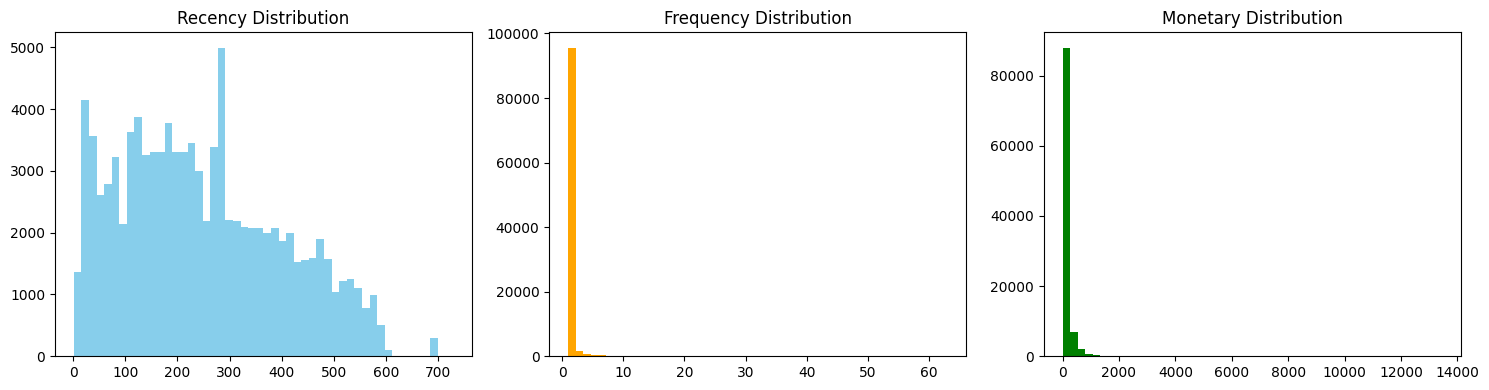

In [100]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(rfm_df['Recency'], bins=50, color='skyblue')
axes[0].set_title('Recency Distribution')

axes[1].hist(rfm_df['Frequency'], bins=50, color='orange')
axes[1].set_title('Frequency Distribution')

axes[2].hist(rfm_df['Monetary'], bins=50, color='green')
axes[2].set_title('Monetary Distribution')

plt.tight_layout()
plt.show()

##### **Distribution Payment Method**

**Conclusion :**
- The payments were made using **five different methods**: **Credit Card, Boleto, Voucher, and Debit Card**.  
- On average, around **70% of customers** used **Credit Card** as their **preferred payment method**.

In [101]:
payment_distribution = product_sales['payment_type'].value_counts()

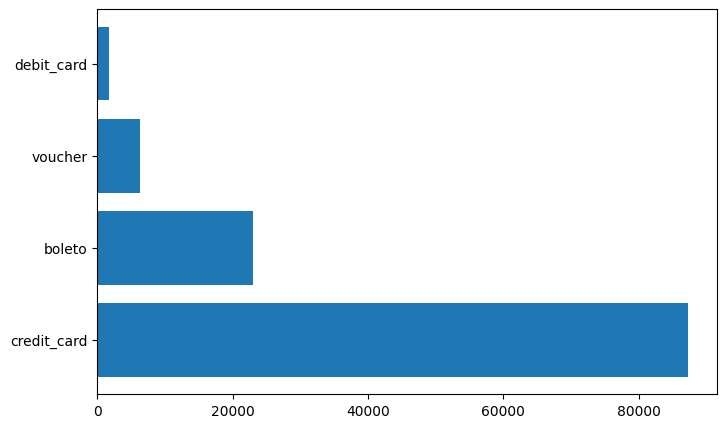

In [102]:
plt.figure(figsize=(8, 5))
plt.barh(payment_distribution.index, payment_distribution.values)
plt.show()

##### **Product Trending**

**Conclusion :**

- In **2018**, there was a noticeable shift in trends from **decoration** and **toys** toward **health**, **beauty**, and **technology**.  
  Consumers increasingly purchased **beleza_saude (health & beauty)** and **informatica_acessorios**, while **cama_mesa_banho (household products)** remained a **consistently popular choice**.  

- **What makes a product trending?**  
  Based on the analysis, products tend to trend or sell well due to the **number of product photos**, which helps **convince buyers** to proceed with checkout.  
  On the other hand, **price does not show a significant relationship** with purchase decisions.  

In [103]:
product_sales_per_id = (
    product_sales
    .groupby(['order_purchase_year', 'product_id', 'product_category_name'])
    .agg(
        total_sold=('order_item_id', 'count'),       # total item terjual
        avg_price=('price', 'mean'),                 # rata-rata harga produk
        avg_photos_qty=('product_photos_qty', 'mean') # rata-rata jumlah foto produk
    )
    .reset_index()
    .sort_values(by='total_sold', ascending=False)
)
product_sales_per_id

order_purchase_year                        product_id  \
30689                 2018  aca2eb7d00ea1a7b8ebd4e68314663af   
10411                 2017  99a4788cb24856965c36a24e339b6058   
4665                  2017  422879e10f46682990de24d770e7f83d   
22089                 2018  3dd2a17168ec895c781a9191c1e95ad7   
23819                 2018  53b36df67ebb7c41585e8d54d6772e08   
...                    ...                               ...   
16128                 2017  f0bdec4f1c899ce1258888fa9d6db7d0   
16127                 2017  f0bc0aed23d451f89495f7650d81e244   
16125                 2017  f0b7332bf477f047972f58a8d70942ce   
16121                 2017  f0a720fc3ab33276bc8bb46595996083   
37388                 2018  fffe9eeff12fcbd74a2f2b007dde0c58   

        product_category_name  total_sold   avg_price  avg_photos_qty  
30689        moveis_decoracao         420   70.352857             6.0  
10411         cama_mesa_banho         388   89.830412             1.0  
4665       ferramentas_jardim         290   56.652759             2.0  
22089  informatica_acessorios         278  149.935971             1.0  
23819      relogios_presentes         261  107.860575             3.0  
...                       ...         ...         ...             ...  
16128         cama_mesa_banho           1  232.000000             1.0  
16127            beleza_saude           1   79.900000             2.0  
16125        fashion_calcados           1   29.900000             6.0  
16121         livros_tecnicos           1  329.000000             1.0  
37388              brinquedos           1  249.990000             3.0  

[37389 rows x 6 columns]

In [104]:
corr = product_sales_per_id[['total_sold', 'avg_price', 'avg_photos_qty']].corr()
corr

total_sold  avg_price  avg_photos_qty
total_sold        1.000000  -0.034160        0.000456
avg_price        -0.034160   1.000000        0.056223
avg_photos_qty    0.000456   0.056223        1.000000

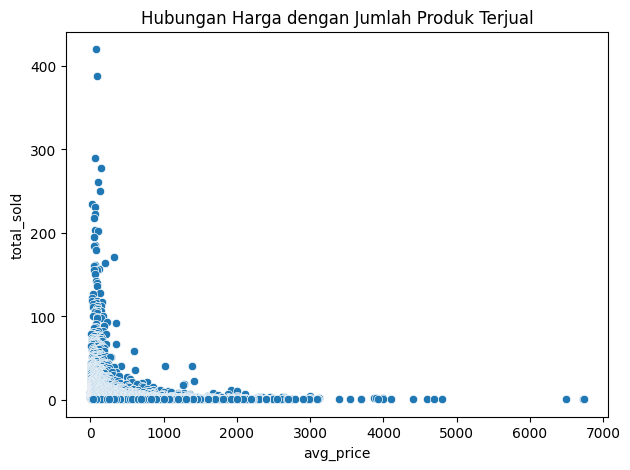

In [105]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=product_sales_per_id, x='avg_price', y='total_sold')
plt.title("Hubungan Harga dengan Jumlah Produk Terjual")
plt.show()

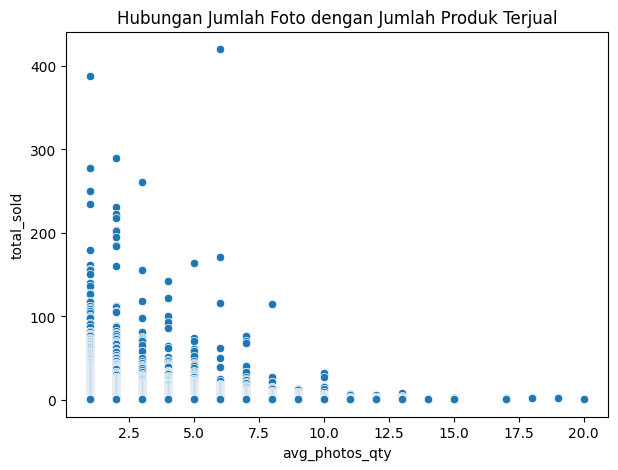

In [106]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=product_sales_per_id, x='avg_photos_qty', y='total_sold')
plt.title("Hubungan Jumlah Foto dengan Jumlah Produk Terjual")
plt.show()

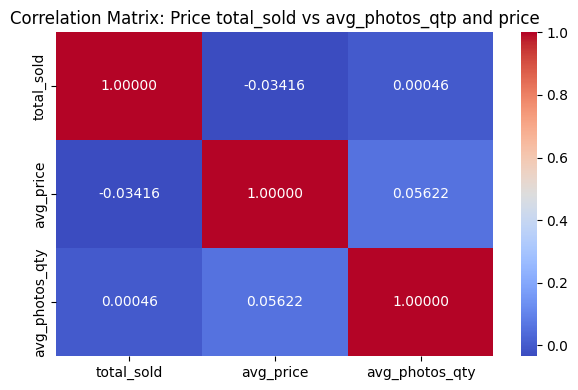

In [107]:
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".5f")
plt.title("Correlation Matrix: Price total_sold vs avg_photos_qtp and price")
plt.tight_layout()
plt.show()

In [108]:
product_sales_per_id_2018 = product_sales_per_id[product_sales_per_id['order_purchase_year'] == 2018]
product_sales_per_id_2018.sort_values(by='total_sold')
product_sales_per_id_2018.head(10)

order_purchase_year                        product_id  \
30689                 2018  aca2eb7d00ea1a7b8ebd4e68314663af   
22089                 2018  3dd2a17168ec895c781a9191c1e95ad7   
23819                 2018  53b36df67ebb7c41585e8d54d6772e08   
33751                 2018  d1c427060a0f73f6b889a5c7c61f2ac4   
22438                 2018  422879e10f46682990de24d770e7f83d   
30195                 2018  a62e25e09e05e6faf31d90c6ec1aa3d1   
21482                 2018  368c6c730842d78016ad823897a372db   
21666                 2018  389d119b48cf3043d311335e499d9c6b   
35275                 2018  e53e557d5a159f5aa2c5e995dfdf244b   
31918                 2018  bb50f2e236e5eea0100680137654686c   

        product_category_name  total_sold   avg_price  avg_photos_qty  
30689        moveis_decoracao         420   70.352857             6.0  
22089  informatica_acessorios         278  149.935971             1.0  
23819      relogios_presentes         261  107.860575             3.0  
33751  informatica_acessorios         250  132.569880             1.0  
22438      ferramentas_jardim         218   52.395963             2.0  
30195      relogios_presentes         202  106.202970             2.0  
21482      ferramentas_jardim         195   51.500000             2.0  
21666      ferramentas_jardim         184   51.791304             2.0  
35275  informatica_acessorios         179   82.720894             1.0  
31918            beleza_saude         171  328.274854             6.0

In [109]:
product_sales_per_id_2018.groupby('product_category_name').agg(
    total_sold = ('total_sold','sum')
).sort_values('total_sold', ascending=False).head(10)

total_sold
product_category_name             
cama_mesa_banho               6206
beleza_saude                  6134
informatica_acessorios        4885
esporte_lazer                 4678
moveis_decoracao              4312
utilidades_domesticas         4259
relogios_presentes            3839
automotivo                    2706
telefonia                     2429
ferramentas_jardim            1960

In [110]:
product_sales_per_id_2017 = product_sales_per_id[product_sales_per_id['order_purchase_year'] == 2017]
product_sales_per_id_2017.sort_values(by='total_sold')
top10_2017 = product_sales_per_id_2017.head(10)
top10_2017

order_purchase_year                        product_id  \
10411                 2017  99a4788cb24856965c36a24e339b6058   
4665                  2017  422879e10f46682990de24d770e7f83d   
1708                  2017  154e7e31ebfa092203795c972e5804a6   
5838                  2017  53759a2ecddad2bb87a079a1f1519f73   
4021                  2017  389d119b48cf3043d311335e499d9c6b   
3876                  2017  368c6c730842d78016ad823897a372db   
8525                  2017  7c1bd920dbdf22470b68bde975dd3ccf   
16197                 2017  f1c7f353075ce59d8a6f3cf58f419c9c   
4712                  2017  42a2c92a0979a949ca4ea89ec5c7b934   
3166                  2017  2b4609f8948be18874494203496bc318   

       product_category_name  total_sold   avg_price  avg_photos_qty  
10411        cama_mesa_banho         388   89.830412             1.0  
4665      ferramentas_jardim         290   56.652759             2.0  
1708            beleza_saude         235   22.151702             1.0  
5838      ferramentas_jardim         231   56.825541             2.0  
4021      ferramentas_jardim         222   56.989144             2.0  
3876      ferramentas_jardim         203   56.938916             2.0  
8525            beleza_saude         185   60.271081             2.0  
16197        cama_mesa_banho         164  194.664390             5.0  
4712   utilidades_domesticas         162   59.523457             1.0  
3166            beleza_saude         156   89.990000             3.0

In [111]:
product_sales_per_id_2017.groupby('product_category_name').agg(
    total_sold = ('total_sold','sum')
).sort_values('total_sold', ascending=False).head(10)

total_sold
product_category_name             
cama_mesa_banho               5776
moveis_decoracao              4439
esporte_lazer                 4308
beleza_saude                  3846
informatica_acessorios        3242
utilidades_domesticas         3109
brinquedos                    2702
ferramentas_jardim            2625
cool_stuff                    2458
relogios_presentes            2369

#### **2.2.2 Customer Analysis**

In [112]:
geolocation.drop_duplicates(subset='geolocation_state', inplace=True)

customers_analysis = pd.merge(orders, customers, on='customer_id', how='inner')
customers_analysis = pd.merge(customers_analysis, order_items, on='order_id', how='inner')
customers_analysis = pd.merge(customers_analysis, reviews, on='order_id', how='inner')
customers_analysis = pd.merge(customers_analysis, geolocation, left_on='customer_state',right_on='geolocation_state' ,how='left')
customers_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113322 entries, 0 to 113321
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113322 non-null  object 
 1   customer_id                    113322 non-null  object 
 2   order_status                   113322 non-null  object 
 3   order_purchase_timestamp       113322 non-null  object 
 4   order_approved_at              113307 non-null  object 
 5   order_delivered_carrier_date   112119 non-null  object 
 6   order_delivered_customer_date  110847 non-null  object 
 7   order_estimated_delivery_date  113322 non-null  object 
 8   customer_unique_id             113322 non-null  object 
 9   customer_zip_code_prefix       113322 non-null  int64  
 10  customer_city                  113322 non-null  object 
 11  customer_state                 113322 non-null  object 
 12  order_item_id                 

##### **Customer Demographic**

**Conclusion :**
- **São Paulo remained the top city** with the highest sales in both 2017 and 2018, followed by **Rio de Janeiro** and **Belo Horizonte**.  
- **All major cities showed growth in 2018**, indicating a consistently expanding customer base across regions.  

In [113]:
customers_analysis['customer_years'] = pd.to_datetime(customers_analysis['order_purchase_timestamp']).dt.year
customers_analysis

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3       949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4       ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                  ...                               ...   
113317  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
113318  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
113319  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
113320  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
113321  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1         delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2         delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3         delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4         delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
...             ...                      ...                  ...   
113317    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
113318    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
113319    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
113320    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
113321    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2018-07-26 14:31:00           2018-08-07 15:27:45   
2               2018-08-08 13:50:00           2018-08-17 18:06:29   
3               2017-11-22 13:39:59           2017-12-02 00:28:42   
4               2018-02-14 19:46:34           2018-02-16 18:17:02   
...                             ...                           ...   
113317          2018-02-07 23:22:42           2018-02-28 17:37:56   
113318          2017-08-28 20:52:26           2017-09-21 11:24:17   
113319          2018-01-12 15:35:03           2018-01-25 23:32:54   
113320          2018-01-12 15:35:03           2018-01-25 23:32:54   
113321          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date                customer_unique_id  \
0                2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
1                2018-08-13 00:00:00  af07308b275d755c9edb36a90c618231   
2                2018-09-04 00:00:00  3a653a41f6f9fc3d2a113cf8398680e8   
3                2017-12-15 00:00:00  7c142cf63193a1473d2e66489a9ae977   
4                2018-02-26 00:00:00  72632f0f9dd73dfee390c9b22eb56dd6   
...                              ...                               ...   
113317           2018-03-02 00:00:00  da62f9e57a76d978d02ab5362c509660   
113318           2017-09-27 00:00:00  737520a9aad80b3fbbdad19b66b37b30   
113319           2018-02-15 00:00:00  5097a5312c8b157bb7be58ae360ef43c   
113320           2018-02-15 00:00:00  5097a5312c8b157bb7be58ae360ef43c   
113321           2018-04-03 00:00:00  60350aa974b26ff12caad89e55993bd6   

        customer_zip_code_prefix            customer_city customer_state  \
0                           3149                sao paulo             SP   
1                          47813                barreiras             BA   
2                          75265               vianopolis             GO   
3                          59296  sao goncalo do amarante             RN   
4                           9195              santo andre             SP   
...                          ...                      ...            ...   
113317          

In [114]:
customers_2k18 = customers_analysis[customers_analysis['customer_years'] == 2018]
customers_2k17 = customers_analysis[customers_analysis['customer_years'] == 2017]

In [115]:
# Top 5 kota 2017
top_2017 = (
    customers_2k17.groupby("geolocation_city")["order_id"]
    .count()
    .reset_index()
    .sort_values("order_id", ascending=False)
    .head(5)
)
top_2017["year"] = 2017

# Top 5 kota 2018
top_2018 = (
    customers_2k18.groupby("geolocation_city")["order_id"]
    .count()
    .reset_index()
    .sort_values("order_id", ascending=False)
    .head(5)
)
top_2018["year"] = 2018

# Gabung jadi satu tabel
top_cities = pd.concat([top_2017, top_2018], ignore_index=True)
print(top_cities)


  geolocation_city  order_id  year
0        sao paulo     20270  2017
1   rio de janeiro      7080  2017
2   belo horizonte      6165  2017
3   nova andradina      3033  2017
4         curitiba      2579  2017
5        sao paulo     27418  2018
6   rio de janeiro      7533  2018
7   belo horizonte      6992  2018
8   nova andradina      3229  2018
9         curitiba      3155  2018


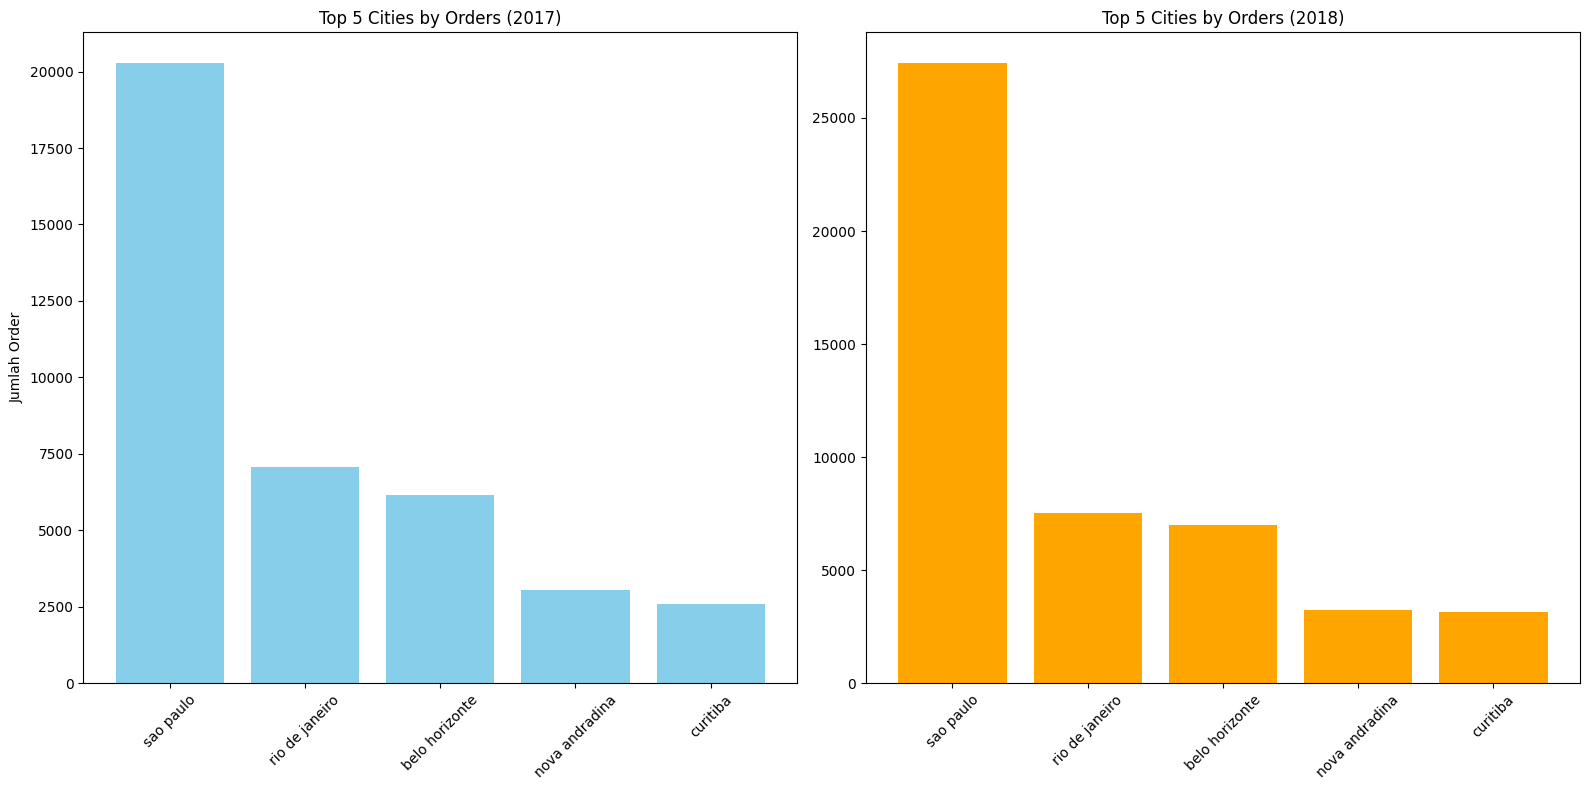

In [116]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))

# Bar chart 2017
axes[0].bar(top_2017["geolocation_city"], top_2017["order_id"], color="skyblue")
axes[0].set_title("Top 5 Cities by Orders (2017)")
axes[0].set_ylabel("Jumlah Order")
axes[0].tick_params(axis='x', rotation=45)

# Bar chart 2018
axes[1].bar(top_2018["geolocation_city"], top_2018["order_id"], color="orange")
axes[1].set_title("Top 5 Cities by Orders (2018)")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

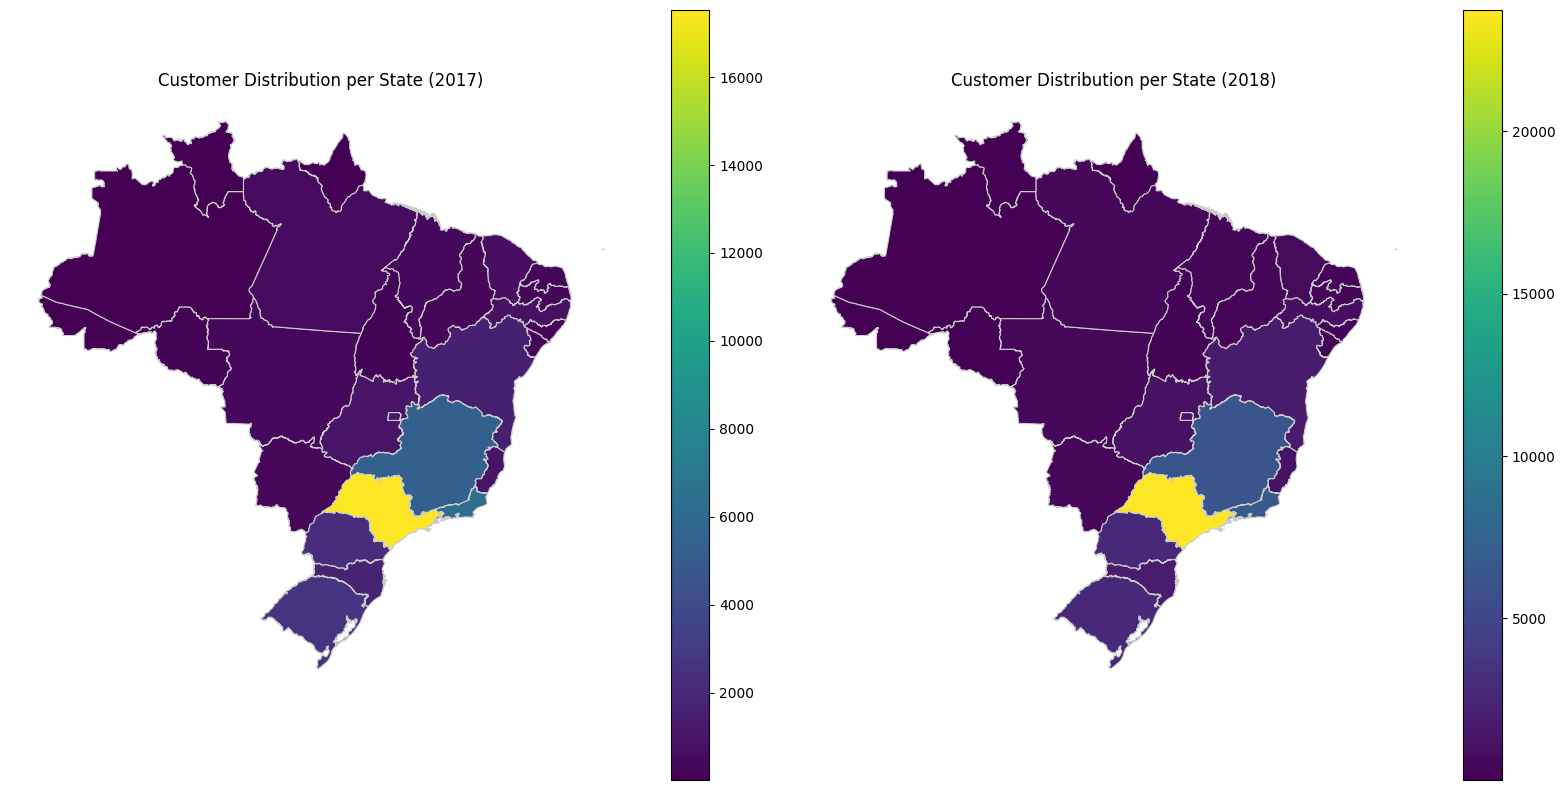

In [117]:
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import io
import json

url = "https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson"
data = requests.get(url).json()

# Convert dict → str → bytes → BytesIO
gdf = gpd.read_file(io.StringIO(json.dumps(data)))

# --- Data Customer 2017 ---
state_counts_2017 = customers_2k17.groupby("customer_state")["customer_id"].nunique().reset_index()
gdf_2017 = gdf.merge(state_counts_2017, left_on="sigla", right_on="customer_state", how="left")

# --- Data Customer 2018 ---
state_counts_2018 = customers_2k18.groupby("customer_state")["customer_id"].nunique().reset_index()
gdf_2018 = gdf.merge(state_counts_2018, left_on="sigla", right_on="customer_state", how="left")

# --- Plot Subplot ---
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Peta 2017
gdf_2017.plot(
    column="customer_id",
    cmap="viridis",
    linewidth=0.8,
    ax=axes[0],
    edgecolor="0.8",
    legend=True
)
axes[0].set_title("Customer Distribution per State (2017)")
axes[0].axis("off")

# Peta 2018
gdf_2018.plot(
    column="customer_id",
    cmap="viridis",
    linewidth=0.8,
    ax=axes[1],
    edgecolor="0.8",
    legend=True
)
axes[1].set_title("Customer Distribution per State (2018)")
axes[1].axis("off")

plt.tight_layout()
plt.show()


##### **Monthly Order Growth - Top Cities**

**Conclusion :**
- The number of products sold in the **top five regions** shows a **similar pattern**, both during **peak increases** and **lowest declines**.  
- This indicates that **demand fluctuations** are likely influenced by **broader market trends** rather than being specific to a single region.


In [118]:
product_sales['delay_days'] = (
    product_sales['order_delivered_customer_date'] - product_sales['order_estimated_delivery_date']\
).dt.days


product_sales

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
4       0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
...                                  ...                               ...   
118310  e8fd20068b9f7e6ec07068bb7537f781  609b9fb8cad4fe0c7b376f77c8ab76ad   
118311  e8fd20068b9f7e6ec07068bb7537f781  609b9fb8cad4fe0c7b376f77c8ab76ad   
118312  cfa78b997e329a5295b4ee6972c02979  a2f7428f0cafbc8e59f20e1444b67315   
118313  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
118314  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3         delivered      2017-08-15 18:29:31  2017-08-15 20:05:16   
4         delivered      2017-08-02 18:24:47  2017-08-02 18:43:15   
...             ...                      ...                  ...   
118310    delivered      2017-08-10 21:21:07  2017-08-10 21:35:26   
118311    delivered      2017-08-10 21:21:07  2017-08-10 21:35:26   
118312    delivered      2017-12-20 09:52:41  2017-12-20 10:09:52   
118313    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
118314    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2017-10-04 19:55:00           2017-10-10 21:25:13   
2               2017-10-04 19:55:00           2017-10-10 21:25:13   
3               2017-08-17 15:28:33           2017-08-18 14:44:43   
4               2017-08-04 17:35:43           2017-08-07 18:30:01   
...                             ...                           ...   
118310          2017-08-18 16:42:51           2017-08-23 15:36:29   
118311          2017-08-18 16:42:51           2017-08-23 15:36:29   
118312          2017-12-20 20:25:25           2018-01-26 15:45:14   
118313          2017-03-10 11:18:03           2017-03-17 15:08:01   
118314          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date  order_item_id  \
0                         2017-10-18              1   
1                         2017-10-18              1   
2                         2017-10-18              1   
3                         2017-08-28              1   
4                         2017-08-15              1   
...                              ...            ...   
118310                    2017-08-31              1   
118311                    2017-08-31              2   
118312                    2018-01-18              1   
118313                    2017-03-28              1   
118314                    2018-04-03              1   

                              product_id                         seller_id  \
0       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
4       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
...                                  ...                               ...   
118310  0df37da38a30a713453b03053d60d3f7  218d46b86c1881d022bce9c68a7d4b15   
118311  0df37da38a30a713453b03053d60d3f7  218d46b86c1881d022bce9c68a7d4b15   
118312  3d2c44374ee42b3003a470f3e937a2ea  ce248b21cb2adc36282ede306b7660e5

In [119]:
customers_analysis['order_purchase_timestamp'] = pd.to_datetime(customers_analysis['order_purchase_timestamp'])

customers_analysis['month'] = customers_analysis['order_purchase_timestamp'].dt.to_period('M')

top_city = ['rio de janeiro', 'belo horizonte', 'nova andradina', 'curitiba']

top_5_city = customers_analysis[customers_analysis['geolocation_city'].isin(top_city)]

monthly_growth = (
    top_5_city
    .groupby(['month', 'geolocation_city'])['order_id']
    .count()
    .reset_index()
    .sort_index()
)

monthly_growth['month_dt'] = monthly_growth['month'].dt.to_timestamp()
monthly_growth['month_label'] = monthly_growth['month_dt'].dt.strftime('%b %Y')


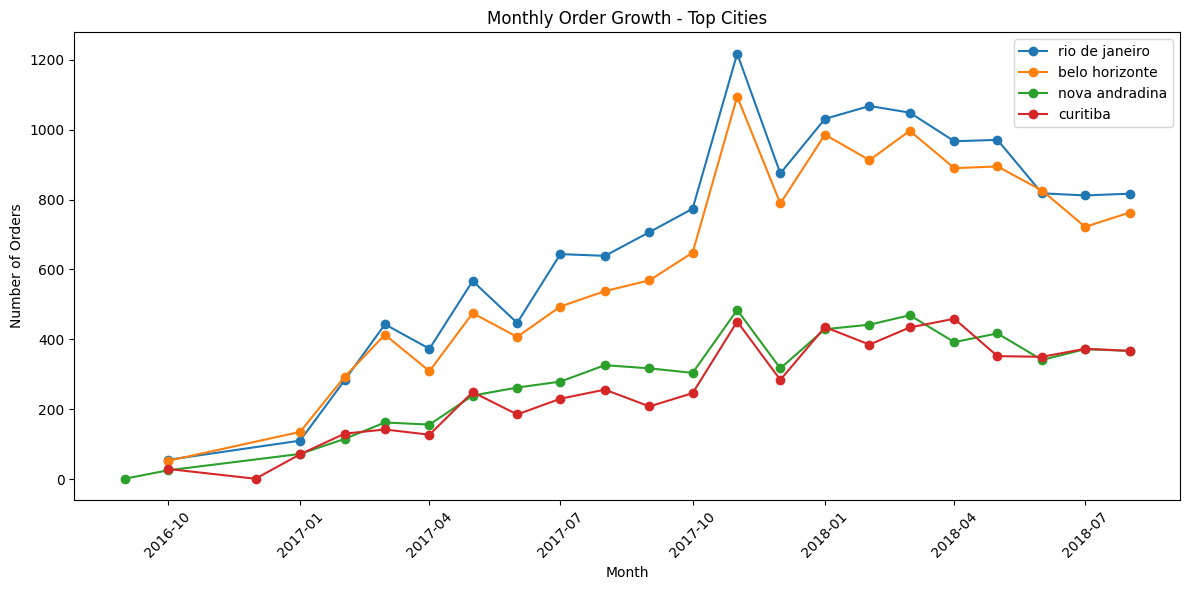

In [120]:
plt.figure(figsize=(12, 6))

for city in top_city:
    city_data = monthly_growth[monthly_growth['geolocation_city'] == city]
    plt.plot(city_data['month_dt'], city_data['order_id'], marker='o', label=city)

plt.title("Monthly Order Growth - Top Cities")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)

plt.legend()
plt.tight_layout()
plt.show()


##### **Purchase Frequency per Customer**

**Conclusion :**  
- The **total number of customers** over 3 years is **98,666**.  
- **Repeat customers** account for **10.42%** (≈ **10,280 customers**) of the total.  
- **One-time buyers** dominate with **88,386 customers** (**89.58%**).  
- The number of **new customers** shows a **steady increase month by month**.  


In [121]:
cust_trx = customers_analysis.groupby("customer_id").agg({
    'order_id':'count'
})

cust_trx

order_id
customer_id                               
00012a2ce6f8dcda20d059ce98491703         1
000161a058600d5901f007fab4c27140         1
0001fd6190edaaf884bcaf3d49edf079         1
0002414f95344307404f0ace7a26f1d5         1
000379cdec625522490c315e70c7a9fb         1
...                                    ...
fffcb937e9dd47a13f05ecb8290f4d3e         1
fffecc9f79fd8c764f843e9951b11341         1
fffeda5b6d849fbd39689bb92087f431         1
ffff42319e9b2d713724ae527742af25         1
ffffa3172527f765de70084a7e53aae8         2

[98666 rows x 1 columns]

In [122]:
count_all_cust = customers_analysis['customer_id'].nunique()
count_all_cust

98666

In [123]:
repeat_customers = cust_trx[cust_trx['order_id'] > 1].shape[0]

prop_repeat = repeat_customers / count_all_cust * 100
print("Customer Repeat Order:", repeat_customers, f"({prop_repeat:.2f}%)")

Customer Repeat Order: 10280 (10.42%)


In [124]:
one_time_customers = cust_trx[cust_trx['order_id'] == 1].shape[0]

prop_one_time = one_time_customers / count_all_cust * 100
print("Customer One-Time Order:", one_time_customers, f"({prop_one_time:.2f}%)")

Customer One-Time Order: 88386 (89.58%)


In [125]:
new_cust_growth = (customers_analysis.groupby(by=['customer_id','order_purchase_timestamp']).agg({
    'order_id':'count'
}).reset_index()
)
new_cust_growth = new_cust_growth[new_cust_growth['order_id'] == 1]
new_cust_growth

customer_id order_purchase_timestamp  order_id
0      00012a2ce6f8dcda20d059ce98491703      2017-11-14 16:08:26         1
1      000161a058600d5901f007fab4c27140      2017-07-16 09:40:32         1
2      0001fd6190edaaf884bcaf3d49edf079      2017-02-28 11:06:43         1
3      0002414f95344307404f0ace7a26f1d5      2017-08-16 13:09:20         1
4      000379cdec625522490c315e70c7a9fb      2018-04-02 13:42:17         1
...                                 ...                      ...       ...
98660  fffb97495f78be80e2759335275df2aa      2018-01-16 14:51:35         1
98661  fffcb937e9dd47a13f05ecb8290f4d3e      2018-03-17 00:55:27         1
98662  fffecc9f79fd8c764f843e9951b11341      2018-03-29 16:59:26         1
98663  fffeda5b6d849fbd39689bb92087f431      2018-05-22 13:36:02         1
98664  ffff42319e9b2d713724ae527742af25      2018-06-13 16:57:05         1

[88386 rows x 3 columns]

**New CUstomer Growth**

In [126]:
new_cust_growth['order_purchase_timestamp'] = pd.to_datetime(new_cust_growth['order_purchase_timestamp'])
new_cust_growth['month_year'] = new_cust_growth['order_purchase_timestamp'].dt.to_period('M')
new_cust_growth


# Ubah jadi format nov-2017
new_cust_growth['month_year'] = new_cust_growth['month_year'].dt.to_timestamp()


new_cust_growth


customer_id order_purchase_timestamp  order_id  \
0      00012a2ce6f8dcda20d059ce98491703      2017-11-14 16:08:26         1   
1      000161a058600d5901f007fab4c27140      2017-07-16 09:40:32         1   
2      0001fd6190edaaf884bcaf3d49edf079      2017-02-28 11:06:43         1   
3      0002414f95344307404f0ace7a26f1d5      2017-08-16 13:09:20         1   
4      000379cdec625522490c315e70c7a9fb      2018-04-02 13:42:17         1   
...                                 ...                      ...       ...   
98660  fffb97495f78be80e2759335275df2aa      2018-01-16 14:51:35         1   
98661  fffcb937e9dd47a13f05ecb8290f4d3e      2018-03-17 00:55:27         1   
98662  fffecc9f79fd8c764f843e9951b11341      2018-03-29 16:59:26         1   
98663  fffeda5b6d849fbd39689bb92087f431      2018-05-22 13:36:02         1   
98664  ffff42319e9b2d713724ae527742af25      2018-06-13 16:57:05         1   

      month_year  
0     2017-11-01  
1     2017-07-01  
2     2017-02-01  
3     2017-08-01  
4     2018-04-01  
...          ...  
98660 2018-01-01  
98661 2018-03-01  
98662 2018-03-01  
98663 2018-05-01  
98664 2018-06-01  

[88386 rows x 4 columns]

In [127]:
new_cust_growth_by_month = new_cust_growth.groupby('month_year').agg(
    total_customer=('customer_id','nunique')
).reset_index()
new_cust_growth_by_month

new_cust_growth_by_month['month_year_label'] = new_cust_growth_by_month['month_year'].dt.strftime('%b %Y')



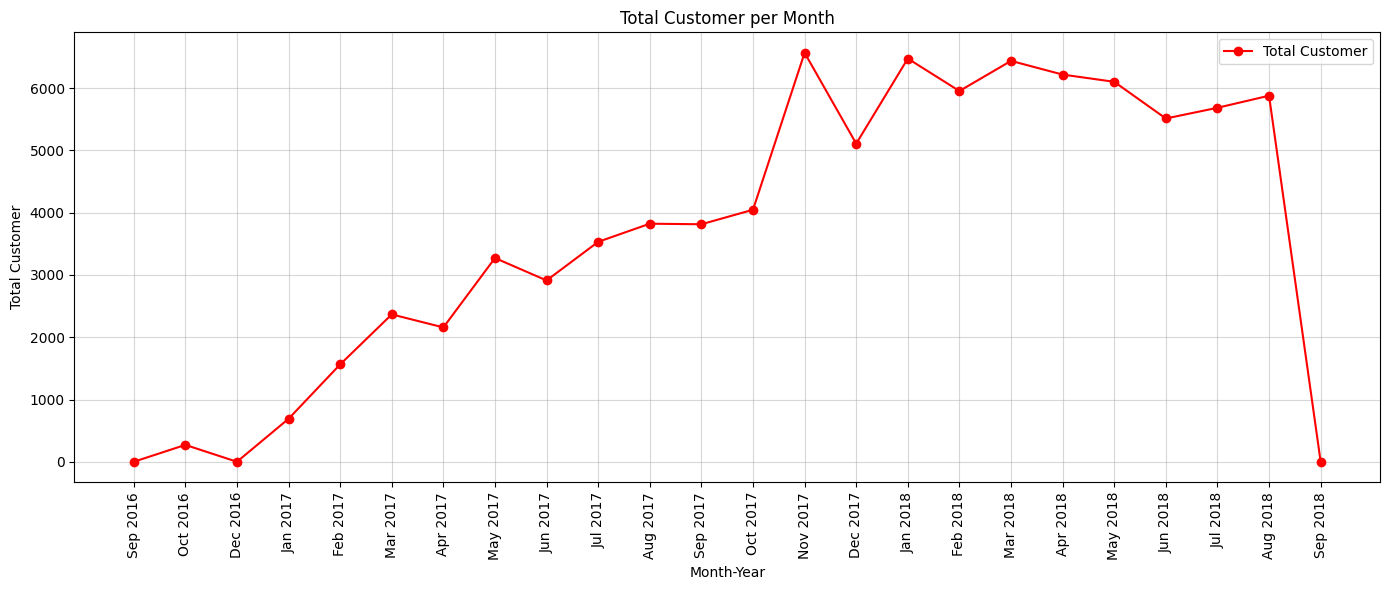

In [128]:
plt.figure(figsize=(14,6))
plt.plot(new_cust_growth_by_month['month_year_label'], 
         new_cust_growth_by_month['total_customer'], 
         marker='o', color='red', label='Total Customer')
plt.title("Total Customer per Month")
plt.ylabel("Total Customer")
plt.xlabel("Month-Year")
plt.xticks(rotation=90)
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


##### **Averange Rating by Month**

**Conclusion :**  
- Product ratings are **dominated by 5-star reviews**.  
- The **average rating per month** shows a **gradual increase over time**.  


In [129]:
customers_analysis['review_score'].value_counts()

review_score
5    63626
4    21381
1    14787
3     9544
2     3984
Name: count, dtype: int64

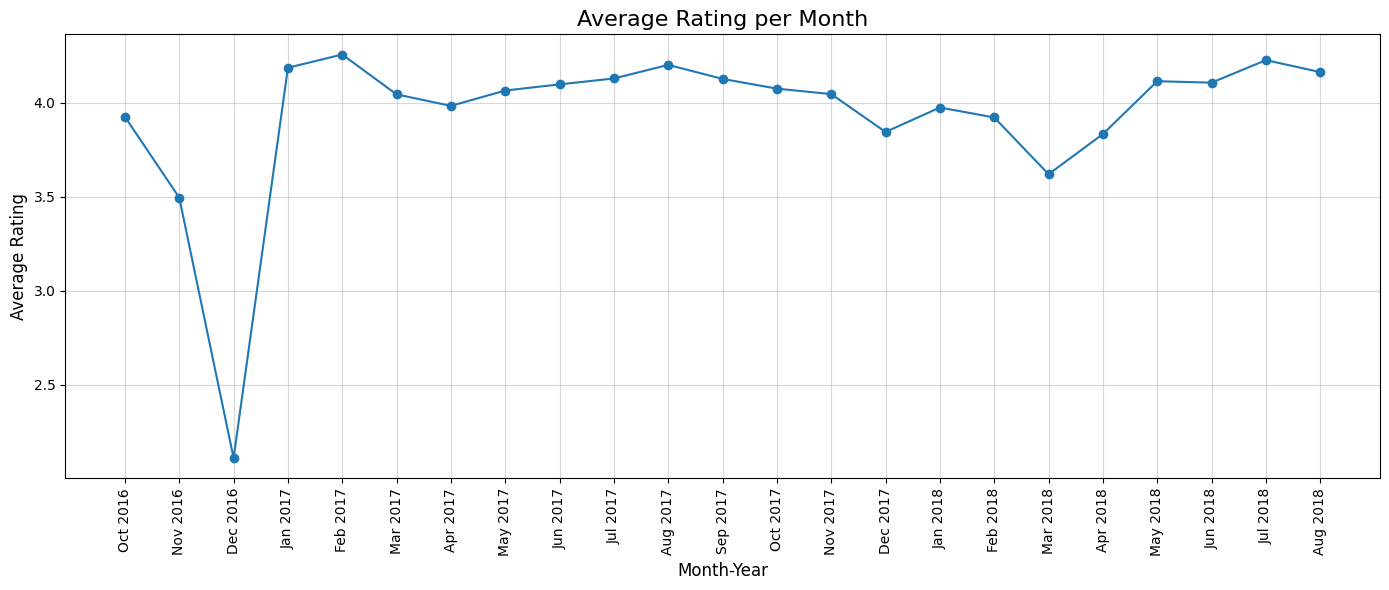

In [130]:
customers_analysis['review_creation_date'] = pd.to_datetime(customers_analysis['review_creation_date'])

customers_analysis['month_year'] = customers_analysis['review_creation_date'].dt.to_period('M')

monthly_rating = (
    customers_analysis.groupby('month_year')['review_score'].mean().reset_index()
)

monthly_rating['month_year'] = monthly_rating['month_year'].dt.to_timestamp()
monthly_rating['month_year_str'] = monthly_rating['month_year'].dt.strftime('%b %Y')

plt.figure(figsize=(14,6))
plt.plot(monthly_rating['month_year_str'], monthly_rating['review_score'], marker='o', linestyle='-')
plt.title("Average Rating per Month", fontsize=16)
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.xticks(rotation=90)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

In [131]:
rating_dist = customers_analysis['review_score'].value_counts()
rating_dist

review_score
5    63626
4    21381
1    14787
3     9544
2     3984
Name: count, dtype: int64

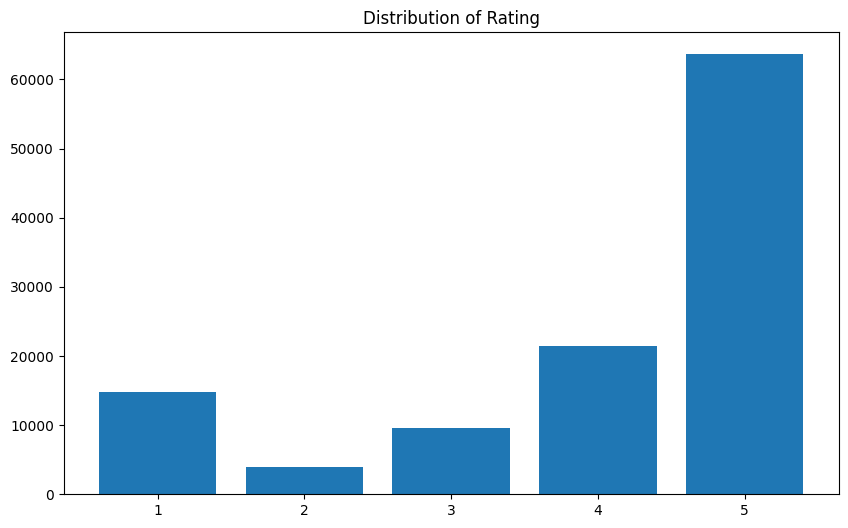

In [132]:
plt.figure(figsize=(10, 6))
plt.bar(rating_dist.index, rating_dist.values)
plt.title('Distribution of Rating')
plt.show()

##### **Produk Review**

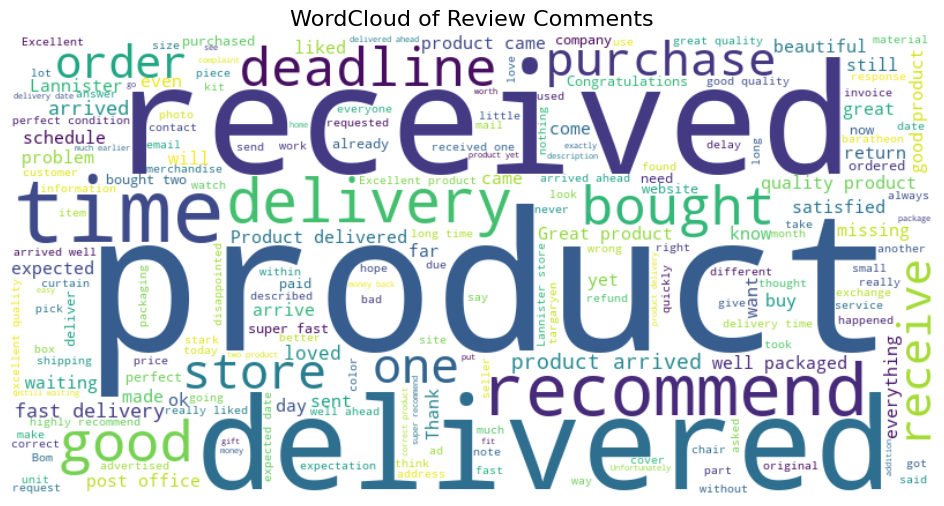

In [133]:
from wordcloud import WordCloud

text = " ".join(str(review) for review in customers_analysis['review_comment_message'].dropna())

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Review Comments", fontsize=16)
plt.show()

In [134]:
review_low_rating = customers_analysis[customers_analysis['review_score'] < 4 ] 
review_low_rating

order_id                       customer_id  \
6       136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
8       76c6e866289321a7c93b82b54852dc33  f54a9f0e6b351c431402b8461ea51999   
10      e6ce16cb79ec1d90b1da9085a6118aeb  494dded5b201313c64ed7f100595b95c   
11      e6ce16cb79ec1d90b1da9085a6118aeb  494dded5b201313c64ed7f100595b95c   
21      203096f03d82e0dffbc41ebc2e2bcfb7  d2b091571da224a1b36412c18bc3bbfe   
...                                  ...                               ...   
113302  38e9133ce29f6bbe35aed9c3863dce01  ad312389a098ceff46ce92c4595c06d0   
113304  d692ef54145c9cb3322ec2e5508aa3f4  82ddfcf9438b0cd1117b55ac33184df8   
113311  cfa78b997e329a5295b4ee6972c02979  a2f7428f0cafbc8e59f20e1444b67315   
113319  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
113320  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   

       order_status order_purchase_timestamp    order_approved_at  \
6          invoiced      2017-04-11 12:22:08  2017-04-13 13:25:17   
8         delivered      2017-01-23 18:29:09  2017-01-25 02:50:47   
10        delivered      2017-05-16 19:41:10  2017-05-16 19:50:18   
11        delivered      2017-05-16 19:41:10  2017-05-16 19:50:18   
21        delivered      2017-09-18 14:31:30  2017-09-19 04:04:09   
...             ...                      ...                  ...   
113302    delivered      2017-10-12 20:54:11  2017-10-14 03:28:24   
113304    delivered      2018-03-21 19:47:18  2018-03-21 20:05:26   
113311    delivered      2017-12-20 09:52:41  2017-12-20 10:09:52   
113319    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
113320    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   

       order_delivered_carrier_date order_delivered_customer_date  \
6                               NaN                           NaN   
8               2017-01-26 14:16:31           2017-02-02 14:08:10   
10              2017-05-18 11:40:40           2017-05-29 11:18:31   
11              2017-05-18 11:40:40           2017-05-29 11:18:31   
21              2017-10-06 17:50:03           2017-10-09 22:23:46   
...                             ...                           ...   
113302          2017-10-17 17:04:42           2017-11-21 17:06:59   
113304          2018-03-22 21:11:58           2018-04-11 00:48:31   
113311          2017-12-20 20:25:25           2018-01-26 15:45:14   
113319          2018-01-12 15:35:03           2018-01-25 23:32:54   
113320          2018-01-12 15:35:03           2018-01-25 23:32:54   

       order_estimated_delivery_date                customer_unique_id  \
6                2017-05-09 00:00:00  36edbb3fb164b1f16485364b6fb04c73   
8                2017-03-06 00:00:00  39382392765b6dc74812866ee5ee92a7   
10               2017-06-07 00:00:00  f2a85dec752b8517b5e58a06ff3cd937   
11               2017-06-07 00:00:00  f2a85dec752b8517b5e58a06ff3cd937   
21               2017-09-28 00:00:00  d699688533772c15a061e8ce81cb56df   
...                              ...                               ...   
113302           2017-10-31 00:00:00  a3983b8b6b679c9f645e6ef9517ac98d   
113304           2018-04-09 00:00:00  397cd1affbb66fa8f76e8ac24685440a   
113311           2018-01-18 00:00:00  a49e8e11e850592fe685ae3c64b40eca   
113319           2018-02-15 00:00:00  5097a5312c8b157bb7be58ae360ef43c   
113320           2018-02-15 00:00:00  5097a5312c8b157bb7be58ae360ef43c   

        customer_zip_code_prefix     customer_city customer_state  \
6                          98900        santa rosa             RS   
8                          99655      faxinalzinho             RS   
10                         20780    rio de janeiro             RJ   
11                         20780    rio de janeiro             RJ   
21                          4001         sao paulo             SP   
...                          ...               ...            ...   
113302                     14802        araraquara             SP

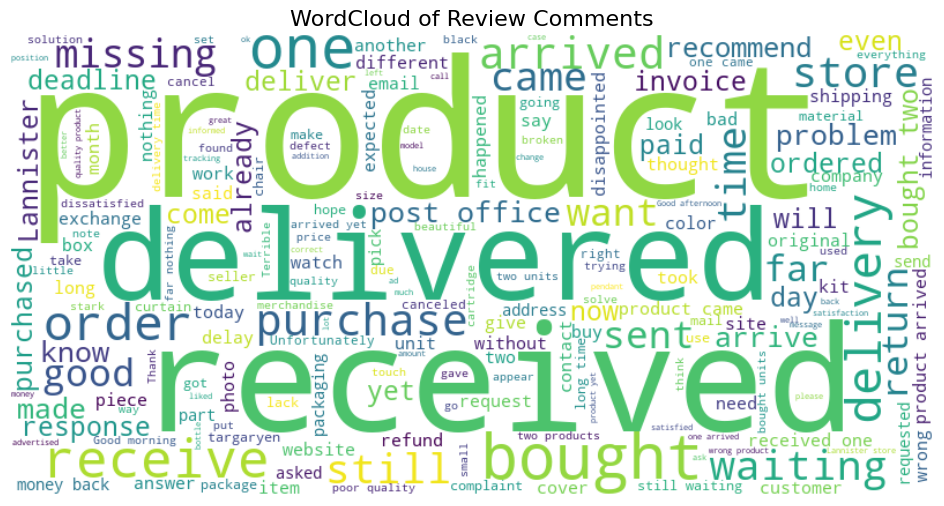

In [135]:

text_low_rating = " ".join(str(review) for review in review_low_rating['review_comment_message'].dropna())

# Buat WordCloud
wordcloud_low_rating = WordCloud(width=800, height=400, background_color='white').generate(text_low_rating)

# Plot
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_low_rating, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud of Review Comments", fontsize=16)
plt.show()

##### **Customer Behavior**

**Conclusion :**  
- **Shopping Days:** Customers tend to shop on **Tuesday, Wednesday, Thursday, and Friday**.  
- **Busiest Day:** **Tuesday** consistently stands out as the busiest day over the past two years.  
- **Peak Time:** Most purchases occur in the **afternoon, between 1 PM and 5 PM**.  
- **Peak Dates:** The period from the **1st to the 10th** of each month shows the highest number of purchases.



**Day with Order**

In [136]:

product_sales['order_approved_at'] = pd.to_datetime(product_sales['order_approved_at'])

product_sales['order_approved_day_name'] = product_sales['order_approved_at'].dt.day_name()
product_sales['order_approved_year_name'] = product_sales['order_approved_at'].dt.year

filtered_df = product_sales[product_sales['order_status'].isin(['invoiced', 'delivered'])]


order_by_day = (
    filtered_df.groupby(['order_approved_year_name', 'order_approved_day_name'])['order_id']
    .count()
    .reset_index()
)

top3_days_per_year = order_by_day.groupby('order_approved_year_name').apply(lambda x: x.nlargest(3, 'order_id')).reset_index(drop=True)

top3_days_per_year



order_approved_year_name order_approved_day_name  order_id
0                    2016.0                Thursday       121
1                    2016.0                  Friday        64
2                    2016.0                  Monday        60
3                    2017.0                 Tuesday      9761
4                    2017.0               Wednesday      8458
5                    2017.0                  Friday      8092
6                    2018.0                 Tuesday     12513
7                    2018.0                Thursday     10306
8                    2018.0               Wednesday      9969

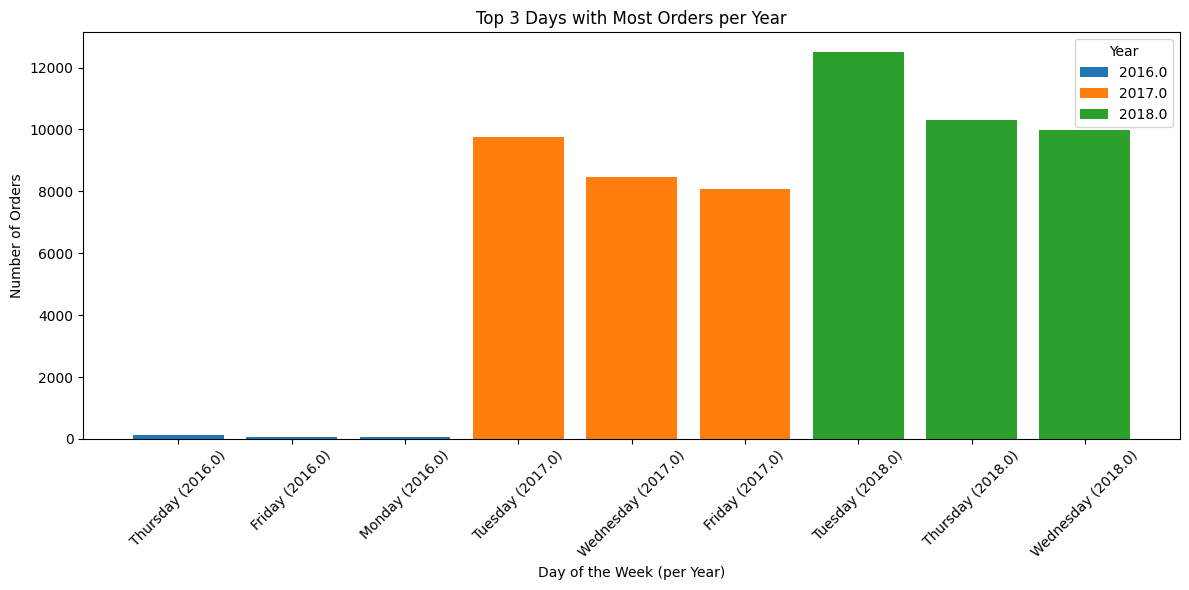

In [137]:
plt.figure(figsize=(12,6))

# Bikin grouped bar chart
for year in top3_days_per_year['order_approved_year_name'].unique():
    data = top3_days_per_year[top3_days_per_year['order_approved_year_name'] == year]
    plt.bar(
        data['order_approved_day_name'] + " (" + data['order_approved_year_name'].astype(str) + ")",
        data['order_id'],
        label=str(year)
    )

plt.xticks(rotation=45)
plt.title("Top 3 Days with Most Orders per Year")
plt.xlabel("Day of the Week (per Year)")
plt.ylabel("Number of Orders")
plt.legend(title="Year")
plt.tight_layout()
plt.show()

**Order by Hour**

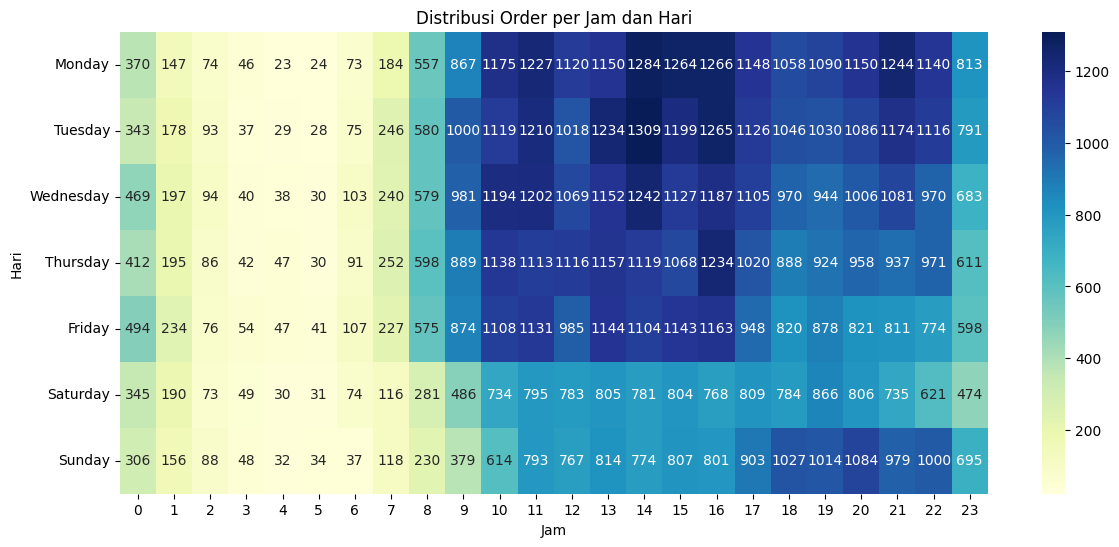

In [138]:
customers_analysis['order_purchase_timestamp'] = pd.to_datetime(customers_analysis['order_purchase_timestamp'])

# ambil hari dan jam
customers_analysis['day_of_week'] = customers_analysis['order_purchase_timestamp'].dt.day_name()
customers_analysis['hour'] = customers_analysis['order_purchase_timestamp'].dt.hour

# pivot table: jumlah order per hari & jam
heatmap_data = (
    customers_analysis
    .groupby(['day_of_week', 'hour'])['order_id']
    .count()
    .reset_index()
    .pivot(index='day_of_week', columns='hour', values='order_id')
)

# urutkan hari biar rapi (Senin-Minggu)
order_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
heatmap_data = heatmap_data.reindex(order_days)

# plot heatmap
plt.figure(figsize=(14,6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Distribusi Order per Jam dan Hari")
plt.xlabel("Jam")
plt.ylabel("Hari")
plt.show()

In [139]:
customers_analysis

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3       949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4       ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                  ...                               ...   
113317  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
113318  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
113319  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
113320  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
113321  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1         delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2         delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3         delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4         delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
...             ...                      ...                  ...   
113317    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
113318    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
113319    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
113320    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
113321    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2018-07-26 14:31:00           2018-08-07 15:27:45   
2               2018-08-08 13:50:00           2018-08-17 18:06:29   
3               2017-11-22 13:39:59           2017-12-02 00:28:42   
4               2018-02-14 19:46:34           2018-02-16 18:17:02   
...                             ...                           ...   
113317          2018-02-07 23:22:42           2018-02-28 17:37:56   
113318          2017-08-28 20:52:26           2017-09-21 11:24:17   
113319          2018-01-12 15:35:03           2018-01-25 23:32:54   
113320          2018-01-12 15:35:03           2018-01-25 23:32:54   
113321          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date                customer_unique_id  \
0                2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
1                2018-08-13 00:00:00  af07308b275d755c9edb36a90c618231   
2                2018-09-04 00:00:00  3a653a41f6f9fc3d2a113cf8398680e8   
3                2017-12-15 00:00:00  7c142cf63193a1473d2e66489a9ae977   
4                2018-02-26 00:00:00  72632f0f9dd73dfee390c9b22eb56dd6   
...                              ...                               ...   
113317           2018-03-02 00:00:00  da62f9e57a76d978d02ab5362c509660   
113318           2017-09-27 00:00:00  737520a9aad80b3fbbdad19b66b37b30   
113319           2018-02-15 00:00:00  5097a5312c8b157bb7be58ae360ef43c   
113320           2018-02-15 00:00:00  5097a5312c8b157bb7be58ae360ef43c   
113321           2018-04-03 00:00:00  60350aa974b26ff12caad89e55993bd6   

        customer_zip_code_prefix            customer_city customer_state  \
0                           3149                sao paulo             SP   
1                          47813                barreiras             BA   
2                          75265               vianopolis             GO   
3                          59296  sao goncalo do amarante             RN   
4                           9195              santo andre             SP   
...                          ...                      ...            ...   
113317          

**Order by Date**

In [140]:
customers_analysis['date'] = customers_analysis['order_purchase_timestamp'].dt.day
customers_analysis['month'] = customers_analysis['order_purchase_timestamp'].dt.month
 
buy_2018 = customers_analysis[customers_analysis['customer_years'] == 2018]

heatmap_day = (
    buy_2018.groupby(by=['month','date'])['order_id']
    .count()
    .reset_index()
    .pivot(index='month', columns='date', values='order_id')
    .fillna(0)
)
heatmap_day = heatmap_day.astype(int)

heatmap_day

date    1    2    3    4    5    6    7    8    9    10   11   12   13   14  \
month                                                                         
1       81  233  247  280  249  258  220  335  274  317  306  292  243  258   
2      269  257  210  225  316  302  286  258  233  198  189  252  268  354   
3      319  308  234  254  317  308  290  276  230  214  239  261  270  238   
4      232  332  279  288  298  213  185  207  291  232  310  300  242  173   
5      277  340  357  309  221  240  422  379  393  335  284  239  246  413   
6      211  158  218  258  240  278  251  234  193  224  338  289  305  237   
7      186  218  239  292  221  130  101  147  158  151  145  128  190  163   
8      347  336  347  274  312  430  431  360  322  268  216  227  321  342   
9        0    0    1    0    0    0    0    0    0    0    0    0    0    0   

date    15   16   17   18   19   20   21   22   23   24   25   26   27   28  \
month                                                                         
1      340  364  300  278  265  209  213  356  302  273  267  266  176  168   
2      320  247  225  236  296  317  315  370  268  213  276  335  376  364   
3      332  293  191  234  367  352  316  296  256  189  226  320  289  242   
4      264  320  312  315  357  229  169  233  330  311  321  294  285  191   
5      423  407  257  280  169  192  239  232  150  130  128  116  112  170   
6      209  177  175  279  261  251  264  206  172  218  281  292  243  284   
7      167  265  245  347  292  287  209  244  347  304  327  286  216  210   
8      317  354  290  206  226  283  258  216  161  117   75   82   71   45   
9        0    0    0    0    0    0    0    0    0    0    0    0    0    0   

date    29   30   31  
month                 
1      289  316  288  
2        0    0    0  
3      224  185  195  
4      189  285    0  
5      173  155  147  
6      199  139    0  
7      211  312  377  
8       16    0    0  
9        0    0    0

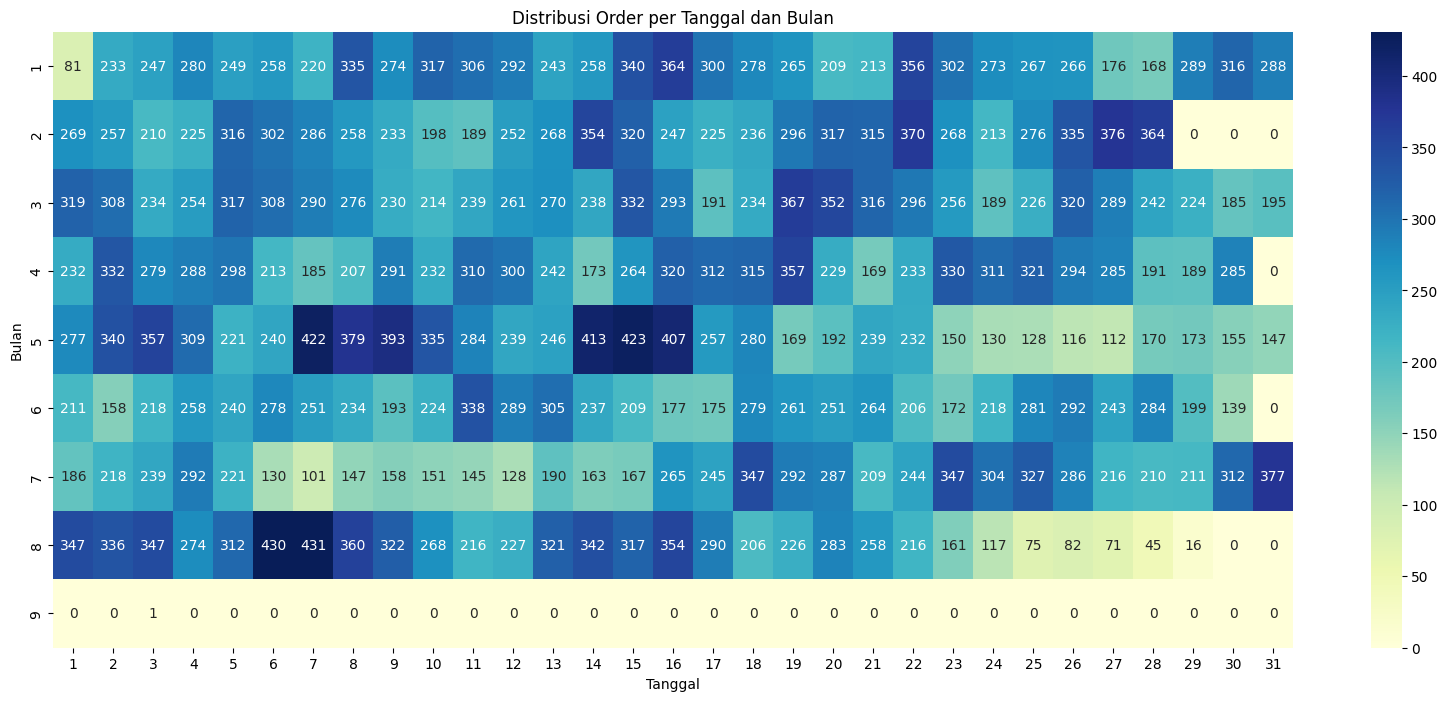

In [141]:
plt.figure(figsize=(20,8))
sns.heatmap(heatmap_day, cmap="YlGnBu", annot=True, fmt="d")
plt.title("Distribusi Order per Tanggal dan Bulan")
plt.xlabel("Tanggal")
plt.ylabel("Bulan")
plt.show()

In [142]:
buy_2018

order_id                       customer_id  \
1       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
4       ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
13      82566a660a982b15fb86e904c8d32918  d3e3b74c766bc6214e0c830b17ee2341   
14      5ff96c15d0b717ac6ad1f3d77225a350  19402a48fe860416adf93348aba37740   
...                                  ...                               ...   
113309  c81f74e50f0496fa39716cc77cacd460  7b270ebc87c25c8404348c10ff80a80e   
113317  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
113319  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
113320  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
113321  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_at  \
1         delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2         delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
4         delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
13        delivered      2018-06-07 10:06:19  2018-06-09 03:13:12   
14        delivered      2018-07-25 17:44:10  2018-07-25 17:55:14   
...             ...                      ...                  ...   
113309    delivered      2018-03-04 22:48:38  2018-03-04 23:09:22   
113317    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
113319    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
113320    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
113321    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
1               2018-07-26 14:31:00           2018-08-07 15:27:45   
2               2018-08-08 13:50:00           2018-08-17 18:06:29   
4               2018-02-14 19:46:34           2018-02-16 18:17:02   
13              2018-06-11 13:29:00           2018-06-19 12:05:52   
14              2018-07-26 13:16:00           2018-07-30 15:52:25   
...                             ...                           ...   
113309          2018-03-05 16:15:04           2018-03-13 18:54:32   
113317          2018-02-07 23:22:42           2018-02-28 17:37:56   
113319          2018-01-12 15:35:03           2018-01-25 23:32:54   
113320          2018-01-12 15:35:03           2018-01-25 23:32:54   
113321          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date                customer_unique_id  \
1                2018-08-13 00:00:00  af07308b275d755c9edb36a90c618231   
2                2018-09-04 00:00:00  3a653a41f6f9fc3d2a113cf8398680e8   
4                2018-02-26 00:00:00  72632f0f9dd73dfee390c9b22eb56dd6   
13               2018-07-18 00:00:00  e97109680b052ee858d93a539597bba7   
14               2018-08-08 00:00:00  e2dfa3127fedbbca9707b36304996dab   
...                              ...                               ...   
113309           2018-03-26 00:00:00  324a22205906aa2612a33e63c00ca8bb   
113317           2018-03-02 00:00:00  da62f9e57a76d978d02ab5362c509660   
113319           2018-02-15 00:00:00  5097a5312c8b157bb7be58ae360ef43c   
113320           2018-02-15 00:00:00  5097a5312c8b157bb7be58ae360ef43c   
113321           2018-04-03 00:00:00  60350aa974b26ff12caad89e55993bd6   

        customer_zip_code_prefix   customer_city customer_state  \
1                          47813       barreiras             BA   
2                          75265      vianopolis             GO   
4                           9195     santo andre             SP   
13                         35400      ouro preto             MG   
14                          4812       sao paulo             SP   
...                          ...             ...            ...   
113309                     31130  belo horizonte             MG   
113317      

In [143]:
date_buyer = (buy_2018.groupby(by=['date'])['order_id'].count())
date_buyer

date
1     1922
2     2182
3     2132
4     2180
5     2174
6     2159
7     2186
8     2196
9     2094
10    1939
11    2027
12    1988
13    2085
14    2178
15    2372
16    2427
17    1995
18    2175
19    2233
20    2120
21    1983
22    2153
23    1986
24    1755
25    1901
26    1991
27    1768
28    1674
29    1301
30    1392
31    1007
Name: order_id, dtype: int64

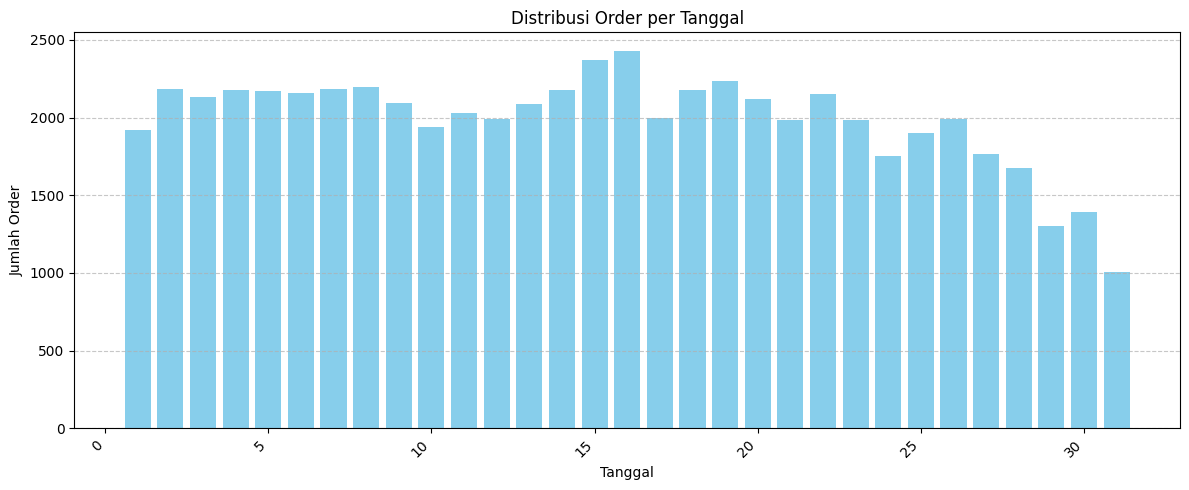

In [144]:
plt.figure(figsize=(12, 5))  
plt.bar(date_buyer.index, date_buyer.values, color='skyblue')
plt.xticks(rotation=45, ha='right')  
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Order")
plt.title("Distribusi Order per Tanggal")

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### **2.2.3 Seller Analysis**

In [145]:
sellers

seller_id  seller_zip_code_prefix  \
0     3442f8959a84dea7ee197c632cb2df15                   13023   
1     d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2     ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3     c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4     51a04a8a6bdcb23deccc82b0b80742cf                   12914   
...                                ...                     ...   
3090  98dddbc4601dd4443ca174359b237166                   87111   
3091  f8201cab383e484733266d1906e2fdfa                   88137   
3092  74871d19219c7d518d0090283e03c137                    4650   
3093  e603cf3fec55f8697c9059638d6c8eb5                   96080   
3094  9e25199f6ef7e7c347120ff175652c3b                   12051   

            seller_city seller_state  
0              campinas           SP  
1            mogi guacu           SP  
2        rio de janeiro           RJ  
3             sao paulo           SP  
4     braganca paulista           SP  
...                 ...          ...  
3090            sarandi           PR  
3091            palhoca           SC  
3092          sao paulo           SP  
3093            pelotas           RS  
3094            taubate           SP  

[3095 rows x 4 columns]

In [146]:
geolocation

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                              1037       -23.545621       -46.639292   
22261                          2116       -23.515978       -46.582170   
72852                          4011       -23.578707       -46.645779   
404270                        20010       -22.902472       -43.174059   
525441                        29010       -20.319586       -40.329319   
542189                        30001       -19.923989       -43.935706   
668525                        40080       -12.987172       -38.522682   
704570                        49010       -10.910515       -37.052401   
708133                        50060        -8.061695       -34.882393   
724566                        57060        -9.590207       -35.766997   
728749                        58035        -7.062455       -34.841780   
739326                        60010        -3.725240       -38.545775   
751000                        64049        -5.070946       -42.788482   
755549                        65020        -2.524427       -44.290479   
763402                        66090        -1.453384       -48.468106   
774255                        68901         0.040253       -51.078577   
775108                        69060        -3.098469       -59.999784   
777226                        69313         2.817595       -60.728699   
779484                        70057       -15.790439       -47.880655   
791619                        72860       -16.053463       -48.030561   
812609                        76804        -8.758144       -63.887973   
816086                        77064       -10.342336       -48.295596   
819662                        78088       -15.629664       -56.017254   
831694                        79093       -20.497667       -54.684091   
840047                        79750       -22.242062       -53.343159   
842126                        80010       -25.435488       -49.270214   
847700                        80630       -26.757371       -48.675738   

             geolocation_city geolocation_state  
0                   sao paulo                SP  
22261               são paulo                RN  
72852               sao paulo                AC  
404270         rio de janeiro                RJ  
525441                vitória                ES  
542189         belo horizonte                MG  
668525               salvador                BA  
704570                aracaju                SE  
708133                 recife                PE  
724566                 maceio                AL  
728749            joao pessoa                PB  
739326              fortaleza                CE  
751000               teresina                PI  
755549               sao luis                MA  
763402                  belem                PA  
774255                 macapa                AP  
775108                 manaus                AM  
777226              boa vista                RR  
779484               brasilia                DF  
791619              novo gama                GO  
812609            porto velho                RO  
816086                 palmas                TO  
819662                 cuiabá                MT  
831694           campo grande                MS  
840047         nova andradina                RS  
842126               curitiba                PR  
847700  balneario de picarras                SC

In [147]:
seller_analysis = pd.merge(orders, order_items, on='order_id', how='inner')
seller_analysis = pd.merge(seller_analysis, products, on='product_id', how='inner')
seller_analysis = pd.merge(seller_analysis, sellers, on='seller_id', how='inner')
seller_analysis = pd.merge(seller_analysis, geolocation, left_on='seller_state', right_on='geolocation_state', how='left')
seller_analysis

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
2       0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
3       bfc39df4f36c3693ff3b63fcbea9e90a  53904ddbea91e1e92b2b3f1d09a7af86   
4       8736140c61ea584cb4250074756d8f3b  ab8844663ae049fda8baf15fc928f47f   
...                                  ...                               ...   
112645  1ab38815794efa43d269d62b98dae815  a0b67404d84a70ef420a7f99ad6b190a   
112646  b159d0ce7cd881052da94fa165617b05  e0c3bc5ce0836b975d6b2a8ce7bb0e3e   
112647  735dce2d574afe8eb87e80a3d6229c48  d531d01affc2c55769f6b9ed410d8d3c   
112648  25d2bfa43663a23586afd12f15b542e7  9d8c06734fde9823ace11a4b5929b5a7   
112649  1565f22aa9452ff278638e87cc895678  56772dfbcbe7df908a284ff0d53adf7d   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1         delivered      2017-08-15 18:29:31  2017-08-15 20:05:16   
2         delivered      2017-08-02 18:24:47  2017-08-02 18:43:15   
3         delivered      2017-10-23 23:26:46  2017-10-25 02:14:11   
4         delivered      2017-08-10 13:35:55  2017-08-10 13:50:09   
...             ...                      ...                  ...   
112645    delivered      2018-07-01 10:23:10  2018-07-05 16:17:52   
112646     canceled      2017-03-11 19:51:36  2017-03-11 19:51:36   
112647    delivered      2018-07-24 09:46:27  2018-07-24 11:24:27   
112648    delivered      2018-05-22 21:13:21  2018-05-22 21:35:40   
112649    delivered      2018-05-15 17:41:00  2018-05-16 03:35:29   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2017-08-17 15:28:33           2017-08-18 14:44:43   
2               2017-08-04 17:35:43           2017-08-07 18:30:01   
3               2017-10-27 16:48:46           2017-11-07 18:04:59   
4               2017-08-11 13:52:35           2017-08-16 19:03:36   
...                             ...                           ...   
112645          2018-07-04 14:34:00           2018-07-09 15:06:57   
112646                          NaN                           NaN   
112647          2018-07-24 15:14:00           2018-08-02 22:47:35   
112648          2018-05-24 12:28:00           2018-06-12 23:11:29   
112649          2018-05-16 17:20:00           2018-05-21 14:31:41   

       order_estimated_delivery_date  order_item_id  \
0                2017-10-18 00:00:00              1   
1                2017-08-28 00:00:00              1   
2                2017-08-15 00:00:00              1   
3                2017-11-13 00:00:00              1   
4                2017-08-23 00:00:00              1   
...                              ...            ...   
112645           2018-07-20 00:00:00              1   
112646           2017-03-30 00:00:00              1   
112647           2018-08-16 00:00:00              1   
112648           2018-06-08 00:00:00              1   
112649           2018-05-29 00:00:00              1   

                              product_id                         seller_id  \
0       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
4       b00a32a0b42fd65efb58a5822009f629  3504c0cb71d7fa48d967e0e4c94d59d9   
...                                  ...                               ...   
112645  31ec3a565e06de4bdf9d2a511b822b4d  babcc0ab201e4c60188427cae51a5b8b   
112646  241a1ffc9cf969b27de6e72301020268  8501d82f68d23148b6d78bb7c4a42037   
112647  1d187e8e7a30417fda31e85679d96f0f  d263fa444c1504a75cbca5cc465f592a

##### **Sellers Overview**

In [148]:
seller_analysis['seller_id'].nunique()

3095

**Product Sold**

In [149]:
seller_analysis['seller_id_short'] = seller_analysis['seller_id'].str[:5]

product_sold = (seller_analysis.groupby(by='seller_id_short').agg(
    sold_product = ('order_id','count')
).reset_index().sort_values(by='sold_product', ascending=False).head(10))
product_sold

seller_id_short  sold_product
1233           65602          2033
879            4a3ca          1987
367            1f50f          1931
2477           cc419          1775
2639           da862          1551
1822           955fe          1499
192            1025f          1428
1533           7c67e          1364
2832           ea848          1203
1503           7a67c          1171

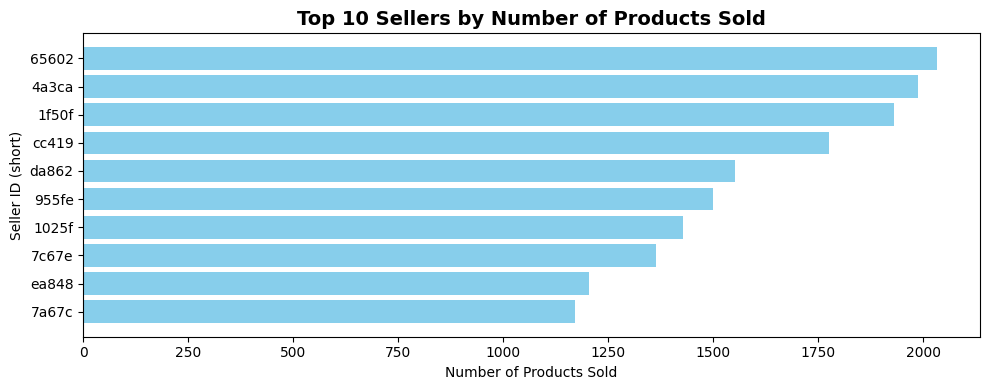

In [150]:
plt.figure(figsize=(10,4))
plt.barh(product_sold['seller_id_short'], product_sold['sold_product'], color='skyblue')
plt.title("Top 10 Sellers by Number of Products Sold", fontsize=14, weight='bold')
plt.xlabel("Number of Products Sold")
plt.ylabel("Seller ID (short)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Seller Revenue**

In [151]:
seller_analysis['revenue'] = seller_analysis['price'] + seller_analysis['freight_value']
seller_analysis['seller_id_short'] = seller_analysis['seller_id'].str[:5]
seller_analysis

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       128e10d95713541c87cd1a2e48201934  a20e8105f23924cd00833fd87daa0831   
2       0e7e841ddf8f8f2de2bad69267ecfbcf  26c7ac168e1433912a51b924fbd34d34   
3       bfc39df4f36c3693ff3b63fcbea9e90a  53904ddbea91e1e92b2b3f1d09a7af86   
4       8736140c61ea584cb4250074756d8f3b  ab8844663ae049fda8baf15fc928f47f   
...                                  ...                               ...   
112645  1ab38815794efa43d269d62b98dae815  a0b67404d84a70ef420a7f99ad6b190a   
112646  b159d0ce7cd881052da94fa165617b05  e0c3bc5ce0836b975d6b2a8ce7bb0e3e   
112647  735dce2d574afe8eb87e80a3d6229c48  d531d01affc2c55769f6b9ed410d8d3c   
112648  25d2bfa43663a23586afd12f15b542e7  9d8c06734fde9823ace11a4b5929b5a7   
112649  1565f22aa9452ff278638e87cc895678  56772dfbcbe7df908a284ff0d53adf7d   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1         delivered      2017-08-15 18:29:31  2017-08-15 20:05:16   
2         delivered      2017-08-02 18:24:47  2017-08-02 18:43:15   
3         delivered      2017-10-23 23:26:46  2017-10-25 02:14:11   
4         delivered      2017-08-10 13:35:55  2017-08-10 13:50:09   
...             ...                      ...                  ...   
112645    delivered      2018-07-01 10:23:10  2018-07-05 16:17:52   
112646     canceled      2017-03-11 19:51:36  2017-03-11 19:51:36   
112647    delivered      2018-07-24 09:46:27  2018-07-24 11:24:27   
112648    delivered      2018-05-22 21:13:21  2018-05-22 21:35:40   
112649    delivered      2018-05-15 17:41:00  2018-05-16 03:35:29   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2017-08-17 15:28:33           2017-08-18 14:44:43   
2               2017-08-04 17:35:43           2017-08-07 18:30:01   
3               2017-10-27 16:48:46           2017-11-07 18:04:59   
4               2017-08-11 13:52:35           2017-08-16 19:03:36   
...                             ...                           ...   
112645          2018-07-04 14:34:00           2018-07-09 15:06:57   
112646                          NaN                           NaN   
112647          2018-07-24 15:14:00           2018-08-02 22:47:35   
112648          2018-05-24 12:28:00           2018-06-12 23:11:29   
112649          2018-05-16 17:20:00           2018-05-21 14:31:41   

       order_estimated_delivery_date  order_item_id  \
0                2017-10-18 00:00:00              1   
1                2017-08-28 00:00:00              1   
2                2017-08-15 00:00:00              1   
3                2017-11-13 00:00:00              1   
4                2017-08-23 00:00:00              1   
...                              ...            ...   
112645           2018-07-20 00:00:00              1   
112646           2017-03-30 00:00:00              1   
112647           2018-08-16 00:00:00              1   
112648           2018-06-08 00:00:00              1   
112649           2018-05-29 00:00:00              1   

                              product_id                         seller_id  \
0       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
4       b00a32a0b42fd65efb58a5822009f629  3504c0cb71d7fa48d967e0e4c94d59d9   
...                                  ...                               ...   
112645  31ec3a565e06de4bdf9d2a511b822b4d  babcc0ab201e4c60188427cae51a5b8b   
112646  241a1ffc9cf969b27de6e72301020268  8501d82f68d23148b6d78bb7c4a42037   
112647  1d187e8e7a30417fda31e85679d96f0f  d263fa444c1504a75cbca5cc465f592a

In [152]:
seller_revenue = seller_analysis.groupby(by='seller_id_short')['revenue'].sum().reset_index().sort_values('revenue', ascending=False).head(10)
seller_revenue


seller_id_short    revenue
855            4869f  249640.70
1533           7c67e  239536.44
1011           53243  235856.68
879            4a3ca  235539.96
3020           fa1c1  204084.73
2639           da862  185192.32
1558           7e93a  182754.05
192            1025f  172860.69
1503           7a67c  162648.38
1822           955fe  160602.68

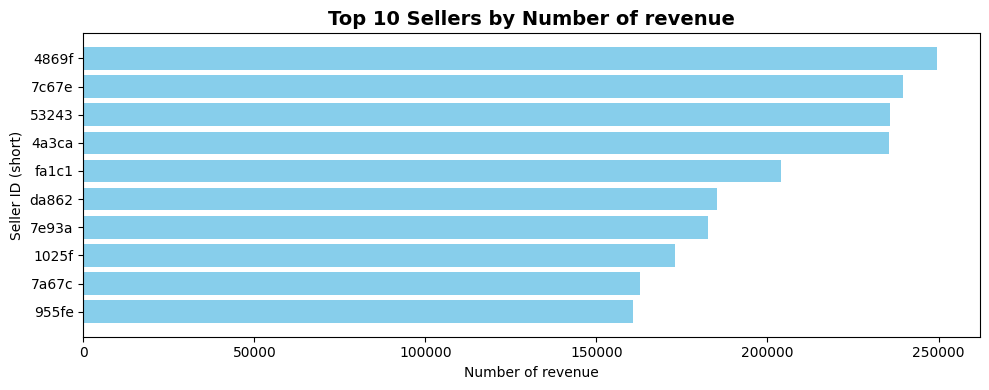

In [153]:
plt.figure(figsize=(10,4))
plt.barh(seller_revenue['seller_id_short'], seller_revenue['revenue'], color='skyblue')
plt.title("Top 10 Sellers by Number of revenue", fontsize=14, weight='bold')
plt.xlabel("Number of revenue")
plt.ylabel("Seller ID (short)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Seller Segment**

In [154]:
import numpy as np


seller_segment_analysis = seller_analysis.groupby('seller_id')['revenue'].sum().reset_index().sort_values(by='revenue', ascending=False)

seller_segment_analysis["seller_segment"] = np.where(
    seller_segment_analysis["revenue"] >= seller_segment_analysis["revenue"].quantile(0.9), "Top sellers", (np.where(
        seller_segment_analysis["revenue"] >= seller_segment_analysis["revenue"].quantile(0.75), "High value sellers", (np.where(
            seller_segment_analysis["revenue"] >= seller_segment_analysis["revenue"].quantile(0.25), "Medium value sellers", "Low value customers"
        ))
    ))
)

seller_segment_analysis[['seller_id', 'revenue','seller_segment']].head()

seller_id    revenue seller_segment
857   4869f7a5dfa277a7dca6462dcf3b52b2  249640.70    Top sellers
1535  7c67e1448b00f6e969d365cea6b010ab  239536.44    Top sellers
1013  53243585a1d6dc2643021fd1853d8905  235856.68    Top sellers
881   4a3ca9315b744ce9f8e9374361493884  235539.96    Top sellers
3024  fa1c13f2614d7b5c4749cbc52fecda94  204084.73    Top sellers

In [155]:
seller_segment = seller_segment_analysis['seller_segment'].value_counts()
seller_segment

seller_segment
Medium value sellers    1547
Low value customers      774
High value sellers       464
Top sellers              310
Name: count, dtype: int64

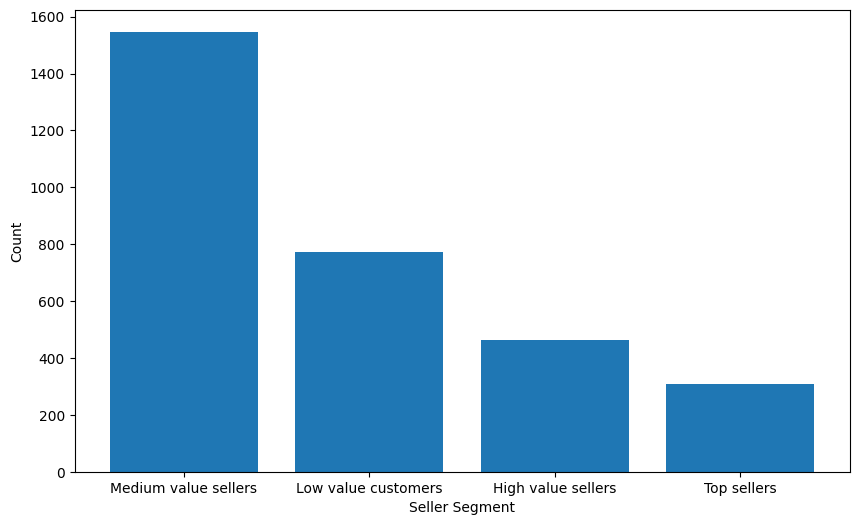

In [156]:
plt.figure(figsize=(10, 6))
plt.bar(seller_segment.index, seller_segment.values)
plt.xlabel('Seller Segment')
plt.ylabel('Count')
plt.show()

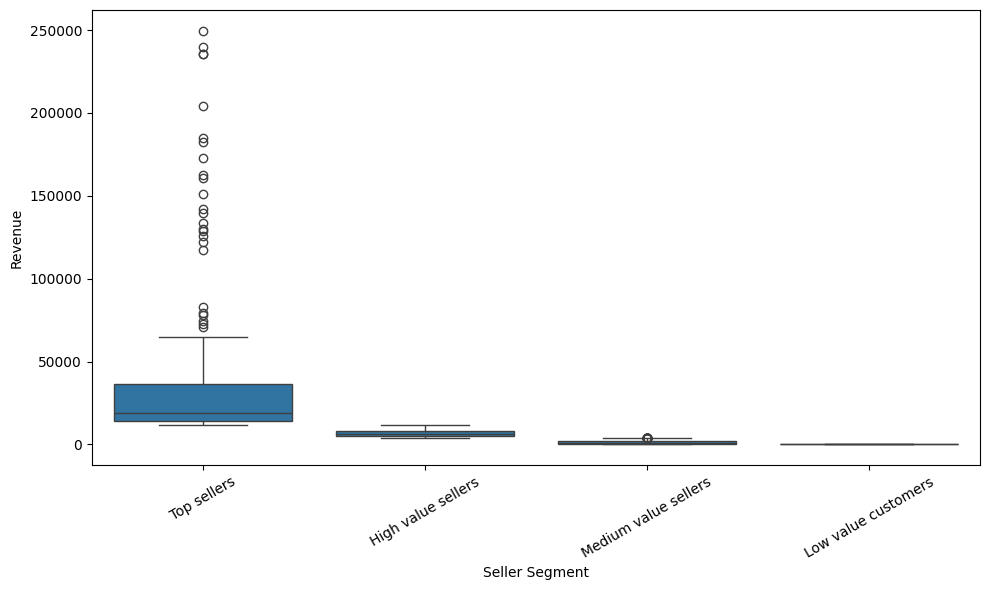

In [157]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=seller_segment_analysis,
            x='seller_segment',
            y='revenue')
plt.xlabel("Seller Segment")
plt.ylabel("Revenue")
plt.xticks(rotation=30) 
plt.tight_layout()
plt.show()

## **3. Data Preprocessing**

**Customer Segmentation**

In [160]:
df_customer_segment_ml = pd.merge(orders, order_items, on='order_id',how='inner')
df_customer_segment_ml = pd.merge(df_customer_segment_ml, customers, on='customer_id', how='inner')
df_customer_segment_ml

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3       949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4       ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                  ...                               ...   
112645  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
112646  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
112647  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
112648  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
112649  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1         delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2         delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3         delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4         delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
...             ...                      ...                  ...   
112645    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
112646    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
112647    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
112648    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
112649    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2018-07-26 14:31:00           2018-08-07 15:27:45   
2               2018-08-08 13:50:00           2018-08-17 18:06:29   
3               2017-11-22 13:39:59           2017-12-02 00:28:42   
4               2018-02-14 19:46:34           2018-02-16 18:17:02   
...                             ...                           ...   
112645          2018-02-07 23:22:42           2018-02-28 17:37:56   
112646          2017-08-28 20:52:26           2017-09-21 11:24:17   
112647          2018-01-12 15:35:03           2018-01-25 23:32:54   
112648          2018-01-12 15:35:03           2018-01-25 23:32:54   
112649          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date  order_item_id  \
0                2017-10-18 00:00:00              1   
1                2018-08-13 00:00:00              1   
2                2018-09-04 00:00:00              1   
3                2017-12-15 00:00:00              1   
4                2018-02-26 00:00:00              1   
...                              ...            ...   
112645           2018-03-02 00:00:00              1   
112646           2017-09-27 00:00:00              1   
112647           2018-02-15 00:00:00              1   
112648           2018-02-15 00:00:00              2   
112649           2018-04-03 00:00:00              1   

                              product_id                         seller_id  \
0       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1       595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
2       aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   
3       d0b61bfb1de832b15ba9d266ca96e5b0  66922902710d126a0e7d26b0e3805106   
4       65266b2da20d04dbe00c5c2d3bb7859e  2c9e548be18521d1c43cde1c582c6de8   
...                                  ...                               ...   
112645  f1d4ce8c6dd66c47bbaa8c6781c2a923  1f9ab4708f3056ede07124aad39a2554   
112646  b80910977a37536adeddd63663f916ad  d50d79cb34e38265a8649c383dcffd48   
112647  d1c427060a0f73f6b889a5c7c61f2ac4  a1043bafd471dff536d0c462352beb48

**Sentiment Analysis**

In [166]:
df_sentiment_analysis = pd.merge(reviews, orders, on='order_id', how='inner')
df_sentiment_analysis = pd.merge(df_sentiment_analysis, order_items, on='order_id', how='inner')
df_sentiment_analysis

review_id                          order_id  \
0       7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1       7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
2       80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
3       228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
4       e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
...                                  ...                               ...   
113317  8968d3a8c57ccf32022a51d20aff3b78  95d9d2979d40161be87292ff88563cba   
113318  8968d3a8c57ccf32022a51d20aff3b78  95d9d2979d40161be87292ff88563cba   
113319  6788adf52f9216eb0dd164c48a52d613  0f503b220e9d1fd78562e41a427a0c6a   
113320  059052c9d58144d85e0d9204f4a65e6b  1662797f04736ea5acb5de67d5672fcc   
113321  be360f18f5df1e0541061c87021e6d93  f8bd3f2000c28c5342fedeb5e50f2e75   

        review_score review_comment_title  \
0                  4                  NaN   
1                  4                  NaN   
2                  5                  NaN   
3                  5                  NaN   
4                  5                  NaN   
...              ...                  ...   
113317             3         Dissatisfied   
113318             3         Dissatisfied   
113319             3                  NaN   
113320             3                  NaN   
113321             1                  NaN   

                                   review_comment_message  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4          I received it well before the stipulated time.   
...                                                   ...   
113317  I bought 2 melaleuca oil but I received only o...   
113318  I bought 2 melaleuca oil but I received only o...   
113319  I am disappointed with the supplier ... To thi...   
113320  This Post Office Delivery System is a crap was...   
113321  I requested the purchase of a Celtic/Prisma/Me...   

       review_creation_date review_answer_timestamp  \
0                2018-01-18     2018-01-18 21:46:59   
1                2018-01-18     2018-01-18 21:46:59   
2                2018-03-10     2018-03-11 03:05:13   
3                2018-02-17     2018-02-18 14:36:24   
4                2017-04-21     2017-04-21 22:02:06   
...                     ...                     ...   
113317           2018-06-12     2018-06-14 04:10:56   
113318           2018-06-12     2018-06-14 04:10:56   
113319           2017-10-04     2017-10-04 21:57:37   
113320           2018-04-06     2018-04-09 18:22:59   
113321           2017-12-15     2017-12-16 01:29:43   

                             customer_id order_status  \
0       41dcb106f807e993532d446263290104    delivered   
1       41dcb106f807e993532d446263290104    delivered   
2       8a2e7ef9053dea531e4dc76bd6d853e6    delivered   
3       e226dfed6544df5b7b87a48208690feb    delivered   
4       de6dff97e5f1ba84a3cd9a3bc97df5f6    delivered   
...                                  ...          ...   
113317  e4721b61e8d2b4b85d606809f6baa292    delivered   
113318  e4721b61e8d2b4b85d606809f6baa292    delivered   
113319  3810ae52bde69bed0acd162b5c18aadb    delivered   
113320  c82367a413b58dcccbad4eb8a50e8945    delivered   
113321  8df587ce8a11ee97b3de9ef3405245c2    delivered   

       order_purchase_timestamp    order_approved_at  \
0           2018-01-11 15:30:49  2018-01-11 15:47:59   
1           2018-01-11 15:30:49  2018-01-11 15:47:59   
2           2018-02-28 12:25:19  2018-02-28 12:48:39   
3           2018-02-03 09:56:22  2018-02-03 10:33:41   
4           2017-04-09 17:41:13  2017-04-09 17:55:19   
...                         ...                  ...   
113317      2018-06-07 23:42:37  2018-06-07 23:53:58   
113318      2018-06-07 23:

### **3.1 Data Cleaning**

3. Data Preparation / Preprocessing
Menghapus outlier.
Seleksi fitur yang relevan.
Encoding variabel kategorikal.
Pembagian data menjadi train dan test set.
Standarisasi fitur numerik.
Penyeimbangan data menggunakan teknik SMOTE.

**Drop Duplicated**

In [188]:
df_customer_segment_ml['order_id'].duplicated().sum()

13984

In [189]:
df_customer_segment_ml.drop_duplicates(subset='order_id', inplace=True)
df_customer_segment_ml.duplicated().sum()

0

In [190]:
df_sentiment_analysis['review_id'].duplicated().sum()

14869

In [191]:
df_sentiment_analysis.drop_duplicates(subset='review_id', inplace=True)
df_sentiment_analysis.duplicated().sum()

0

**Drop Null Data**

In [192]:
df_customer_segment_ml.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1009
order_delivered_customer_date    2190
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [193]:
df_sentiment_analysis.isnull().sum()

review_id                            0
order_id                             0
review_score                         0
review_comment_title             86858
review_comment_message           57557
review_creation_date                 0
review_answer_timestamp              0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   14
order_delivered_carrier_date      1007
order_delivered_customer_date     2184
order_estimated_delivery_date        0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
dtype: int64

In [194]:
df_sentiment_analysis_clean= df_sentiment_analysis.dropna(subset='review_comment_message')
df_sentiment_analysis_clean.isnull().sum()

review_id                            0
order_id                             0
review_score                         0
review_comment_title             31026
review_comment_message               0
review_creation_date                 0
review_answer_timestamp              0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                    7
order_delivered_carrier_date       690
order_delivered_customer_date     1445
order_estimated_delivery_date        0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
dtype: int64

**Remove Outlier**

In [195]:
df_customer_segment_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98666 entries, 0 to 112649
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       98666 non-null  object 
 1   customer_id                    98666 non-null  object 
 2   order_status                   98666 non-null  object 
 3   order_purchase_timestamp       98666 non-null  object 
 4   order_approved_at              98652 non-null  object 
 5   order_delivered_carrier_date   97657 non-null  object 
 6   order_delivered_customer_date  96476 non-null  object 
 7   order_estimated_delivery_date  98666 non-null  object 
 8   order_item_id                  98666 non-null  int64  
 9   product_id                     98666 non-null  object 
 10  seller_id                      98666 non-null  object 
 11  shipping_limit_date            98666 non-null  object 
 12  price                          98666 non-null  flo

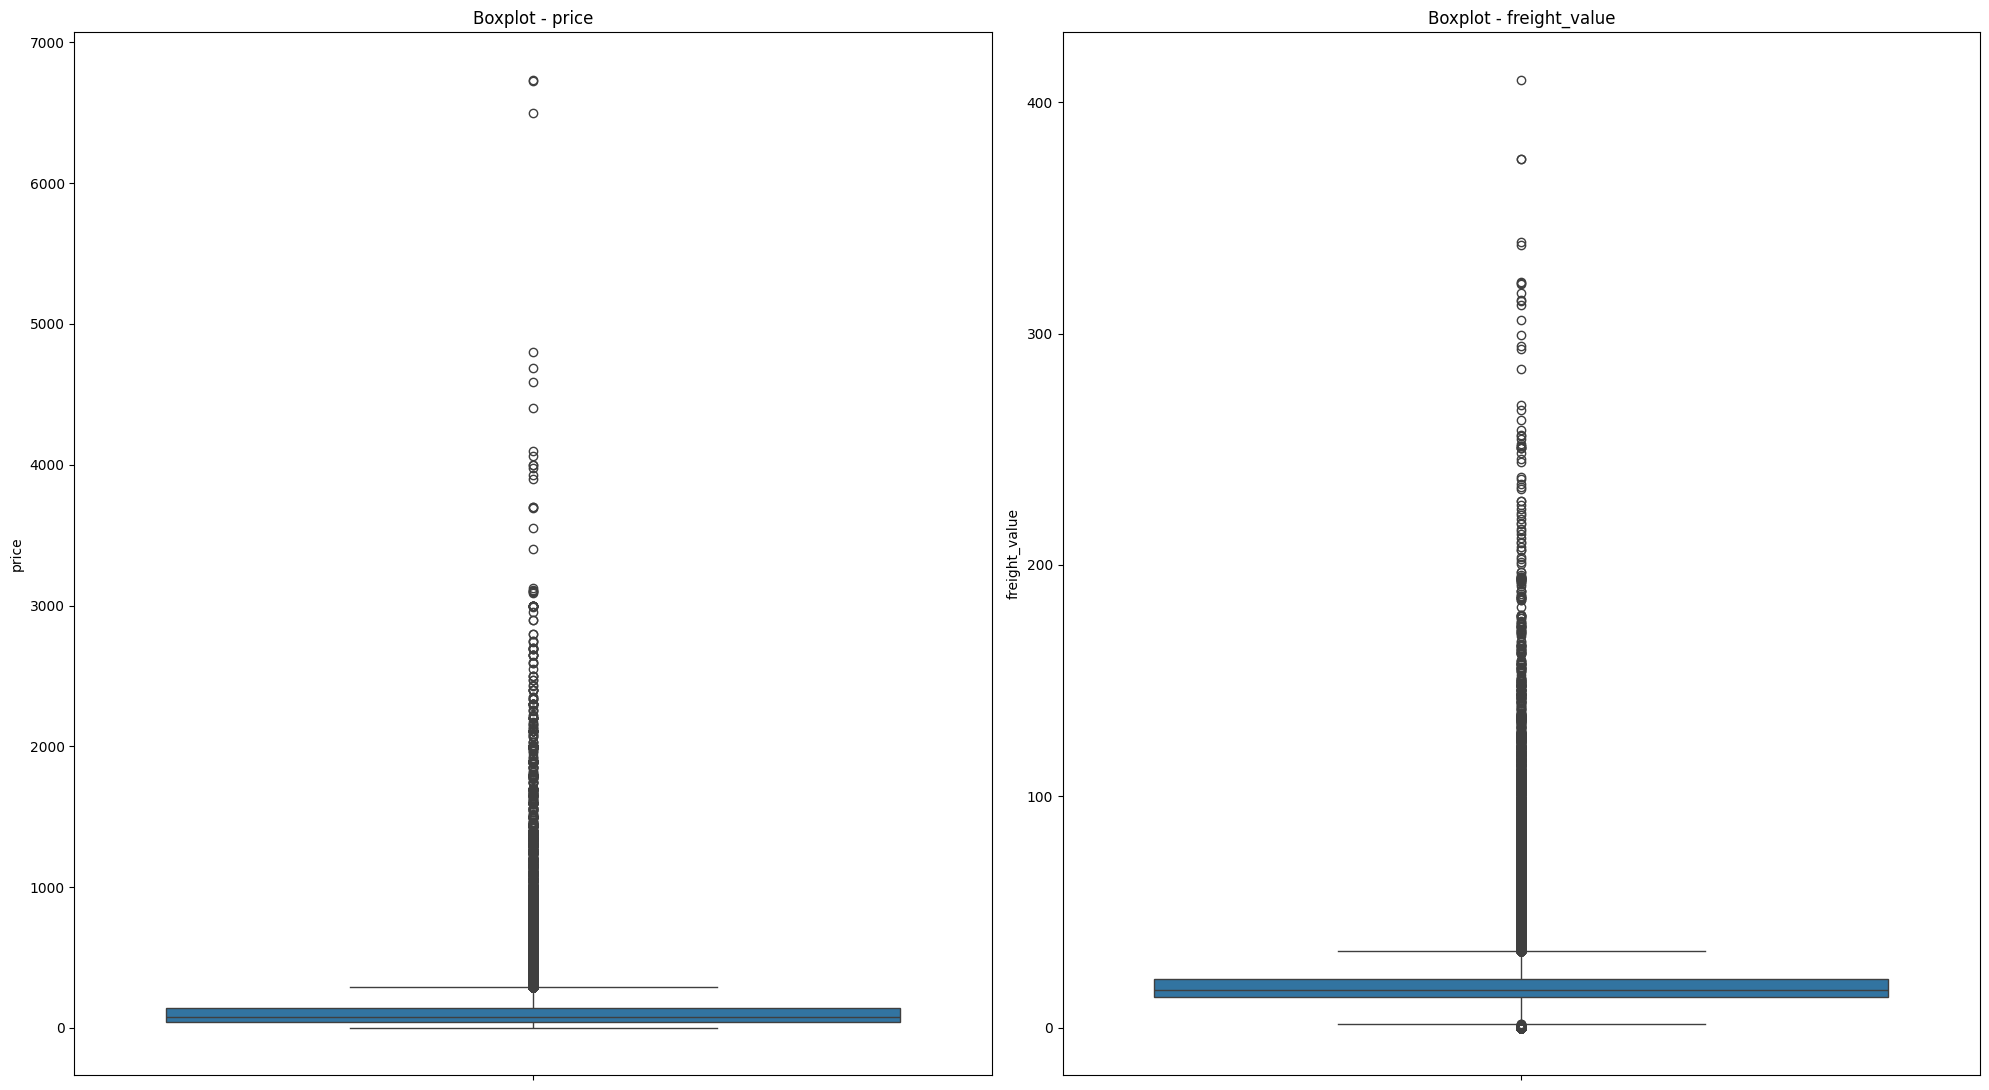

In [196]:
numeric_col = ['price','freight_value']

def check_outlier(df, columns):
    plt.figure(figsize=(20,11))

    for idx, columns in enumerate(numeric_col, 1):
        plt.subplot(1, 2, idx),
        sns.boxplot(y=df[columns])
        plt.title(f"Boxplot - {columns}")
        plt.ylabel(columns)

    plt.tight_layout()
    plt.show()

check_outlier(df_customer_segment_ml, numeric_col)

In [197]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound  = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_customer_segment_ml_cleaned = remove_outliers_iqr(df_customer_segment_ml, numeric_col)

In [198]:
df_sentiment_analysis_clean

review_id                          order_id  \
4       e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
5       f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
13      8670d52e15e00043ae7de4c01cc2fe06  b9bf720beb4ab3728760088589c62129   
20      4b49719c8a200003f700d3d986ea1a19  9d6f15f95d01e79bd1349cc208361f09   
24      3948b09f7c818e2d86c9a546758b2335  e51478e7e277a83743b6f9991dbfa3fb   
...                                  ...                               ...   
113316  61f18bcc543c40912e82105b32875f50  295458b743d8f806fbd5fb290d0b1b8d   
113317  8968d3a8c57ccf32022a51d20aff3b78  95d9d2979d40161be87292ff88563cba   
113319  6788adf52f9216eb0dd164c48a52d613  0f503b220e9d1fd78562e41a427a0c6a   
113320  059052c9d58144d85e0d9204f4a65e6b  1662797f04736ea5acb5de67d5672fcc   
113321  be360f18f5df1e0541061c87021e6d93  f8bd3f2000c28c5342fedeb5e50f2e75   

        review_score review_comment_title  \
4                  5                  NaN   
5                  5                  NaN   
13                 4          I recommend   
20                 4                  NaN   
24                 5     highly recommend   
...              ...                  ...   
113316             1                  NaN   
113317             3         Dissatisfied   
113319             3                  NaN   
113320             3                  NaN   
113321             1                  NaN   

                                   review_comment_message  \
4          I received it well before the stipulated time.   
5       Congratulations Lannister stores I loved shopp...   
13      efficient device. on the website the brand of ...   
20      But a little slowing down...for the price it's...   
24      Reliable seller, ok product and delivery on time.   
...                                                   ...   
113316  Awaiting the solution for my protocol No. 2017...   
113317  I bought 2 melaleuca oil but I received only o...   
113319  I am disappointed with the supplier ... To thi...   
113320  This Post Office Delivery System is a crap was...   
113321  I requested the purchase of a Celtic/Prisma/Me...   

       review_creation_date review_answer_timestamp  \
4                2017-04-21     2017-04-21 22:02:06   
5                2018-03-01     2018-03-02 10:26:53   
13               2018-05-22     2018-05-23 16:45:47   
20               2018-02-16     2018-02-20 10:52:22   
24               2018-05-23     2018-05-24 03:00:01   
...                     ...                     ...   
113316           2017-04-14     2017-04-18 18:15:10   
113317           2018-06-12     2018-06-14 04:10:56   
113319           2017-10-04     2017-10-04 21:57:37   
113320           2018-04-06     2018-04-09 18:22:59   
113321           2017-12-15     2017-12-16 01:29:43   

                             customer_id order_status  \
4       de6dff97e5f1ba84a3cd9a3bc97df5f6    delivered   
5       5986b333ca0d44534a156a52a8e33a83    delivered   
13      a5224bdc7685fd39cd7a23404415493d    delivered   
20      8ebbeb09e94d1e789142983f73faa9cd    delivered   
24      659ded3e9b43aaf51cf9586d03033b46    delivered   
...                                  ...          ...   
113316  4c5c67635f3cc2b433d6212e6f5c0ec8    delivered   
113317  e4721b61e8d2b4b85d606809f6baa292    delivered   
113319  3810ae52bde69bed0acd162b5c18aadb    delivered   
113320  c82367a413b58dcccbad4eb8a50e8945    delivered   
113321  8df587ce8a11ee97b3de9ef3405245c2    delivered   

       order_purchase_timestamp    order_approved_at  \
4           2017-04-09 17:41:13  2017-04-09 17:55:19   
5           2018-02-10 10:59:03  2018-02-10 15:48:21   
13          2018-05-14 10:29:02  2018-05-15 10:37:47   
20          2018-02-12 16:07:34  2018-02-12 16:27:39   
24          2018-05-18 18:20:45  2018-05-18 18:35:28   
...                         ...                  ...   
113316      2017-04-03 09:50:46  2017-04-04 05:55:29   
113317      2018-06-07 23:

**Preprocessing Text**

In [205]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('punkt')   
nltk.download('stopwords') 
nltk.download('omw-1.4')   


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mythi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mythi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mythi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mythi\AppData\Roaming\nltk_data...


True

In [209]:
nltk.download('punkt_tab') 

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mythi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [214]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka
 
    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text
 
def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text
 
def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('english'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def lemmetizing(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word, pos=wordnet.VERB) for word in text]
    return lemmatized_words
 
def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [215]:
df_sentiment_analysis_clean['text_clean'] = df_sentiment_analysis_clean['review_comment_message'].apply(cleaningText)
df_sentiment_analysis_clean['text_casefoldingText'] = df_sentiment_analysis_clean['text_clean'].apply(casefoldingText)
df_sentiment_analysis_clean['text_tokenizingText'] = df_sentiment_analysis_clean['text_casefoldingText'].apply(tokenizingText)
df_sentiment_analysis_clean['text_stopword'] = df_sentiment_analysis_clean['text_tokenizingText'].apply(filteringText)
df_sentiment_analysis_clean['text_lemmetizing'] = df_sentiment_analysis_clean['text_stopword'].apply(lemmetizing)
df_sentiment_analysis_clean['text_akhir'] = df_sentiment_analysis_clean['text_lemmetizing'].apply(toSentence)

df_sentiment_analysis_clean

C:\Users\mythi\AppData\Local\Temp\ipykernel_23072\1611632217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment_analysis_clean['text_clean'] = df_sentiment_analysis_clean['review_comment_message'].apply(cleaningText)
C:\Users\mythi\AppData\Local\Temp\ipykernel_23072\1611632217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment_analysis_clean['text_casefoldingText'] = df_sentiment_analysis_clean['text_clean'].apply(casefoldingText)
C:\Users\mythi\AppData\Local\Temp\ipykernel_23072

review_id                          order_id  \
4       e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
5       f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
13      8670d52e15e00043ae7de4c01cc2fe06  b9bf720beb4ab3728760088589c62129   
20      4b49719c8a200003f700d3d986ea1a19  9d6f15f95d01e79bd1349cc208361f09   
24      3948b09f7c818e2d86c9a546758b2335  e51478e7e277a83743b6f9991dbfa3fb   
...                                  ...                               ...   
113316  61f18bcc543c40912e82105b32875f50  295458b743d8f806fbd5fb290d0b1b8d   
113317  8968d3a8c57ccf32022a51d20aff3b78  95d9d2979d40161be87292ff88563cba   
113319  6788adf52f9216eb0dd164c48a52d613  0f503b220e9d1fd78562e41a427a0c6a   
113320  059052c9d58144d85e0d9204f4a65e6b  1662797f04736ea5acb5de67d5672fcc   
113321  be360f18f5df1e0541061c87021e6d93  f8bd3f2000c28c5342fedeb5e50f2e75   

        review_score review_comment_title  \
4                  5                  NaN   
5                  5                  NaN   
13                 4          I recommend   
20                 4                  NaN   
24                 5     highly recommend   
...              ...                  ...   
113316             1                  NaN   
113317             3         Dissatisfied   
113319             3                  NaN   
113320             3                  NaN   
113321             1                  NaN   

                                   review_comment_message  \
4          I received it well before the stipulated time.   
5       Congratulations Lannister stores I loved shopp...   
13      efficient device. on the website the brand of ...   
20      But a little slowing down...for the price it's...   
24      Reliable seller, ok product and delivery on time.   
...                                                   ...   
113316  Awaiting the solution for my protocol No. 2017...   
113317  I bought 2 melaleuca oil but I received only o...   
113319  I am disappointed with the supplier ... To thi...   
113320  This Post Office Delivery System is a crap was...   
113321  I requested the purchase of a Celtic/Prisma/Me...   

       review_creation_date review_answer_timestamp  \
4                2017-04-21     2017-04-21 22:02:06   
5                2018-03-01     2018-03-02 10:26:53   
13               2018-05-22     2018-05-23 16:45:47   
20               2018-02-16     2018-02-20 10:52:22   
24               2018-05-23     2018-05-24 03:00:01   
...                     ...                     ...   
113316           2017-04-14     2017-04-18 18:15:10   
113317           2018-06-12     2018-06-14 04:10:56   
113319           2017-10-04     2017-10-04 21:57:37   
113320           2018-04-06     2018-04-09 18:22:59   
113321           2017-12-15     2017-12-16 01:29:43   

                             customer_id order_status  \
4       de6dff97e5f1ba84a3cd9a3bc97df5f6    delivered   
5       5986b333ca0d44534a156a52a8e33a83    delivered   
13      a5224bdc7685fd39cd7a23404415493d    delivered   
20      8ebbeb09e94d1e789142983f73faa9cd    delivered   
24      659ded3e9b43aaf51cf9586d03033b46    delivered   
...                                  ...          ...   
113316  4c5c67635f3cc2b433d6212e6f5c0ec8    delivered   
113317  e4721b61e8d2b4b85d606809f6baa292    delivered   
113319  3810ae52bde69bed0acd162b5c18aadb    delivered   
113320  c82367a413b58dcccbad4eb8a50e8945    delivered   
113321  8df587ce8a11ee97b3de9ef3405245c2    delivered   

       order_purchase_timestamp    order_approved_at  \
4           2017-04-09 17:41:13  2017-04-09 17:55:19   
5           2018-02-10 10:59:03  2018-02-10 15:48:21   
13          2018-05-14 10:29:02  2018-05-15 10:37:47   
20          2018-02-12 16:07:34  2018-02-12 16:27:39   
24          2018-05-18 18:20:45  2018-05-18 18:35:28   
...                         ...                  ...   
113316      2017-04-03 09:50:46  2017-04-04 05:55:29   
113317      2018-06-07 23:

**Feature Engineering**